# Capstone Project - AUTOMATIC TICKET ASSIGNMENT

[Project Overview](#Proj)

[Part 1 - Understand Structure of data , Language detect & Translation](#Part1)

[Part2 - Data cleansing - Preprocess -  Assign group update and Null data processing](#Part2)

[Part3 - EDA and Data visualization](#Part3)

[Part 4 - Build Model](#Part4_Header)

[1. Build Benchmark Model](#Part4_1)

   [Logistic Regression Model](#Part4_1_1)

   [SVM Model](#Part4_1_2)

   [Random Forest Model](#Part4_1_3)

   [Naive Bayes Model](#Part4_1_4)
   
[2. Hyper Parameter Tuning](#Part4_2)
   
   [2.1. Hyper parameter tuning for LR - BOW Vectorizer](#Part4_2_1)
   
   [2.2. Hyper parameter tuning for LR - TF-IDF Vectorizer](#Part4_2_2)
   
   [2.3. Hyper parameter tuning for SVM - TF-IDF Vectorizer](#Part4_2_3)
   
   [2.4. Hyper parameter tuning for Random Forest - TF-IDF Vectorizer](#Part4_2_4)
   
   [2.5. Hyper parameter tuning for Multinomial Naive Bayes - TF-IDF Vectorizer](#Part4_2_5)
   
[3. Word2Vec Embedding](#Part4_3)

[4. Simple LSTM Model](#Part4_4)

[5. Basic Neural Network Model](#Part4_5)

[6. LSTM with Glove Embedding](#Part4_6)

[7. Transfer Learning using ULMFIT and AWD_LSTM](#Part4_7)

[Part5 - Model Evaluation](#Part5)

[Part6 - Benchmark Comparison](#Part6)

[Part7 - UI App Model deployment](#Part7)

[Part8 - Implications](#Part8)

[Part9 - Limitations](#Part9)

[Part10 - Closing Reflections](#Part10)

[Part11 - References](#Part11)




   

# <a name="Proj">Project overview</a>

**• Domain :** IT Ticketing system

**• Problem statement :**
One of the key activities of any IT function is to “Keep the lights on” to ensure there is no impact to the Business operations. IT leverages Incident Management process to achieve the above Objective. 

An incident is something that is unplanned interruption to an IT service or reduction in the quality of an IT service that affects the Users and the Business. 

The main goal of Incident Management process is to provide a quick fix / workarounds or solutions that resolves the interruption and restores the service to its full capacity to ensure no business impact. 

In most of the organizations, incidents are created by various Business and IT Users, End Users/ Vendors if they have access to ticketing systems, and from the integrated monitoring systems and tools. 

Assigning the incidents to the appropriate person or unit in the support team has critical importance to provide improved user satisfaction while ensuring better allocation of support resources. 

The assignment of incidents to appropriate IT groups is still a manual process in many of the IT organizations. Manual assignment of incidents is time consuming and requires human efforts. There may be mistakes due to human errors and resource consumption is carried out ineffectively because of
the misaddressing. On the other hand, manual assignment increases the response and resolution times which result in user satisfaction deterioration / poor customer service.

Currently the incidents are created by various stakeholders (Business Users, IT Users and Monitoring Tools) within IT Service Management Tool and are assigned to Service Desk teams (L1 / L2 teams). This team will review the incidents for right ticket categorization, priorities and then carry out initial diagnosis to see if they can resolve. Around ~54% of the incidents are resolved by L1 / L2 teams

L1 / L2 needs to spend time reviewing Standard Operating Procedures (SOPs) before assigning to Functional teams (Minimum ~25-30% of incidents needs to be reviewed for SOPs before ticket assignment). 15 min is being spent for SOP review for each incident. Minimum of ~1 FTE effort needed only for incident assignment to L3 teams.

During the process of incident assignments by L1 / L2 teams to functional groups, there were multiple instances of incidents getting assigned to wrong functional groups. Around ~25% of Incidents are wrongly assigned to functional teams. Additional effort needed for Functional teams to re-assign to right functional groups. During this process, some of the incidents are in queue and not addressed timely resulting in poor customer service.

**• DATA DESCRIPTION :** 
Each ticket has 
1.   Short Description - Short description about ticket
2.   Description - Problem explained in detail by user
3.   Caller - User for whom ticket is created
4.   Assignment group - IT group to which ticket needs to be assigned 


**• PROJECT OBJECTIVE: :**  Using NLP based AI techniques build a classifier that can automatically classify incidents to right functional groups, in turn can help organizations to reduce the resolving time of the issue and can focus on more productive tasks.

# <a name="Part1">Part 1 - Understand Structure of data , Language detect & Translation</a>

## 1. Import and analyse the data set.

In [ ]:
import pandas as pd # read data file, data processing
import numpy as np # linear algebra
import matplotlib.pyplot as plt # plotting graph for EDA , Metrics analysis
%matplotlib inline
import seaborn as sns # plotting graph for EDA , Metrics analysis

In [ ]:
pip install langdetect;

In [ ]:
#pip install googletrans==3.1.0a0

In [ ]:
pip install googletrans==4.0.0-rc1

### Load the data 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data_dir = "/content/drive/MyDrive/AIML/projects/Capstone-NLP-Ticketing/"
data_file_name = 'input_data.xlsx'
data_file_path = data_dir+data_file_name
data_file_path

'/content/drive/MyDrive/AIML/projects/Capstone-NLP-Ticketing/input_data.xlsx'

In [ ]:
df_data = pd.read_excel( data_file_path)

### Exploring the given Data files &  Understanding the structure of data

In [ ]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8500 entries, 0 to 8499
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Short description  8492 non-null   object
 1   Description        8499 non-null   object
 2   Caller             8500 non-null   object
 3   Assignment group   8500 non-null   object
dtypes: object(4)
memory usage: 265.8+ KB


In [ ]:
df_data.head(10)

,Short description,Description,Caller,Assignment group
0,login issue,-verified user details.(employee# & manager na...,spxjnwir pjlcoqds,GRP_0
1,outlook,_x000D_\n_x000D_\nreceived from: hmjdrvpb.komu...,hmjdrvpb komuaywn,GRP_0
2,cant log in to vpn,_x000D_\n_x000D_\nreceived from: eylqgodm.ybqk...,eylqgodm ybqkwiam,GRP_0
3,unable to access hr_tool page,unable to access hr_tool page,xbkucsvz gcpydteq,GRP_0
4,skype error,skype error,owlgqjme qhcozdfx,GRP_0
5,unable to log in to engineering tool and skype,unable to log in to engineering tool and skype,eflahbxn ltdgrvkz,GRP_0
6,event: critical:HostName_221.company.com the v...,event: critical:HostName_221.company.com the v...,jyoqwxhz clhxsoqy,GRP_1
7,ticket_no1550391- employment status - new non-...,ticket_no1550391- employment status - new non-...,eqzibjhw ymebpoih,GRP_0
8,unable to disable add ins on outlook,unable to disable add ins on outlook,mdbegvct dbvichlg,GRP_0
9,ticket update on inplant_874773,ticket update on inplant_874773,fumkcsji sarmtlhy,GRP_0


Short Description and Description are input features and Assignment is Class / Output

Dataset has IT related terms

Data contains carriage return characters like '_x000D_' and \n , that needs to be removed 

Data also contains accented encoding character like äº§å“ that needs to be removed

In [ ]:
# Take a backup of input description fields for future reference
df_data['orig_desc'] =  df_data['Description']
df_data['orig_short_desc'] = df_data['Short description']

In [ ]:
# Replace white space characters with space
df_data['Description'] = df_data['Description'].replace(r'\n',' ', regex=True). replace(r'_x000D_',' ', regex=True)
df_data['Short description'] = df_data['Short description'].replace(r'\n',' ', regex=True). replace(r'_x000D_',' ', regex=True)

In [ ]:
# Replace accented encoding characters
import unicodedata

# Using normalize function returns the conventional form for the Unicode string unistr. 
# The valid values for form are ‘NFC’, ‘NFKC’, ‘NFD’, and ‘NFKD’.

def remove_accents(text):
    try:
        text = unicode(text, 'utf-8')
    except (TypeError, NameError): # unicode is a default on python 3 
        pass
    text = unicodedata.normalize('NFC', text)
    text = text.encode('ascii', 'ignore')
    text = text.decode("utf-8")
    return str(text)


In [ ]:
df_data['Description'] = df_data['Description'].astype(str).apply(remove_accents)
df_data['Short description'] = df_data['Short description'].astype(str).apply(remove_accents)


### Detect and Translate Non English data to English

#### Detect Language

In [ ]:
from langdetect import detect
def det(x):
    try:
        lang = detect(x)
    except:
        lang = 'Other'
    return lang

df_data['Lang'] = df_data['Description'].apply(det)

In [ ]:
df_data['Lang'] = df_data['Lang'].apply(lambda x: 'en' if x == 'Other' else x)

In [ ]:
df_data['Lang'].value_counts()

en    7080
de     400
af     272
it     138
fr     117
no      73
nl      68
sv      55
es      50
ca      48
da      30
pl      29
pt      22
ro      21
sl      17
cy      13
tl      12
et      10
sq       8
so       7
hr       7
fi       6
id       4
lv       3
lt       3
cs       2
sk       2
hu       1
vi       1
sw       1
Name: Lang, dtype: int64

**Dataset has multi lang data**

In [ ]:
from googletrans import Translator

translator = Translator()

# detection
import time
def Translate_text_To_en(df, col_name , trans_col_name):
  # iterate through each row and select 
  for index, row in df.iterrows():
    src_lang = row['Lang']
    if src_lang != 'en':
      time.sleep(1)
      try:
        text_tr = row[col_name]
        trans_text = translator.translate(text_tr).text
        df.loc[index, trans_col_name]=trans_text
      except Exception as e:
        print(e)
        print("index is", index , "text is ",text_tr )
  print(df)
  return df


In [ ]:
df_data['Translated_ShortDesc'] = df_data['Short description']

In [ ]:
df_data[df_data['Lang'] == 'de']['Translated_ShortDesc']

133        install driver in printer hr14 in HostName_769
223                             probleme mit bluescreen .
251     reset the password for fygrwuna gomcekzi on e-...
265                     netweaver funktioniert nicht mehr
270         neues passwort fr accountname tgryhu hgygrtui
                              ...                        
8414      langsamer rechner \berprfung \niptbwdq csenjruz
8420                                  mobiltelefon defekt
8425      ich kann mein erp passwort nicht zurck setzten.
8439    der drucker fr die ups-lapels druckt nicht ric...
8499    an mehreren pc`s lassen sich verschiedene prgr...
Name: Translated_ShortDesc, Length: 400, dtype: object

In [ ]:
df_data = Translate_text_To_en(df_data, 'Short description', 'Translated_ShortDesc' )

the JSON object must be str, bytes or bytearray, not NoneType
index is 1710 text is  
the JSON object must be str, bytes or bytearray, not NoneType
index is 6098 text is  
the JSON object must be str, bytes or bytearray, not NoneType
index is 7316 text is  
the JSON object must be str, bytes or bytearray, not NoneType
index is 7941 text is  
                                      Short description  ...                               Translated_ShortDesc
0                                           login issue  ...                                        login issue
1                                               outlook  ...                                            outlook
2                                    cant log in to vpn  ...                                 cant log in to vpn
3                         unable to access hr_tool page  ...                      unable to access hr_tool page
4                                          skype error   ...                                    

In [ ]:
df_data['Translated_Description'] = df_data['Description']

In [ ]:
df_data = Translate_text_To_en(df_data, 'Description', 'Translated_Description' )

list index out of range
index is 2915 text is  companycenter.company.com
                                      Short description  ...                             Translated_Description
0                                           login issue  ...  -verified user details.(employee# & manager na...
1                                               outlook  ...      received from: hmjdrvpb.komuaywn@gmail.com...
2                                    cant log in to vpn  ...      received from: eylqgodm.ybqkwiam@gmail.com...
3                         unable to access hr_tool page  ...                      unable to access hr_tool page
4                                          skype error   ...                                        skype error
...                                                 ...  ...                                                ...
8495                  emails not coming in from zz mail  ...      received from: avglmrts.vhqmtiua@gmail.com...
8496                           

In [ ]:
df_data[df_data['Lang'] == 'de']

,Short description,Description,Caller,Assignment group,orig_desc,orig_short_desc,Lang,Translated_ShortDesc,Translated_Description
133,install driver in printer hr14 in HostName_769,install driver in printer hr14 in HostName_769,bihypqsn kbaegpcd,GRP_0,install driver in printer hr14 in HostName_769,install driver in printer hr14 in HostName_769,de,install driver in printer hr14 in HostName_769,install driver in printer hr14 in HostName_769
223,probleme mit bluescreen .,"hallo , es ist erneut passiert. der pc hat si...",vrfpyjwi nzhvgqiw,GRP_24,"hallo ,\n\nes ist erneut passiert. der pc hat ...",probleme mit bluescreen .,de,Problems with BlueScreen.,"Hello, it happened again.The PC has hung up fo..."
251,reset the password for fygrwuna gomcekzi on e-...,bitte passwort fr fygrwuna gomcekzi e-mail zur...,fygrwuna gomcekzi,GRP_0,bitte passwort fÃ¼r fygrwuna gomcekzi e-mail z...,reset the password for fygrwuna gomcekzi on e-...,de,reset the password for fygrwuna gomcekzi on e-...,Please Password for Fygrwuna Gomcekzi E-mail P...
265,netweaver funktioniert nicht mehr,received from: fcyuqvoj.ajqeidlm@gmail.com...,fcyuqvoj ajqeidlm,GRP_0,_x000D_\n_x000D_\nreceived from: fcyuqvoj.ajqe...,netweaver funktioniert nicht mehr,de,NetWeaver does not work anymore,Received from: fcyuqvoj.ajqeidlm@gmail.com Hel...
270,neues passwort fr accountname tgryhu hgygrtui,neues passwort fr accountname tgryhu hgygrtui....,nemzycxb xpsgkahw,GRP_0,neues passwort fÃ¼r accountname tgryhu hgygrtu...,neues passwort fÃ¼r accountname tgryhu hgygrtui,de,New password for AccountName TGryhu Hgygrtui,New password for AccountName TGryhu Hgygrtui.P...
...,...,...,...,...,...,...,...,...,...
8414,langsamer rechner \berprfung \niptbwdq csenjruz,langsamer rechner \berprfung \niptbwdq csenjruz,niptbwdq csenjruz,GRP_24,langsamer rechner \Ã¼berprÃ¼fung \niptbwdq cse...,langsamer rechner \Ã¼berprÃ¼fung \niptbwdq cse...,de,Slow Calculator \ Check \ Niptbwdq Csenjruz,Slow Calculator \ Check \ Niptbwdq Csenjruz
8420,mobiltelefon defekt,mobiltelefon gigaset m2 professional mit der d...,ptvdxwla tlevwmzo,GRP_33,mobiltelefon gigaset m2 professional mit der d...,mobiltelefon defekt,de,Mobile phone defect,Mobile phone Gigaset M2 Professional with the ...
8425,ich kann mein erp passwort nicht zurck setzten.,ich wei mein erp passwort nicht mehr und habe ...,wfbkucds qaxhbois,GRP_0,ich weiÃŸ mein erp passwort nicht mehr und hab...,ich kann mein erp passwort nicht zurÃ¼ck setzten.,de,I can not reset my ERP password.,I no longer know my ERP password and have 3 fa...
8439,der drucker fr die ups-lapels druckt nicht ric...,der drucker steht am platz von wckrxovs aunsgzmd,kiqrvwat gwkpxzyt,GRP_33,der drucker steht am platz von wckrxovs aunsgzmd,der drucker fÃ¼r die ups-lapels druckt nicht r...,de,The printer for the UPS lapels does not print ...,The printer is located on the place of WCKRXOV...


In [ ]:
df_data.to_csv("/content/drive/MyDrive/AIML/projects/Capstone-NLP-Ticketing/input_data_trans.csv",index=False)

In [ ]:
print("Translation completed")

Translation completed


# <a name="Part2">Part2 - Data cleansing - Preprocess -  Assign group update and Null data processing</a>

## 1. Import and analyse the data set.

● Exploring the given Data files

● Understanding the structure of data

● Missing points in data - description null 

● Finding inconsistencies in the data - class imbalance ; Number of words in ticket desc less 

In [ ]:
import pandas as pd # read data file, data processing
import numpy as np # linear algebra
import matplotlib.pyplot as plt # plotting graph for EDA , Metrics analysis
%matplotlib inline
import seaborn as sns # plotting graph for EDA , Metrics analysis

### Load the data 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data_dir = "/content/drive/MyDrive/AIML/projects/Capstone-NLP-Ticketing/"
#data_file_name = 'input_data.xlsx'
# Input data files has been processed for 
# 1. carriage return characters like '_x000D_' and \n 
# 2. Accented encoding character like äº§å“æ‰€åœ¨ä»“åº“å‡ºé”™ã€ , è¿žæŽ¥åŽè‡ªåŠ¨æ–­å¼€ï¼Œæ
# 3. Translation of words in non english language especially German, Italian, French
# Above 3 steps are done separately and output from these steps are used for further processing
data_file_name='input_data_trans.csv'
data_file_path = data_dir+data_file_name
data_file_path

'/content/drive/MyDrive/AIML/projects/Capstone-NLP-Ticketing/input_data_trans.csv'

In [ ]:
#df_data = pd.read_excel(data_file_path)
df_data = pd.read_csv(data_file_path)

In [ ]:
df_data['Short description'] = df_data['Translated_ShortDesc']
df_data['Description'] = df_data['Translated_Description']

### Exploring the given Data files &  Understanding the structure of data

In [ ]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8500 entries, 0 to 8499
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Short description       8451 non-null   object
 1   Description             8473 non-null   object
 2   Caller                  8500 non-null   object
 3   Assignment group        8500 non-null   object
 4   orig_desc               8499 non-null   object
 5   orig_short_desc         8492 non-null   object
 6   Lang                    8500 non-null   object
 7   Translated_ShortDesc    8451 non-null   object
 8   Translated_Description  8473 non-null   object
dtypes: object(9)
memory usage: 597.8+ KB


**Dataset has 8500 records** ; Not big

Short Description and Description are input features and Assignment group is Predictors / Target variables

Dataset has IT issues from users and having more of  IT related terms 

### Target Variable Analysis

In [ ]:
df_assign_group = pd.DataFrame(df_data['Assignment group'].value_counts())

In [ ]:
df_assign_group

,Assignment group
GRP_0,3976
GRP_8,661
GRP_24,289
GRP_12,257
GRP_9,252
...,...
GRP_64,1
GRP_67,1
GRP_35,1
GRP_70,1


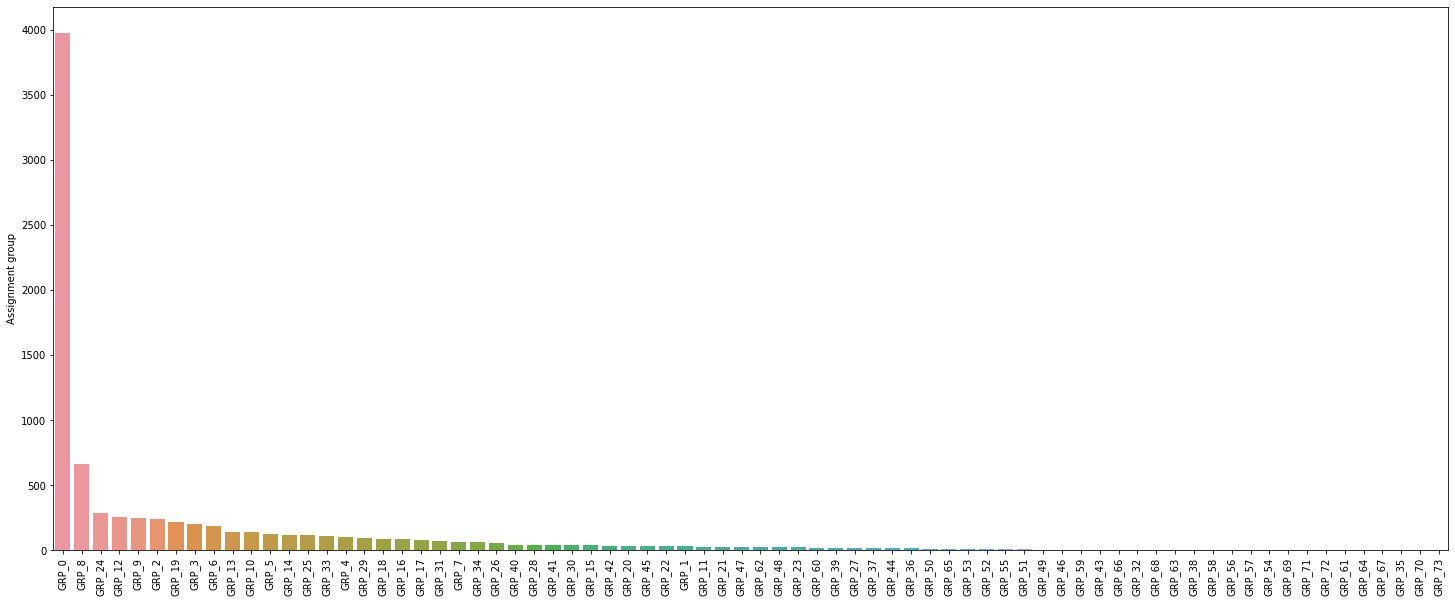

In [ ]:
# setting the dimensions of the plot
fig, ax = plt.subplots(figsize=(25, 10))
# Count plot for Assignment group 
chart = sns.barplot(y='Assignment group',x=df_assign_group['Assignment group'].index, data=df_assign_group, order=df_assign_group['Assignment group'].index, ax=ax )
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
plt.show()

Number of assignment group - 74

Data is highly imbalanced
  Group 0 has close to 4000 records (50% of the data) while there are many groups with less than 10 rows 

**Move all the Group with less than 10 rows to Group others** 

In [ ]:
df_data['orig_assign_group'] = df_data['Assignment group']

In [ ]:
df_assign_group_lt10 = df_assign_group[df_assign_group['Assignment group'] < 10]

In [ ]:
df_assign_group_lt10

,Assignment group
GRP_52,9
GRP_55,8
GRP_51,8
GRP_49,6
GRP_46,6
GRP_59,6
GRP_43,5
GRP_66,4
GRP_32,4
GRP_68,3


In [ ]:
#Move all the Group with less than 10 rows to Group others
df_data['Assignment group'] = df_data['Assignment group'].apply( lambda x: 'GRP_Other' if x in df_assign_group_lt10.index else x)


In [ ]:
# Number of assignment groups - classes
print(df_data['Assignment group'].value_counts())
print('\nNumber of assignment group (classes) ', len(df_data['Assignment group'].value_counts()))

GRP_0        3976
GRP_8         661
GRP_24        289
GRP_12        257
GRP_9         252
GRP_2         241
GRP_19        215
GRP_3         200
GRP_6         184
GRP_13        145
GRP_10        140
GRP_5         129
GRP_14        118
GRP_25        116
GRP_33        107
GRP_4         100
GRP_29         97
GRP_18         88
GRP_Other      87
GRP_16         85
GRP_17         81
GRP_31         69
GRP_7          68
GRP_34         62
GRP_26         56
GRP_40         45
GRP_28         44
GRP_41         40
GRP_30         39
GRP_15         39
GRP_42         37
GRP_20         36
GRP_45         35
GRP_22         31
GRP_1          31
GRP_11         30
GRP_21         29
GRP_47         27
GRP_23         25
GRP_62         25
GRP_48         25
GRP_60         20
GRP_39         19
GRP_27         18
GRP_37         16
GRP_44         15
GRP_36         15
GRP_50         14
GRP_53         11
GRP_65         11
Name: Assignment group, dtype: int64

Number of assignment group (classes)  50


### Dealing with missing values

In [ ]:
# Get unique values for each feature value along with Null check, find category values
# Show_levels - if True provide details of unique values 
def summarize_features(df, show_levels=False):
    """
        Display uniqueness in each column
    """
    data = [[c,df[c].unique(), len(df[c].unique()), df[c].isnull().sum()] for c in df.columns]
    df_temp = pd.DataFrame(data, index=df.columns,
                           columns=['Column','No. of Unique values', 'uniq_val_count', 'No. of Missing Values'])
    return df_temp.iloc[:, 0 if show_levels else 1:]

df_summarize_features = summarize_features(df_data[['Short description', 'Description', 'Assignment group']],True)
df_summarize_features

,Column,No. of Unique values,uniq_val_count,No. of Missing Values
Short description,Short description,"[login issue, outlook, cant log in to vpn, una...",7395,49
Description,Description,[-verified user details.(employee# & manager n...,7756,27
Assignment group,Assignment group,"[GRP_0, GRP_1, GRP_3, GRP_4, GRP_5, GRP_6, GRP...",50,0


**Number of missing values is less, but need to do text processing and check if there are any empty descriptions after cleaning up words (data pre-processing)**

In [ ]:
# missing value treatment 
cond1 = df_data['Short description'].isnull()
cond2 = df_data['Description'].isnull()
df_missing = df_data[ cond1 | cond2 ]
df_missing[['Short description', 'Description', 'Assignment group', 'Lang']]

,Short description,Description,Assignment group,Lang
1081,NaN,"""""",GRP_48,en
1178,NaN,NaN,GRP_30,en
1452,NaN,NaN,GRP_30,en
1568,NaN,163crmvpnethics,GRP_31,en
1700,NaN,NaN,GRP_48,en
1701,NaN,NaN,GRP_48,en
1704,NaN,NaN,GRP_48,en
1710,NaN,St6 P-100 / + 325 16-9-16,GRP_48,no
1711,NaN,NaN,GRP_48,en
1954,NaN,NaN,GRP_30,en


In [ ]:
# Replace Null description with Short description
df_data['Description'].fillna(df_data['Short description'], inplace=True)

In [ ]:
# Replace Null Short description with Description
df_data['Short description'].fillna(df_data['Description'], inplace=True)

In [ ]:
# Check if both Description are null, remove those records
print("No of tickets with no descriptions ", len(df_data[ cond1 & cond2 ]))

# df_data[ cond1 & cond2 ][['Short description', 'Description', 'Assignment group', 'Lang']]

No of tickets with no descriptions  27


In [ ]:
df_data.drop(index = df_data[ cond1 & cond2 ].index, inplace=True, axis=0)

In [ ]:
df_data.shape

(8473, 10)

#### Pre-process data
 Data is preprocessed again to remove non english characters and remove unwanted spaces

In [ ]:
import re

def preprocess_text(df_column):
  # convert column to string
  df_column=df_column.apply(str)
  # Select only alphabets
  df_column = df_column.apply(lambda x: re.sub('[^A-Za-z]+', ' ', x))
  # Convert text to lowercase
  df_column = df_column.apply(lambda x: x.lower())
  # Strip unwanted spaces
  df_column = df_column.apply(lambda x: x.strip())

  return df_column

#Apply pre process function on Short decription  & Description column
df_data['Short description'] = preprocess_text(df_data['Short description'])
df_data['Description'] = preprocess_text(df_data['Description'])

#### Check for Empty strings after pre-process in both description column and remove rows if both are empty

In [ ]:
cond_1 = df_data['Description'].str.len() == 0
cond_2 = df_data['Short description'].str.len() == 0
#df_data[ & ]

In [ ]:
# Check if both Description are empty, remove those records
df_data.drop(index = df_data[ cond_1 & cond_2 ].index, inplace=True, axis=0)

In [ ]:
df_data.shape

(8467, 10)

In [ ]:
df_data[ cond_1 | cond_2 ][['Short description', 'Description', 'Assignment group', 'Lang']]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,Short description,Description,Assignment group,Lang
2975,,received from yzbjhmpw vzrulkog gmail com cid ...,GRP_0,de
3010,,kg kg,GRP_48,tl
3303,,received from ktghvuwr uwtakcmj gmail com hell...,GRP_31,en
5013,,received from apacjun zhang company com hello ...,GRP_29,en
5464,,received from wqzarvhx hfsojckw gmail com hi h...,GRP_13,en
5491,,vpn,GRP_31,sl
6253,in the inbox always show there are several ema...,,GRP_0,en
6371,authorization add delete members,,GRP_0,en
7397,browser issue,,GRP_0,en
8266,erp,,GRP_30,en


In [ ]:

desc_is_empty = (df_data['Description'].str.len() == 0)
df_data.loc[desc_is_empty, 'Description'] = df_data.loc[desc_is_empty, 'Short description']


short_desc_is_empty = (df_data['Short description'].str.len() == 0)
df_data.loc[short_desc_is_empty, 'Short description'] = df_data.loc[short_desc_is_empty, 'Description']

In [ ]:
df_data[ cond_1 | cond_2 ][['Short description', 'Description', 'Assignment group', 'Lang']]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,Short description,Description,Assignment group,Lang
2975,received from yzbjhmpw vzrulkog gmail com cid ...,received from yzbjhmpw vzrulkog gmail com cid ...,GRP_0,de
3010,kg kg,kg kg,GRP_48,tl
3303,received from ktghvuwr uwtakcmj gmail com hell...,received from ktghvuwr uwtakcmj gmail com hell...,GRP_31,en
5013,received from apacjun zhang company com hello ...,received from apacjun zhang company com hello ...,GRP_29,en
5464,received from wqzarvhx hfsojckw gmail com hi h...,received from wqzarvhx hfsojckw gmail com hi h...,GRP_13,en
5491,vpn,vpn,GRP_31,sl
6253,in the inbox always show there are several ema...,in the inbox always show there are several ema...,GRP_0,en
6371,authorization add delete members,authorization add delete members,GRP_0,en
7397,browser issue,browser issue,GRP_0,en
8266,erp,erp,GRP_30,en


In [ ]:
df_data.to_csv("/content/drive/MyDrive/AIML/projects/Capstone-NLP-Ticketing/input_data_trans_preprocess.csv", index=False)

In [ ]:
print("Pre-processing & Target variable reassign completed")

Pre-processing & Target variable reassign completed


# <a name="Part3">Part3 - EDA and Data visualization</a>

## 1. Import the translated and pre-processed data set.

In [ ]:
import pandas as pd # read data file, data processing
import numpy as np # linear algebra
import matplotlib.pyplot as plt # plotting graph for EDA , Metrics analysis
%matplotlib inline
import seaborn as sns # plotting graph for EDA , Metrics analysis

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Input data files has been processed for 
# 1. carriage return characters like '_x000D_' and \n 
# 2. Accented encoding character like äº§å“æ‰€åœ¨ä»“åº“å‡ºé”™ã€ , è¿žæŽ¥åŽè‡ªåŠ¨æ–­å¼€ï¼Œæ
# 3. Translation of words in non english language especially German, Italian, French
# Above 3 steps are done separately and output from these steps are used for further processing in Part 2
# 4. Update of Assigment group - fewer data groups , grouped to Group others
# 5. Pre-process for having only English data after translation, removal of spaces 
# 6. Treatment of Null values
# Above step 4,5,6 are done in part2 and processed data is stored in input_data_trans_preprocess.csv

data_dir = "/content/drive/MyDrive/AIML/projects/Capstone-NLP-Ticketing/"
data_file_name='input_data_trans_preprocess.csv'
data_file_path = data_dir+data_file_name
data_file_path

'/content/drive/MyDrive/AIML/projects/Capstone-NLP-Ticketing/input_data_trans_preprocess.csv'

In [ ]:
df_data = pd.read_csv(data_file_path)

In [ ]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8467 entries, 0 to 8466
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Short description       8467 non-null   object
 1   Description             8467 non-null   object
 2   Caller                  8467 non-null   object
 3   Assignment group        8467 non-null   object
 4   orig_desc               8466 non-null   object
 5   orig_short_desc         8459 non-null   object
 6   Lang                    8467 non-null   object
 7   Translated_ShortDesc    8450 non-null   object
 8   Translated_Description  8467 non-null   object
 9   orig_assign_group       8467 non-null   object
dtypes: object(10)
memory usage: 661.6+ KB


### Visualizing different text features  - Word Cloud

In [ ]:
# Import stop words list from NLTK
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords # Import stop words

stop_words = set(stopwords.words('english'))


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


#### Word Cloud for Description & Short description

In [ ]:
from wordcloud import WordCloud

def wordplot(dataset, color = 'white'):
  words = ' '.join(dataset)
  cleaned_words = ' '
  #if any common words needs to be filtered can be included here in the if clause
  cleaned_words = ' '.join( [word for word in words.split () if (word != 'hello' and word != 'company') ])
  wordcloud = WordCloud(stopwords = stop_words,
                        max_words=100,
                        background_color = color,
                        scale=3,
                        collocations=False,
                        width = 2500, height = 2500).generate(cleaned_words)
  plt.figure(1, figsize = (8,8))
  plt.imshow(wordcloud)
  plt.axis("off")
  plt.show()

Description - Word cloud


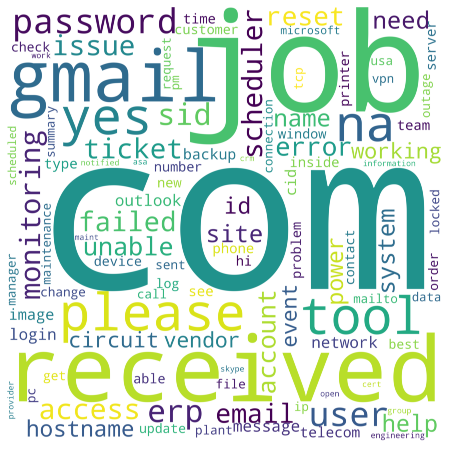

In [ ]:
print("Description - Word cloud")
wordplot(df_data['Description'], 'white')

Short Description - Word cloud


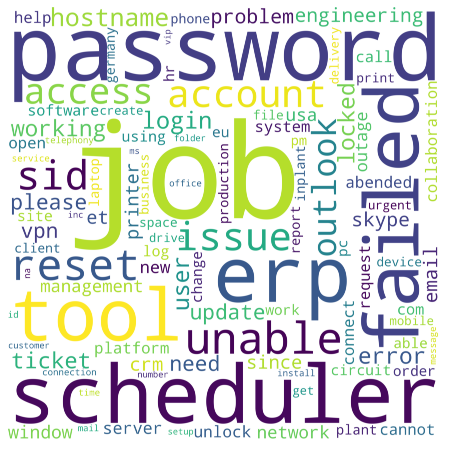

In [ ]:
print("Short Description - Word cloud")
wordplot(df_data['Short description'], 'white')

**Both Short Description and Description has similar words, but there are bunch of words addition in both fields, it would be good idea to use both features for ticket classification and assignment**

#### Length of each ticket description 

In [ ]:
print("Max length of each ticket description", df_data['Description'].str.len().max())
print("Min length of each ticket description", df_data['Description'].str.len().min()) 
print("Mean length of each ticket description", round(df_data['Description'].str.len().mean(),2)) 
print("Max length of each ticket short description", df_data['Short description'].str.len().max())
print("Min length of each ticket short description", df_data['Short description'].str.len().min()) 
print("Mean length of each ticket short description", round(df_data['Short description'].str.len().mean(),2)) 

Max length of each ticket description 7594
Min length of each ticket description 1
Mean length of each ticket description 164.17
Max length of each ticket short description 973
Min length of each ticket short description 1
Mean length of each ticket short description 41.23


In [ ]:
# Total number of words / unique words in a dataset column
def find_total_words_uniq_words(df_column):
  all_words = ''
  for words in df_column :
    all_words += ' '.join([word for word in words.split()])

  print("Total Number of words  in entire dataset for " , df_column.name , ":", len(all_words.split()))

  all_words_unique = set(all_words.split())
  print("Vocabulary Size - Total Number of unique words in dataset for" ,  df_column.name , ":", len(all_words_unique))

In [ ]:
find_total_words_uniq_words(df_data['Description'])

find_total_words_uniq_words(df_data['Short description'])

Total Number of words  in entire dataset for  Description : 233583
Vocabulary Size - Total Number of unique words in dataset for Description : 18736
Total Number of words  in entire dataset for  Short description : 51660
Vocabulary Size - Total Number of unique words in dataset for Short description : 10943


**Merging both Description and Short description**

In [ ]:
df_data['Desc_All'] = df_data['Short description'] + ' '+ df_data['Description']
# Strip unwanted spaces
df_data['Desc_All'] = df_data['Desc_All'].apply(lambda x: x.strip())

**Analyzing text statistics after merging both description columns**

sentence length analysis

In [ ]:
print("Max length of ticket description", df_data['Desc_All'].str.len().max())
print("Min length of ticket description", df_data['Desc_All'].str.len().min()) 
print("Mean length of ticket description", round(df_data['Desc_All'].str.len().mean(),2)) 
print("Median length of ticket description", round(df_data['Desc_All'].str.len().median(),2)) 
print("Mode length of ticket description", round(df_data['Desc_All'].str.len().mode(),2)) 

Max length of ticket description 7641
Min length of ticket description 3
Mean length of ticket description 206.4
Median length of ticket description 126.0
Mode length of ticket description 0    111
dtype: int64


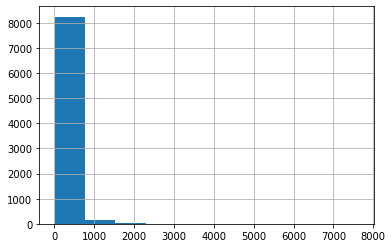

In [ ]:
df_data['Desc_All'].str.len().hist()

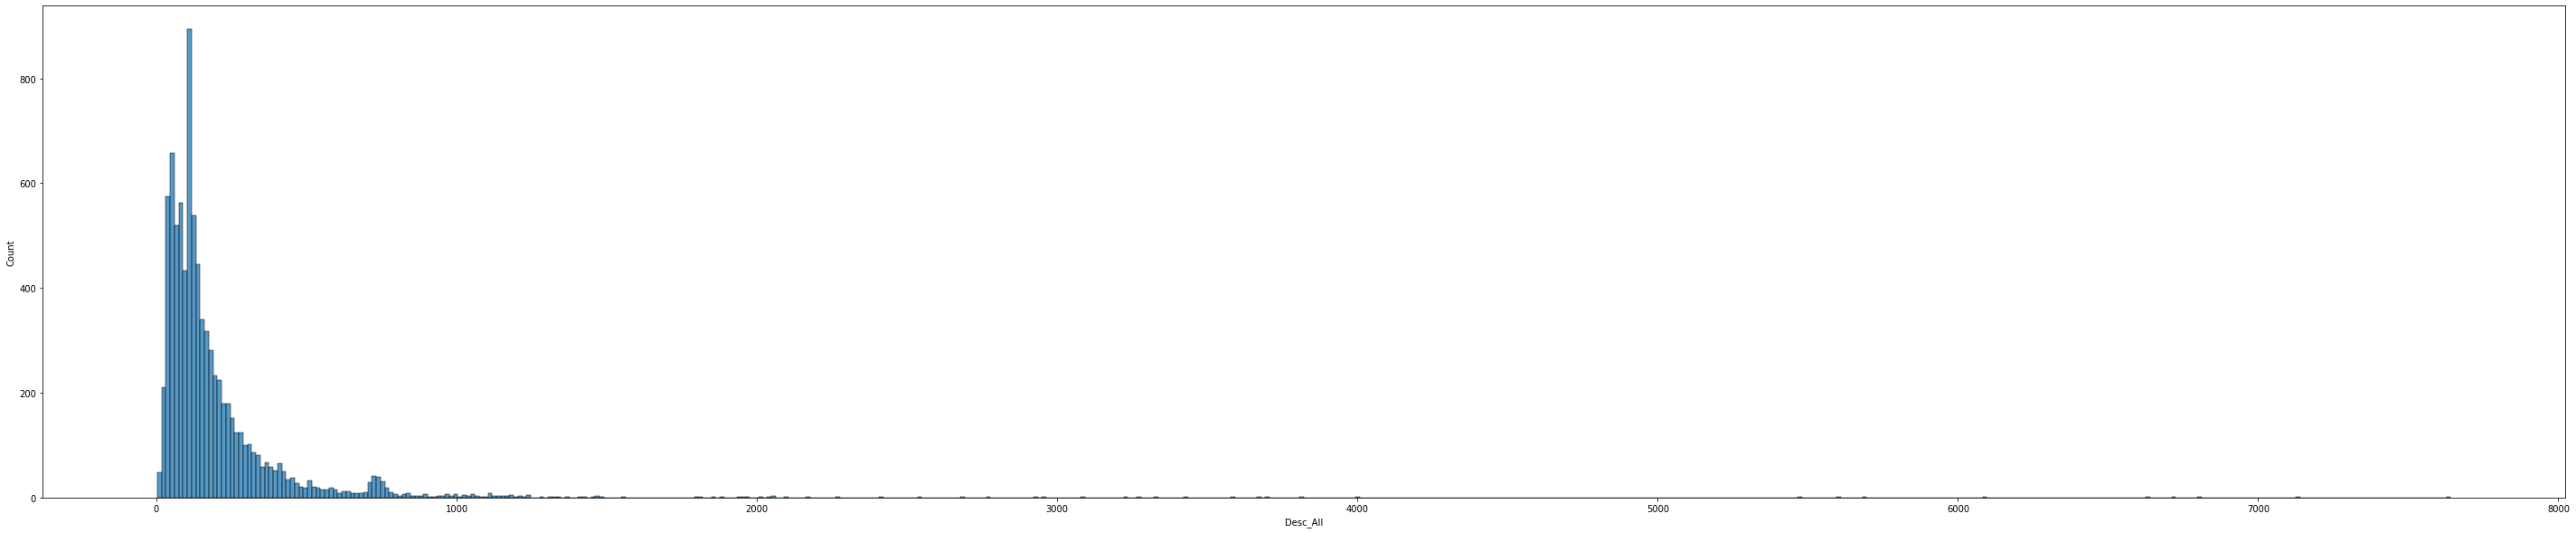

In [ ]:
fig2, ax2 = plt.subplots(figsize=(50, 10))
sns.histplot(df_data['Desc_All'].str.len(), ax=ax2)
plt.show()

The histogram shows that description and Short description combined has range range from 3 to ~ 7650 characters and generally most of the tickets has length  between 0 to 250 characters.

### word frequency analysis

Number of words present in each ticket description

In [ ]:
# No of words in each ticket descriptions
max_words = df_data['Desc_All'].apply(lambda x: len(x.split())).max()
min_words = df_data['Desc_All'].apply(lambda x: len(x.split())).min()
mean_words = df_data['Desc_All'].apply(lambda x: len(x.split())).mean()

print("Max words in a ticket description ", max_words)
print("Min words in a ticket description", min_words)

print("Avearage words in a ticket description  ", round(mean_words,2))

Max words in a ticket description  1587
Min words in a ticket description 2
Avearage words in a ticket description   35.69


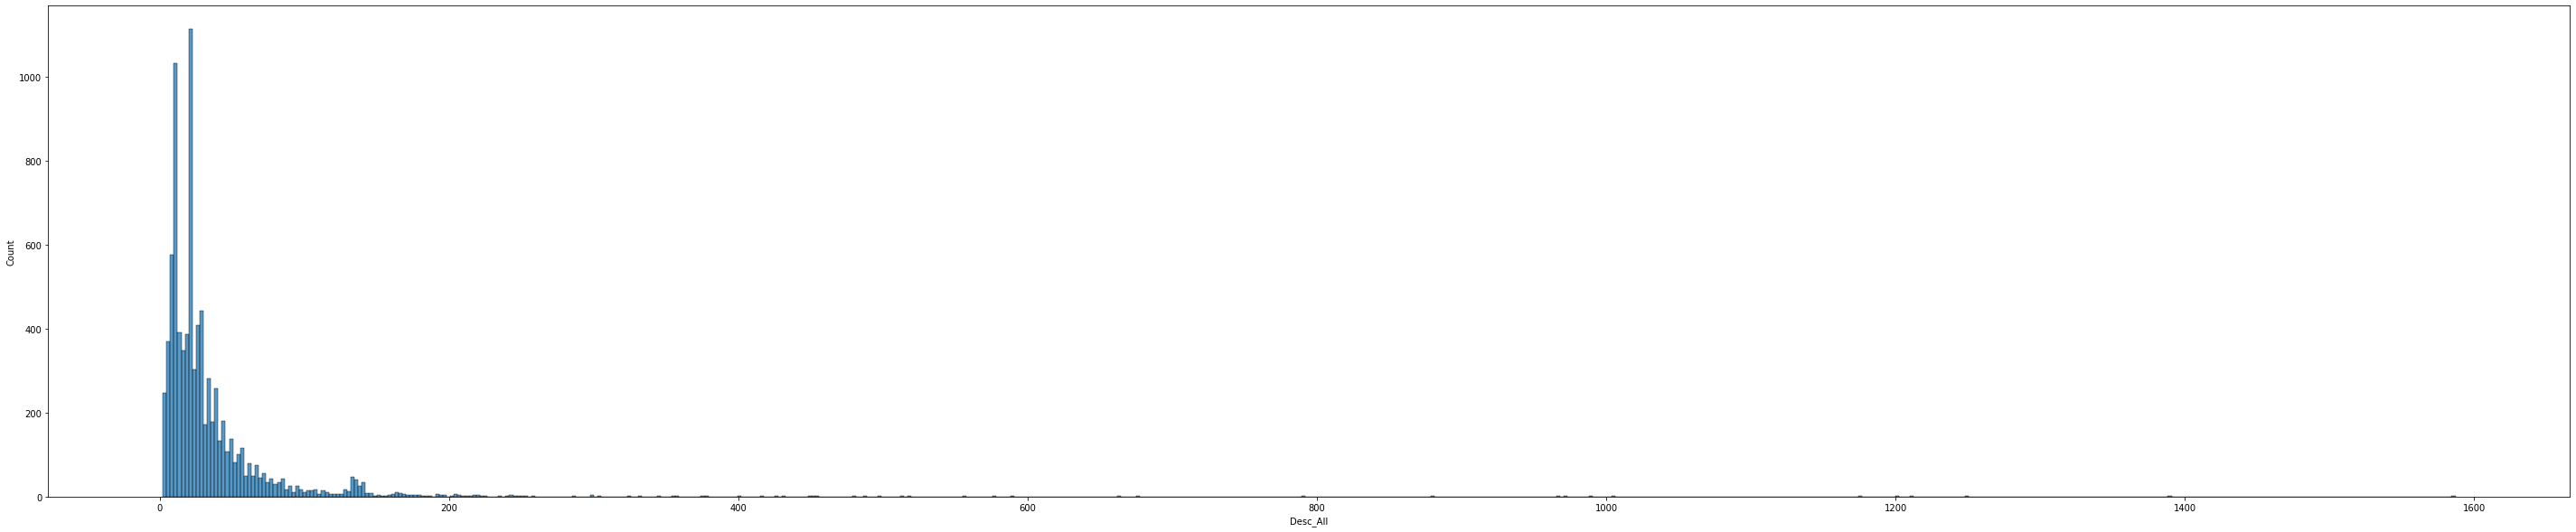

In [ ]:
fig3, ax3 = plt.subplots(figsize=(50, 10))
sns.histplot(df_data['Desc_All'].apply(lambda x: len(x.split())), ax = ax3)
plt.show()

Number of words ranges from 2 till ~ 1600 words for a tickets.

Mostly we have a range from 5 to 50 words in a ticket

In [ ]:
# Total number of words / unique words in dataset 
find_total_words_uniq_words(df_data['Desc_All'])

Total Number of words  in entire dataset for  Desc_All : 293709
Vocabulary Size - Total Number of unique words in dataset for Desc_All : 20589


**Build Corpus**

In [ ]:
corpus=[]
# Series object 
tickets= df_data['Desc_All'].str.split()
tickets_list=tickets.values.tolist()
corpus=[word for ticket in tickets_list for word in ticket]
#print(corpus)
print('corpus word count', len(corpus))
corpus_uniq_words = set(word for word in corpus)
print('unique words count',len(corpus_uniq_words) )

corpus word count 302175
unique words count 14536


**Stop word analysis**

<BarContainer object of 10 artists>

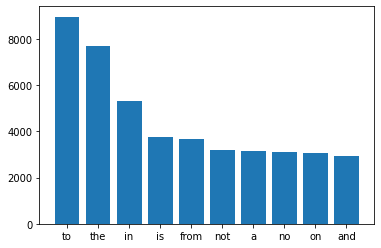

In [ ]:
# Top10 Stop words counts

from collections import defaultdict
dic_stop_words=defaultdict(int)
for word in corpus:
    if word in stop_words:
        dic_stop_words[word]+=1

top=sorted(dic_stop_words.items(), key=lambda x:x[1],reverse=True)[:10] 
x,y=zip(*top)
plt.bar(x,y)


Top Non Stop words


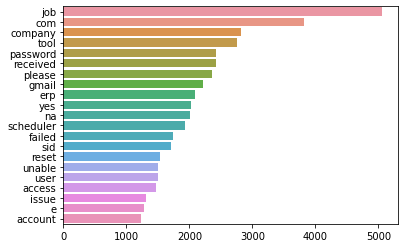

In [ ]:
print("Top Non Stop words")
from collections import  Counter
counter=Counter(corpus)
most=counter.most_common()

x, y= [], []
for word,count in most[:40]:
    if (word not in stop_words):
        x.append(word)
        y.append(count)
        
sns.barplot(x=y,y=x)


Top words clearly indicates various issue area like tool, job, password, scheduler , unable to access, account reset 

One interesting observation is 'e' word is found in most common occurence word.

In [ ]:
# Checking for word 'e' in dataset 

counter = 0
for ticket in tickets_list:
  # using set() + in
  test_list_set = set(ticket)
  if 'e' in test_list_set :
    print ("Element Exists")
    print(ticket)
    counter += 1
    if (counter > 10):
      break

Element Exists
['delivery', 'note', 'can', 't', 'do', 'post', 'goods', 'issue', 'd', 'n', 'plant', 'plant', 'to', 'plant', 'the', 'issue', 'display', 'ekpo', 'sobkz', 'e', 'ekpo', 'umsok', 'ekpo', 'kzbws', 'ekpo', 'kzvbr', 'e', 'note', 'not', 'supported', 'check', 'your', 'entry']
Element Exists
['unable', 'to', 'view', 'payslips', 'from', 'hr', 'tool', 'e', 'time', 'unable', 'to', 'view', 'payslips', 'from', 'hr', 'tool', 'e', 'time']
Element Exists
['intermittent', 'service', 'on', 'configair', 'server', 'in', 'sid', 'requires', 'probably', 'a', 'restart', 'on', 'production', 'server', 'intermittent', 'service', 'on', 'configair', 'server', 'in', 'sid', 'requires', 'probably', 'a', 'restart', 'on', 'production', 'server', 'the', 'error', 'occurs', 'in', 'production', 'and', 'shows', 'internal', 'serrver', 'error', 'error', 'while', 'trying', 'to', 'invoke', 'the', 'method', 'java', 'util', 'list', 'iterator', 'of', 'null', 'object', 'loaded', 'from', 'local', 'variable', 'local', 'li

In [ ]:
df_data[df_data['Translated_Description'].str.contains('e4')].head(5)


,Short description,Description,Caller,Assignment group,orig_desc,orig_short_desc,Lang,Translated_ShortDesc,Translated_Description,orig_assign_group,Desc_All
201,msd crm,assign crm and e license to nyrjkctu tbhkenlo ...,qmglkaru qiwhfkdv,GRP_22,assign crm and e4 license to nyrjkctu tbhkenlo...,msd crm,en,msd crm,assign crm and e4 license to nyrjkctu tbhkenlo...,GRP_22,msd crm assign crm and e license to nyrjkctu t...
774,urgent please reactive user id dudyhuyv,received from hupnceij hyozjakb gmail com hell...,hupnceij hyozjakb,GRP_33,\n\nreceived from: hupnceij.hyozjakb@gmail.com...,*** urgent *** please reactive user id = dudyh...,en,*** urgent *** please reactive user id = dudyh...,received from: hupnceij.hyozjakb@gmail.com ...,GRP_33,urgent please reactive user id dudyhuyv receiv...
925,ibm pmr s kr problem report from pwr hmc hq co...,from toolonicserviceagent pwr hmc pwr hmc hq c...,jloygrwh acvztedi,GRP_47,\nfrom: toolonicserviceagent_pwr8hmc1@pwr8hmc...,ibm pmr#902s9kr:problem report from pwr8hmc1.h...,en,ibm pmr#902s9kr:problem report from pwr8hmc1.h...,from: toolonicserviceagent_pwr8hmc1@pwr8hmc1...,GRP_47,ibm pmr s kr problem report from pwr hmc hq co...
1106,need access to sharepont approved by blktuiae ...,need access to collaboration platform approved...,tigwlquj evynjiar,GRP_16,need access to collaboration_platform approved...,need access to sharepont approved by blktuiae ...,en,need access to sharepont approved by blktuiae ...,need access to collaboration_platform approved...,GRP_16,need access to sharepont approved by blktuiae ...
1210,password reset request for erp,received from irqpwgtn dpautgeh gmail com dear...,irqpwgtn dpautgeh,GRP_0,\n\nreceived from: irqpwgtn.dpautgeh@gmail.com...,password reset request for erp,en,password reset request for erp,received from: irqpwgtn.dpautgeh@gmail.com ...,GRP_0,password reset request for erp received from i...


We could see that reason for words like e formed due to processing like e4 license, e5 license, e-mail, removing numbers in mac address.

#### Visualizing different patterns  ---Visualizing n-gram / LDA / tSNE plots

**Ngram exploration**

Ngrams are simply contiguous sequences of n words. For example “riverbank”,” The three musketeers” etc.

If the number of words is two, it is called bigram. For 3 words it is called a trigram and so on.

Looking at most frequent n-grams can give you a better understanding of the context in which the word was used.

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

def plot_top_ngrams_barchart(text, n=2):
    stop=set(stopwords.words('english'))

    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]

    def _get_top_ngram(corpus, n=None):
        vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
        bag_of_words = vec.transform(corpus)
        sum_words = bag_of_words.sum(axis=0) 
        words_freq = [(word, sum_words[0, idx]) 
                      for word, idx in vec.vocabulary_.items()]
        words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
        return words_freq[:10]

    top_n_bigrams=_get_top_ngram(text,n)[:10]
    x,y=map(list,zip(*top_n_bigrams))
    sns.barplot(x=y,y=x)

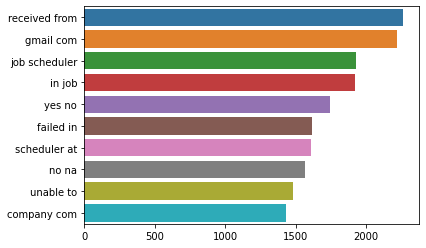

In [ ]:
n=2 # bigram 
plot_top_ngrams_barchart(df_data['Desc_All'],n)

'job scheduler', 'job', 'failed in' , 'unable to', 'gmail com' indicating issues in Jobs and also unable to access gmail com 

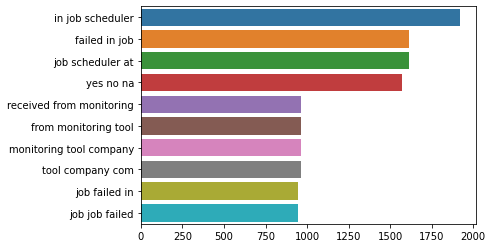

In [ ]:
n=3 # trigram
plot_top_ngrams_barchart(df_data['Desc_All'],n)

Repeated combinations for group of words ' Job scheduler at' , 'from monitoring tool', ' job failed in ' 

**Topic modeling exploration with pyLDAvis**

Topic modeling is the process of using unsupervised learning techniques to extract the main topics that occur in a collection of documents.

Latent Dirichlet Allocation (LDA) is an easy to use and efficient model for topic modeling. Each document is represented by the distribution of topics and each topic is represented by the distribution of words.

In [ ]:
# moved this installation to initial block of program
!pip install -U gensim

     |████████████████████████████████| 24.1 MB 53.1 MB/s 
  Attempting uninstall: gensim
    Found existing installation: gensim 3.6.0
    Uninstalling gensim-3.6.0:
      Successfully uninstalled gensim-3.6.0


In [ ]:
!pip install pyLDAvis

     |████████████████████████████████| 1.7 MB 17.9 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
  Created wheel for pyLDAvis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136898 sha256=92f6b85b5870ede7ea8f301afea1bfe4a35b253fb25b55166f86761a78e5303c
  Stored in directory: /root/.cache/pip/wheels/c9/21/f6/17bcf2667e8a68532ba2fbf6d5c72fdf4c7f7d9abfa4852d2f
Successfully built pyLDAvis


In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
import gensim
from nltk.stem import WordNetLemmatizer,PorterStemmer
from nltk.tokenize import word_tokenize
import pyLDAvis.gensim_models



def get_lda_objects(text, num_topics = 4):
    nltk.download('stopwords')    
    stop=set(stopwords.words('english'))

    
    def _preprocess_text(text):
        corpus=[]
        stem=PorterStemmer()
        lem=WordNetLemmatizer()
        for news in text:
            words=[w for w in word_tokenize(news) if (w not in stop)]

            words=[lem.lemmatize(w) for w in words if len(w)>2]

            corpus.append(words)
        return corpus
    
    corpus=_preprocess_text(text)
    
    dic=gensim.corpora.Dictionary(corpus)
    bow_corpus = [dic.doc2bow(doc) for doc in corpus]
    
    lda_model =  gensim.models.LdaMulticore(bow_corpus, 
                                   num_topics = num_topics, 
                                   id2word = dic,                                    
                                   passes = 10,
                                   workers = 2)
    
    return lda_model, bow_corpus, dic

def plot_lda_vis(lda_model, bow_corpus, dic):
    pyLDAvis.enable_notebook()
    vis = pyLDAvis.gensim_models.prepare(lda_model, bow_corpus, dic)
    return vis

/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Iterable
/usr/local/lib/python3.7/dist-packages/past/builtins/misc.py:4: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Mapping


In [ ]:
import warnings
warnings.filterwarnings(action= 'ignore')

In [ ]:
lda_model, bow_corpus, dic = get_lda_objects(df_data['Desc_All'])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
lda_model.show_topics()

[(0,
  '0.098*"job" + 0.051*"password" + 0.045*"tool" + 0.041*"com" + 0.037*"scheduler" + 0.032*"received" + 0.031*"company" + 0.028*"reset" + 0.023*"failed" + 0.020*"sid"'),
 (1,
  '0.021*"account" + 0.016*"outlook" + 0.015*"issue" + 0.015*"error" + 0.014*"erp" + 0.013*"locked" + 0.012*"please" + 0.011*"update" + 0.011*"user" + 0.011*"sid"'),
 (2,
  '0.014*"email" + 0.012*"com" + 0.011*"name" + 0.010*"event" + 0.010*"unable" + 0.009*"access" + 0.008*"hostname" + 0.007*"inside" + 0.007*"gmail" + 0.007*"microsoft"'),
 (3,
  '0.033*"yes" + 0.017*"com" + 0.016*"please" + 0.016*"gmail" + 0.015*"company" + 0.014*"site" + 0.011*"circuit" + 0.011*"network" + 0.011*"power" + 0.009*"vendor"')]

In [ ]:
plot_lda_vis(lda_model, bow_corpus, dic)

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3      0.045354 -0.197745       1        1  27.017550
1      0.056823  0.039877       2        1  26.882154
0     -0.253751  0.042499       3        1  24.334125
2      0.151574  0.115368       4        1  21.766170, topic_info=          Term         Freq        Total Category  logprob  loglift
198        job  4608.000000  4608.000000  Default  30.0000  30.0000
12    password  2429.000000  2429.000000  Default  29.0000  29.0000
225  scheduler  1748.000000  1748.000000  Default  28.0000  28.0000
43        tool  2501.000000  2501.000000  Default  27.0000  27.0000
348        yes  1732.000000  1732.000000  Default  26.0000  26.0000
..         ...          ...          ...      ...      ...      ...
65      ticket   247.261970  1144.619170   Topic4  -5.1360  -0.0076
47     company   281.775834  2626.316284   Topic4  -5.0053  -0.7074
30      please   266.434681  2192.420853   Topic4  -5.0613  -0.5828
15        user   243.714693  1564.733767   Topic4  -5.1504  -0.3347
266       time   179.016217   476.349402   Topic4  -5.4589   0.5461

[288 rows x 6 columns], token_table=       Topic      Freq      Term
term                            
10103      3  0.999073   abended
41         1  0.253238    access
41         2  0.332007    access
41         3  0.125147    access
41         4  0.290046    access
...      ...       ...       ...
2651       2  0.840834     wrong
2651       3  0.007786     wrong
627        4  0.990289  wvngzrca
348        1  0.987777       yes
348        4  0.012124       yes

[511 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 2, 1, 3])

LDA on entire data set show 4 important topics

1. Password reset, job scheduler / tool failed
2. Outlook issues,account locked, error all related to erp
3. Email issues, event, unable to access , hostname for gmail and microsoft
4. Site , circuit, network, vendor, power 

LDA Analysis for Top 3 groups of ticketts

GRP_0 ( 3976 )

GRP_8  (  661)

GRP_24 (   289)



LDA for Group 0

In [ ]:
lda_model_GP0, bow_corpus_GP0, dic_GP0 = get_lda_objects(df_data[df_data['Assignment group'] == 'GRP_0']['Desc_All'])
print(lda_model_GP0.show_topics())
plot_lda_vis(lda_model_GP0, bow_corpus_GP0, dic_GP0)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[(0, '0.028*"ticket" + 0.026*"update" + 0.025*"com" + 0.022*"gmail" + 0.019*"received" + 0.014*"vpn" + 0.013*"please" + 0.013*"image" + 0.012*"tool" + 0.012*"cid"'), (1, '0.026*"unable" + 0.025*"skype" + 0.018*"call" + 0.016*"error" + 0.015*"user" + 0.015*"printer" + 0.014*"erp" + 0.014*"issue" + 0.013*"tool" + 0.011*"engineering"'), (2, '0.098*"password" + 0.051*"reset" + 0.044*"account" + 0.044*"erp" + 0.034*"user" + 0.030*"sid" + 0.025*"locked" + 0.025*"login" + 0.018*"com" + 0.018*"tool"'), (3, '0.030*"com" + 0.027*"outlook" + 0.026*"gmail" + 0.019*"unable" + 0.016*"email" + 0.016*"access" + 0.014*"issue" + 0.014*"company" + 0.012*"received" + 0.011*"please"')]


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3      0.072134  0.085947       1        1  30.059775
2     -0.223224 -0.004252       2        1  28.882761
0      0.071408  0.077266       3        1  23.686694
1      0.079682 -0.158961       4        1  17.370770, topic_info=        Term         Freq        Total Category  logprob  loglift
12  password  1939.000000  1939.000000  Default  30.0000  30.0000
13     reset  1007.000000  1007.000000  Default  29.0000  29.0000
89   account   913.000000   913.000000  Default  28.0000  28.0000
57    update   432.000000   432.000000  Default  27.0000  27.0000
91    locked   520.000000   520.000000  Default  26.0000  26.0000
..       ...          ...          ...      ...      ...      ...
29   outlook   121.397327   708.992215   Topic4  -4.5652  -0.0144
0       able    78.019521   309.335135   Topic4  -5.0073   0.3729
30    please   103.354184   802.018647   Topic4  -4.7261  -0.2986
9      login    71.868627   645.393378   Topic4  -5.0894  -0.4446
92       sid    54.070967   739.554636   Topic4  -5.3740  -0.8654

[303 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
0         1  0.181033      able
0         2  0.320041      able
0         3  0.245688      able
0         4  0.252154      able
41        1  0.615863    access
...     ...       ...       ...
87        3  0.215672   working
87        4  0.375886   working
4523      1  0.934071  zdsxmcwu
5971      3  0.958630  zqbmxdgy
2795      3  0.970186  zwirhcol

[593 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 3, 1, 2])

In [ ]:
print('\n' , lda_model_GP0.show_topics()[0], '\n', lda_model_GP0.show_topics()[1], '\n', lda_model_GP0.show_topics()[2],'\n', lda_model_GP0.show_topics()[3])


 (0, '0.028*"ticket" + 0.026*"update" + 0.025*"com" + 0.022*"gmail" + 0.019*"received" + 0.014*"vpn" + 0.013*"please" + 0.013*"image" + 0.012*"tool" + 0.012*"cid"') 
 (1, '0.026*"unable" + 0.025*"skype" + 0.018*"call" + 0.016*"error" + 0.015*"user" + 0.015*"printer" + 0.014*"erp" + 0.014*"issue" + 0.013*"tool" + 0.011*"engineering"') 
 (2, '0.098*"password" + 0.051*"reset" + 0.044*"account" + 0.044*"erp" + 0.034*"user" + 0.030*"sid" + 0.025*"locked" + 0.025*"login" + 0.018*"com" + 0.018*"tool"') 
 (3, '0.030*"com" + 0.027*"outlook" + 0.026*"gmail" + 0.019*"unable" + 0.016*"email" + 0.016*"access" + 0.014*"issue" + 0.014*"company" + 0.012*"received" + 0.011*"please"')


In [ ]:
lda_model_GP8, bow_corpus_GP8, dic_GP8 = get_lda_objects(df_data[df_data['Assignment group'] == 'GRP_0']['Desc_All'])
print('\n' , lda_model_GP8.show_topics(), '\n')
plot_lda_vis(lda_model_GP8, bow_corpus_GP8, dic_GP8)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!

 [(0, '0.032*"unable" + 0.027*"account" + 0.023*"user" + 0.021*"outlook" + 0.021*"issue" + 0.019*"login" + 0.019*"email" + 0.015*"locked" + 0.013*"skype" + 0.012*"access"'), (1, '0.074*"password" + 0.058*"reset" + 0.052*"erp" + 0.035*"sid" + 0.019*"please" + 0.019*"com" + 0.017*"gmail" + 0.017*"account" + 0.013*"unlock" + 0.012*"printer"'), (2, '0.038*"com" + 0.032*"gmail" + 0.028*"ticket" + 0.024*"update" + 0.021*"received" + 0.017*"please" + 0.012*"erp" + 0.012*"company" + 0.011*"vpn" + 0.011*"inplant"'), (3, '0.058*"tool" + 0.056*"password" + 0.024*"unable" + 0.020*"engineering" + 0.016*"com" + 0.014*"management" + 0.014*"help" + 0.014*"gmail" + 0.014*"login" + 0.012*"received"')] 



PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0     -0.111682  0.025664       1        1  33.308863
2      0.158213  0.051774       2        1  25.237075
1      0.007008 -0.156424       3        1  24.216941
3     -0.053539  0.078986       4        1  17.237120, topic_info=         Term         Freq        Total Category  logprob  loglift
12   password  1971.000000  1971.000000  Default  30.0000  30.0000
13      reset  1025.000000  1025.000000  Default  29.0000  29.0000
43       tool   783.000000   783.000000  Default  28.0000  28.0000
90        erp  1231.000000  1231.000000  Default  27.0000  27.0000
52     ticket   505.000000   505.000000  Default  26.0000  26.0000
..        ...          ...          ...      ...      ...      ...
24      hello    62.986987   335.618568   Topic4  -5.2136   0.0851
45      error    64.324844   447.589574   Topic4  -5.1926  -0.1818
69       open    53.969131   251.202113   Topic4  -5.3682   0.2203
49        new    48.696242   189.292372   Topic4  -5.4710   0.4004
160    window    49.722210   372.961305   Topic4  -5.4501  -0.2569

[307 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
0         1  0.560618      able
0         2  0.091263      able
0         3  0.097782      able
0         4  0.250974      able
2817      3  0.955421    accept
...     ...       ...       ...
87        2  0.239329   working
87        3  0.214464   working
87        4  0.080812   working
2665      4  0.939788  xhaomnjl
4523      1  0.938121  zdsxmcwu

[583 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 3, 2, 4])

In [ ]:
print('\n' , lda_model_GP8.show_topics()[0], '\n', lda_model_GP8.show_topics()[1], '\n', lda_model_GP8.show_topics()[2],'\n', lda_model_GP8.show_topics()[3])


 (0, '0.032*"unable" + 0.027*"account" + 0.023*"user" + 0.021*"outlook" + 0.021*"issue" + 0.019*"login" + 0.019*"email" + 0.015*"locked" + 0.013*"skype" + 0.012*"access"') 
 (1, '0.074*"password" + 0.058*"reset" + 0.052*"erp" + 0.035*"sid" + 0.019*"please" + 0.019*"com" + 0.017*"gmail" + 0.017*"account" + 0.013*"unlock" + 0.012*"printer"') 
 (2, '0.038*"com" + 0.032*"gmail" + 0.028*"ticket" + 0.024*"update" + 0.021*"received" + 0.017*"please" + 0.012*"erp" + 0.012*"company" + 0.011*"vpn" + 0.011*"inplant"') 
 (3, '0.058*"tool" + 0.056*"password" + 0.024*"unable" + 0.020*"engineering" + 0.016*"com" + 0.014*"management" + 0.014*"help" + 0.014*"gmail" + 0.014*"login" + 0.012*"received"')


In [ ]:
lda_model_GP24, bow_corpus_GP24, dic_GP24 = get_lda_objects(df_data[df_data['Assignment group'] == 'GRP_24']['Desc_All'])
print('\n' , lda_model_GP24.show_topics(), '\n')
plot_lda_vis(lda_model_GP24, bow_corpus_GP24, dic_GP24)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!

 [(0, '0.041*"new" + 0.040*"setup" + 0.039*"problem" + 0.025*"jionmpsf" + 0.025*"wnkpzcmv" + 0.017*"mit" + 0.017*"tool" + 0.015*"reinstall" + 0.013*"probleme" + 0.011*"ljtzbdqg"'), (1, '0.067*"setup" + 0.053*"new" + 0.030*"calculator" + 0.023*"wzrgyunp" + 0.023*"wrcktgbd" + 0.014*"problem" + 0.013*"ewew" + 0.012*"work" + 0.010*"wnkpzcmv" + 0.010*"jionmpsf"'), (2, '0.044*"problem" + 0.020*"csenjruz" + 0.019*"niptbwdq" + 0.017*"mit" + 0.015*"probleme" + 0.015*"printer" + 0.014*"access" + 0.014*"calculator" + 0.012*"support" + 0.010*"portal"'), (3, '0.049*"ewew" + 0.049*"problem" + 0.045*"install" + 0.022*"vzqomdgt" + 0.022*"jwoqbuml" + 0.019*"monitor" + 0.016*"lan" + 0.016*"erpgui" + 0.015*"tool" + 0.011*"calculator"')] 



PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3     -0.171118 -0.107166       1        1  29.386929
2     -0.075795  0.157917       2        1  27.319220
0      0.121715  0.004235       3        1  24.044709
1      0.125198 -0.054987       4        1  19.249142, topic_info=         Term       Freq       Total Category  logprob  loglift
47      setup  73.000000   73.000000  Default  30.0000  30.0000
121       new  65.000000   65.000000  Default  29.0000  29.0000
38    install  43.000000   43.000000  Default  28.0000  28.0000
184      ewew  62.000000   62.000000  Default  27.0000  27.0000
103  vzqomdgt  22.000000   22.000000  Default  26.0000  26.0000
..        ...        ...         ...      ...      ...      ...
13    problem   8.958937  123.736422   Topic4  -4.2337  -0.9778
68     please   4.861269   22.469763   Topic4  -4.8450   0.1168
29        old   3.663810    9.486787   Topic4  -5.1278   0.6963
678  yegzbvru   3.299383    7.178524   Topic4  -5.2326   0.8703
4     support   3.299167   21.805069   Topic4  -5.2327  -0.2408

[230 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
346       1  0.068195     access
346       2  0.818336     access
346       4  0.068195     access
368       1  0.096578    account
368       2  0.386313    account
...     ...       ...        ...
678       2  0.417913   yegzbvru
678       4  0.417913   yegzbvru
187       4  0.849759  zcaermtdt
531       4  0.916059     zedlet
37        1  0.954090   zlqfptjx

[272 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 3, 1, 2])

In [ ]:
print('\n' , lda_model_GP24.show_topics()[0], '\n', lda_model_GP24.show_topics()[1], '\n', lda_model_GP24.show_topics()[2],'\n', lda_model_GP24.show_topics()[3])


 (0, '0.041*"new" + 0.040*"setup" + 0.039*"problem" + 0.025*"jionmpsf" + 0.025*"wnkpzcmv" + 0.017*"mit" + 0.017*"tool" + 0.015*"reinstall" + 0.013*"probleme" + 0.011*"ljtzbdqg"') 
 (1, '0.067*"setup" + 0.053*"new" + 0.030*"calculator" + 0.023*"wzrgyunp" + 0.023*"wrcktgbd" + 0.014*"problem" + 0.013*"ewew" + 0.012*"work" + 0.010*"wnkpzcmv" + 0.010*"jionmpsf"') 
 (2, '0.044*"problem" + 0.020*"csenjruz" + 0.019*"niptbwdq" + 0.017*"mit" + 0.015*"probleme" + 0.015*"printer" + 0.014*"access" + 0.014*"calculator" + 0.012*"support" + 0.010*"portal"') 
 (3, '0.049*"ewew" + 0.049*"problem" + 0.045*"install" + 0.022*"vzqomdgt" + 0.022*"jwoqbuml" + 0.019*"monitor" + 0.016*"lan" + 0.016*"erpgui" + 0.015*"tool" + 0.011*"calculator"')


### Visualizing Word Vectors with t-SNE



● Text preprocessing
include lemmatization

In [ ]:

from nltk.stem import WordNetLemmatizer,PorterStemmer
from nltk.tokenize import word_tokenize
    
def preprocess_vocab(df_column):
    corpus=[]
    stop_words=set(stopwords.words('english'))
    #stem=PorterStemmer()
    lem=WordNetLemmatizer()
    for tickets in df_column:
        words=[w for w in word_tokenize(tickets) if (w not in stop_words)]
        words=[lem.lemmatize(w) for w in words if len(w)>2]
        corpus.append(words)

    df_column = df_column.apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))
    
    return corpus,df_column

tickets_list,df_column = preprocess_vocab(df_data['Desc_All'])
df_data['desc_processed'] = df_column


In [ ]:
print(tickets_list[0])
print(df_data['Desc_All'][0])

['login', 'issue', 'verified', 'user', 'detail', 'employee', 'manager', 'name', 'checked', 'user', 'name', 'reset', 'password', 'advised', 'user', 'login', 'check', 'caller', 'confirmed', 'able', 'login', 'issue', 'resolved']
login issue verified user details employee manager name checked the user name in ad and reset the password advised the user to login and check caller confirmed that he was able to login issue resolved


In [ ]:
corpus=[]
corpus=[word for ticket in tickets_list for word in ticket]
#print(corpus)
print('corpus word count', len(corpus))
corpus_uniq_words = set(word for word in corpus)
print('unique words count',len(corpus_uniq_words) )

corpus word count 193152
unique words count 13404


In [ ]:
tickets_list[0]

['login',
 'issue',
 'verified',
 'user',
 'detail',
 'employee',
 'manager',
 'name',
 'checked',
 'user',
 'name',
 'reset',
 'password',
 'advised',
 'user',
 'login',
 'check',
 'caller',
 'confirmed',
 'able',
 'login',
 'issue',
 'resolved']

In [ ]:
# load the word2vec algorithm from the gensim library  
from gensim.models import word2vec  
# run the model  
#model = word2vec.Word2Vec(tickets_list, vector_size=100, window=5, min_count=100, workers=4)  
model = word2vec.Word2Vec(tickets_list, vector_size=100, window=5, min_count=50, workers=4) 

In [ ]:
#len(model.wv.vocab)
#AttributeError: The vocab attribute was removed from KeyedVector in Gensim 4.0.0.
#Use KeyedVector's .key_to_index dict, .index_to_key list, and methods .get_vecattr(key, attr) and .set_vecattr(key, attr, new_val) instead.
#See https://github.com/RaRe-Technologies/gensim/wiki/Migrating-from-Gensim-3.x-to-4

len(model.wv.key_to_index)


553

In [ ]:
# Top 10 words
[x for x in model.wv.key_to_index][0:10]  

['job',
 'com',
 'tool',
 'company',
 'password',
 'received',
 'please',
 'gmail',
 'erp',
 'yes']

In [ ]:
model.wv['login']

array([-0.10856606,  0.7930819 , -0.8899574 ,  0.46502516,  1.5639257 ,
       -0.23111725,  1.3552614 ,  0.5305239 , -0.17231978, -0.16005544,
       -0.32349563, -0.95823824,  0.52370745, -0.364466  , -0.30526623,
       -0.50424707, -0.04447934,  0.50182915,  0.2733163 , -1.0147454 ,
        0.29721177,  0.83030933,  0.03581263,  1.3201189 ,  0.27905232,
       -0.46375912, -0.7484718 ,  0.03126679, -0.21233618, -1.160331  ,
        0.19538757,  0.14102781,  0.55730975, -0.87111425,  0.3023617 ,
       -0.4400086 ,  0.727684  ,  0.31879368,  0.3199031 , -0.30609983,
       -0.67284465, -0.7513363 , -0.9171564 ,  0.53180486,  0.45955098,
       -0.36623195, -0.30870378,  0.08271834,  0.85585845,  0.02504951,
       -0.07459842, -0.34293187,  0.37706214, -0.6424447 , -0.13255808,
       -0.74385315,  0.06290931, -0.898805  ,  0.5464501 ,  0.6920758 ,
       -0.28957188, -0.5063006 ,  0.97201484,  0.02613229, -1.1164674 ,
        0.3774281 , -0.14135338,  0.9550957 , -0.25548935,  0.92

In [ ]:
# Top 10 Similar/related words 
[(item[0],round(item[1],2)) for item in model.wv.most_similar('login')]  

[('caller', 0.91),
 ('confirmed', 0.87),
 ('resolved', 0.86),
 ('hub', 0.84),
 ('es', 0.84),
 ('logging', 0.83),
 ('teamviewer', 0.81),
 ('advised', 0.8),
 ('sync', 0.79),
 ('able', 0.79)]

In [ ]:
# Top 10 Similar/related words 
[(item[0],round(item[1],2)) for item in model.wv.most_similar('laptop')]  

[('dell', 0.81),
 ('computer', 0.8),
 ('office', 0.78),
 ('old', 0.75),
 ('wifi', 0.74),
 ('setup', 0.73),
 ('room', 0.72),
 ('machine', 0.71),
 ('work', 0.7),
 ('setting', 0.69)]

In [ ]:
# Top 10 Similar/related words 
[(item[0],round(item[1],2)) for item in model.wv.most_similar('erp')] 

[('logon', 0.86),
 ('hrp', 0.84),
 ('sid', 0.83),
 ('transaction', 0.8),
 ('hana', 0.77),
 ('production', 0.77),
 ('lock', 0.75),
 ('slow', 0.74),
 ('locked', 0.74),
 ('many', 0.74)]

In [ ]:

# Top 10 Similar/related words 
[(item[0],round(item[1],2)) for item in model.wv.most_similar('mit')] 

[('engineer', 0.87),
 ('image', 0.84),
 ('jpg', 0.83),
 ('best', 0.82),
 ('png', 0.82),
 ('cid', 0.82),
 ('kind', 0.79),
 ('shared', 0.76),
 ('partner', 0.73),
 ('sincerely', 0.7)]

t-distributed stochastic neighbor embedding (t-SNE) is a statistical method for visualizing high-dimensional data by giving each datapoint a location in a two or three-dimensional map

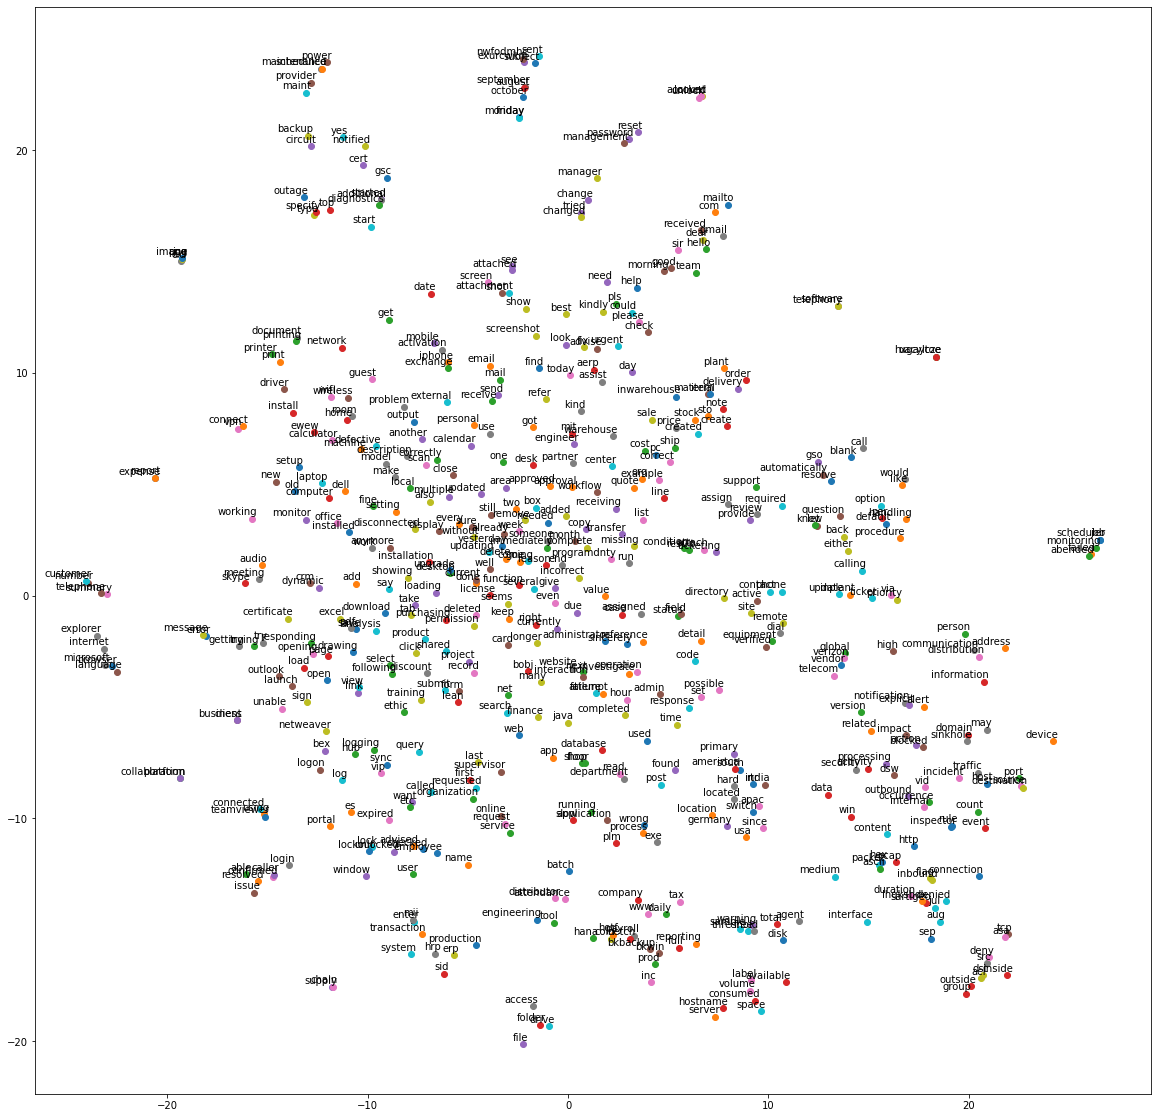

In [ ]:
# import the t-SNE library and matplotlib for plotting  
from sklearn.manifold import TSNE  
import matplotlib.pyplot as plt  
  
# define the function to compute the dimensionality reduction  
# and then produce the biplot  
def tsne_plot(model):
  "Creates a TSNE model and plots it"  
  labels = []
  tokens = []

  for word in model.wv.key_to_index:
    tokens.append(model.wv[word])
    labels.append(word)

  tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500)  
  new_values = tsne_model.fit_transform(tokens)  

  x = []  
  y = []  
  for value in new_values:  
    x.append(value[0])  
    y.append(value[1])  

  plt.figure(figsize=(20, 20))   
  for i in range(len(x)):  
    plt.scatter(x[i],y[i])  
    plt.annotate(labels[i],  
    xy=(x[i], y[i]),  
    xytext=(5, 2),  
    textcoords='offset points',  
    ha='right',  
    va='bottom')  
  plt.show()  
  
# call the function on our dataset  
tsne_plot(model)  

t-SNE model has picked up some interesting word clusters. There is a cluster of words that appears to indicate countries and places. Words in this cluster include: usa, germany, india, amsterdam etc.

A second cluster of words appears to indicate machines, and includes words such as: laptop, wifi, homecomputer, monitor, wireless, machine etc.

A few other cluster of words. Group of words appear to indicate issue: password reset management,  drive folder access etc.

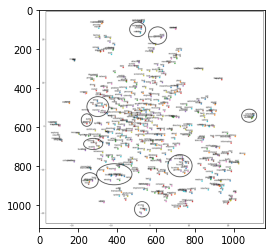

In [ ]:
import matplotlib.image as mpimg
im = mpimg.imread("/content/drive/MyDrive/AIML/projects/Capstone-NLP-Ticketing/tSNE Plot.png")

plt.imshow(im)

In [ ]:
print("EDA part completed")

EDA part completed


# <a name="Part4_Header">Part 4 - Build Model</a>

# <a name="Part4_1">Build Benchmark Model</a>

# <a name="Part4_1_1">1 - Build Logistic Regression Model</a>

## 1. Import and analyse the data set.

In [ ]:
import pandas as pd # read data file, data processing
import numpy as np # linear algebra
import matplotlib.pyplot as plt # plotting graph for EDA , Metrics analysis
%matplotlib inline
import seaborn as sns # plotting graph for EDA , Metrics analysis

### Load the data 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Input data files has been processed for 
# 1. carriage return characters like '_x000D_' and \n 
# 2. Accented encoding character like äº§å“æ‰€åœ¨ä»“åº“å‡ºé”™ã€ , è¿žæŽ¥åŽè‡ªåŠ¨æ–­å¼€ï¼Œæ
# 3. Translation of words in non english language especially German, Italian, French
# Above 3 steps are done separately and output from these steps are used for further processing in Part 2
# 4. Update of Assigment group - fewer data groups , grouped to Group others
# 5. Pre-process for having only English data after translation, removal of spaces 
# 6. Treatment of Null values
# Above step 4,5,6 are done in part2 and processed data is stored in input_data_trans_preprocess.csv

data_dir = "/content/drive/MyDrive/AIML/projects/Capstone-NLP-Ticketing/"
data_file_name='input_data_trans_preprocess.csv'
data_file_path = data_dir+data_file_name
data_file_path

'/content/drive/MyDrive/AIML/projects/Capstone-NLP-Ticketing/input_data_trans_preprocess.csv'

In [ ]:
#df_data = pd.read_excel(data_file_path)
df_data = pd.read_csv(data_file_path)

In [ ]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8467 entries, 0 to 8466
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Short description       8467 non-null   object
 1   Description             8467 non-null   object
 2   Caller                  8467 non-null   object
 3   Assignment group        8467 non-null   object
 4   orig_desc               8466 non-null   object
 5   orig_short_desc         8459 non-null   object
 6   Lang                    8467 non-null   object
 7   Translated_ShortDesc    8450 non-null   object
 8   Translated_Description  8467 non-null   object
 9   orig_assign_group       8467 non-null   object
dtypes: object(10)
memory usage: 661.6+ KB


**Feature with both description - Merging both Description and Short description**

In [ ]:
df_data['Desc_All'] = df_data['Short description'] + ' '+ df_data['Description']
# Strip unwanted spaces
df_data['Desc_All'] = df_data['Desc_All'].apply(lambda x: x.strip())

**Feature with description and caller - Merging both Description ,  Short description and Caller**

In [ ]:
# Merge Desc, Short Desc and Caller 
df_data['Desc_all_Caller'] = df_data['Desc_All']  + ' '+ df_data['Caller']

In [ ]:
# Import stop words list from NLTK
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords # Import stop words
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

● Text preprocessing
include lemmatization

In [ ]:

from nltk.stem import WordNetLemmatizer,PorterStemmer
from nltk.tokenize import word_tokenize
    
def preprocess_vocab(df_column):
    corpus=[]
    stop_words=set(stopwords.words('english'))
    #stem=PorterStemmer()
    lem=WordNetLemmatizer()
    for tickets in df_column:
      words=[w for w in word_tokenize(tickets) if (w not in stop_words)]
      words=[lem.lemmatize(w) for w in words if len(w)>2]
      corpus.append(words)

    df_column_upd = df_column.apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))
    
    return  df_column_upd, corpus


## Train a simple ML Model - Logistic Regression

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report

def calc_metrics(actual,predicted):
  print('Accuracy score: ', round(accuracy_score(actual, predicted),2))
  print("precision_weighted:", round(precision_score(actual, predicted,average='weighted', zero_division=1),2))
  print("recall_weighted:", round(recall_score(actual, predicted,average='weighted', zero_division=1 ),2))
  print("f1_weighted:", round(f1_score(actual, predicted,average='weighted', zero_division=1 ),2))
  #print("Classification Report:")
  #print(classification_report(y_test_mdl_cat, y_pred_bow,zero_division=1))

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import preprocessing
from tensorflow.keras.utils import to_categorical

def run_model(model, X_train, X_val, y_train, y_val):

  # convert X_train to BOW values  - Featurization
  vectorizer = CountVectorizer(binary=True)
  X_train_bow = vectorizer.fit_transform(X_train)
  X_val_bow = vectorizer.transform(X_val)

  # Convert Target variable to categorical value using label encoding
  y = df_data['Assignment group'].values
  le = preprocessing.LabelEncoder()
  le.fit(y)
  y_train_mdl_lbl_enc = le.transform(y_train)
  y_train_mdl_cat = to_categorical(y_train_mdl_lbl_enc)
  y_val_mdl_lbl_enc = le.transform(y_val)
  y_val_mdl_cat = to_categorical(y_val_mdl_lbl_enc)

  # Train the model
  history = model.fit(X_train_bow, y_train_mdl_cat)
  print("Model trainded")
  # Predict for given validation value

  y_pred_bow = model.predict(X_val_bow)
  print("Model Prediction completed")
  actual = y_val_mdl_cat
  predicted = y_pred_bow

  calc_metrics(actual,predicted)
  return history

In [ ]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression

def run_LR_model(X_train, X_val, y_train, y_val):
  clf = LogisticRegression(solver='lbfgs', max_iter=250)
  clf = OneVsRestClassifier(clf)
  #model = clf
  history = run_model(clf, X_train, X_val, y_train, y_val)
  return clf, history

In [ ]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8467 entries, 0 to 8466
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Short description       8467 non-null   object
 1   Description             8467 non-null   object
 2   Caller                  8467 non-null   object
 3   Assignment group        8467 non-null   object
 4   orig_desc               8466 non-null   object
 5   orig_short_desc         8459 non-null   object
 6   Lang                    8467 non-null   object
 7   Translated_ShortDesc    8450 non-null   object
 8   Translated_Description  8467 non-null   object
 9   orig_assign_group       8467 non-null   object
 10  Desc_All                8467 non-null   object
 11  Desc_all_Caller         8467 non-null   object
dtypes: object(12)
memory usage: 793.9+ KB


#### Model : Logistic Regression ; Feature type : Bag of words;  Features : Description


In [ ]:
feature_name = "Description"
model1, history1, xp, yp = run_LR_model(feature_name)


feature is Description
Prod Shape (424,)
Train shape 6032
Val shape 2011
Model trainded
Model Prediction completed
Accuracy score:  0.52
precision_weighted: 0.78
recall_weighted: 0.53
f1_weighted: 0.56


#### Model : Logistic Regression ; Feature type : Bag of words;  Features : Short Description


In [ ]:
feature_name = "Short description"
model2, history2, xp, yp = run_LR_model(feature_name)


feature is Short description
Prod Shape (424,)
Train shape 6032
Val shape 2011
Model trainded
Model Prediction completed
Accuracy score:  0.52
precision_weighted: 0.83
recall_weighted: 0.53
f1_weighted: 0.56


#### Model : Logistic Regression ; Feature type : Bag of words;  Features :  Description & Short Description


In [ ]:
feature_name = "Desc_All"
model3, history3, xp, yp = run_LR_model(feature_name)

feature is Desc_All
Prod Shape (424,)
Train shape 6032
Val shape 2011
Model trainded
Model Prediction completed
Accuracy score:  0.55
precision_weighted: 0.82
recall_weighted: 0.57
f1_weighted: 0.6


#### Model : Logistic Regression ; Feature type : Bag of words;  Features :  Description & Short Description & Caller


In [ ]:
feature_name = "Desc_all_Caller"
X, corpus = preprocess_vocab(df_data[feature_name])
y = df_data['Assignment group'].values
# Split data into Train, and Test - Test data would be used for testing the model 
X_train, X_prod, y_train, y_prod = train_test_split(X, y, test_size=0.05, random_state=0, stratify=y)
print('Prod Shape', X_prod.shape )
X_train, X_val, y_train, y_val = train_test_split(X, y, random_state=0, stratify=y)
print('Train shape', len(X_train))
print('Val shape', len(X_val))
model4, history4 = run_LR_model(X_train, X_val, y_train, y_val )

Prod Shape (424,)
Train shape 6350
Val shape 2117
Model trainded
Model Prediction completed
Accuracy score:  0.55
precision_weighted: 0.81
recall_weighted: 0.56
f1_weighted: 0.6


#### Test model with best model in logistic regression

In [ ]:
vectorizer4 = CountVectorizer(binary=True)
vectorizer4.fit(X_train)
#print(X_prod)
X_prod_bow = vectorizer4.transform(X_prod)
#print(X_prod_bow)
y_pred_bow = model4.predict(X_prod_bow)
print("Model Prediction completed")

y = df_data['Assignment group'].values
le = preprocessing.LabelEncoder()
le.fit(y)
y_prod_mdl_lbl_enc = le.transform(y_prod)
y_prod_mdl_cat = to_categorical(y_prod_mdl_lbl_enc)

actual = y_prod_mdl_cat
predicted = y_pred_bow

print(X_prod[:10])
print(y_prod[:10])

print("Input ticket", X_prod.iloc[2])
print("Actual assignment group", y_prod[2])
print(predicted[2])



Model Prediction completed
6053    scanning recording comes message path exist sc...
4145    expense report error manager needs authorizati...
4252    dell system slow mscrm slow dell system slow c...
2624    unable inwarehouse tool received nuhfwplj ojcw...
3426    erp pur wrong subcontracting demand nd materia...
7629    customer service enters order acct get error s...
6755    job job failed job scheduler received monitori...
140     prtgghj k password reset please reset hr tool ...
6550    cannot open pptx file attached email gives rep...
127       update inplant update inplant rbozivdq gmlhrtvp
Name: Desc_all_Caller, dtype: object
['GRP_33' 'GRP_2' 'GRP_0' 'GRP_13' 'GRP_29' 'GRP_13' 'GRP_8' 'GRP_0'
 'GRP_3' 'GRP_0']
Input ticket dell system slow mscrm slow dell system slow connected user system using teamviewer cleared cache cookies temp files updated symantec user updated system bios restarted pc advised user try check user launched mscrm working fine issue resolved c jziwhldq qs

In [ ]:
le.inverse_transform([0])

array(['GRP_0'], dtype=object)

# <a name="Part4_1_2">2. Build SVM Model</a>

In [ ]:
#import the libraries
import pandas as pd
import numpy as np
from google.colab import drive

import matplotlib.pyplot as plt

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
project_path = "/content/drive/MyDrive/AIML/Projects/Capstone/"

In [ ]:
df=pd.read_excel(project_path + 'input_data.xlsx')

In [ ]:
df.head()

,Short description,Description,Caller,Assignment group
0,login issue,-verified user details.(employee# & manager na...,spxjnwir pjlcoqds,GRP_0
1,outlook,_x000D_\n_x000D_\nreceived from: hmjdrvpb.komu...,hmjdrvpb komuaywn,GRP_0
2,cant log in to vpn,_x000D_\n_x000D_\nreceived from: eylqgodm.ybqk...,eylqgodm ybqkwiam,GRP_0
3,unable to access hr_tool page,unable to access hr_tool page,xbkucsvz gcpydteq,GRP_0
4,skype error,skype error,owlgqjme qhcozdfx,GRP_0


In [ ]:
df = df.replace(r'\n',' ', regex=True). replace(r'_x000D_',' ', regex=True)

In [ ]:
df.head()

,Short description,Description,Caller,Assignment group
0,login issue,-verified user details.(employee# & manager na...,spxjnwir pjlcoqds,GRP_0
1,outlook,received from: hmjdrvpb.komuaywn@gmail.com...,hmjdrvpb komuaywn,GRP_0
2,cant log in to vpn,received from: eylqgodm.ybqkwiam@gmail.com...,eylqgodm ybqkwiam,GRP_0
3,unable to access hr_tool page,unable to access hr_tool page,xbkucsvz gcpydteq,GRP_0
4,skype error,skype error,owlgqjme qhcozdfx,GRP_0


## Length of Each Document (Description)

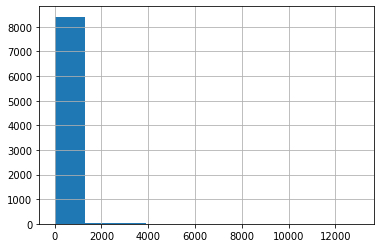

In [ ]:
df['Description'].str.len().hist();

In [ ]:
print('Minimum Length of Sentences in dataset : '+str(np.min(df['Description'].str.len())))
print('Maximum Length of Sentences in dataset : '+str(np.max(df['Description'].str.len())))
print('Mean Length of Sentences in dataset : '+str(round(np.mean(df['Description'].str.len()))))

Minimum Length of Sentences in dataset : 1.0
Maximum Length of Sentences in dataset : 13001.0
Mean Length of Sentences in dataset : 204


## Detect Language

In [ ]:
pip install langdetect

     |████████████████████████████████| 981 kB 4.8 MB/s 
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993242 sha256=aefe106be531911871f56f6b5d1f1b7bf4326b1d87a4d64035dd2b078ee40297
  Stored in directory: /root/.cache/pip/wheels/c5/96/8a/f90c59ed25d75e50a8c10a1b1c2d4c402e4dacfa87f3aff36a
Successfully built langdetect


In [ ]:
from langdetect import detect

In [ ]:
def det(x):
    try:
        lang = detect(x)
    except:
        lang = 'Other'
    return lang

df['Lang'] = df['Description'].apply(det)

In [ ]:
df.head()

,Short description,Description,Caller,Assignment group,Lang
0,login issue,-verified user details.(employee# & manager na...,spxjnwir pjlcoqds,GRP_0,en
1,outlook,received from: hmjdrvpb.komuaywn@gmail.com...,hmjdrvpb komuaywn,GRP_0,en
2,cant log in to vpn,received from: eylqgodm.ybqkwiam@gmail.com...,eylqgodm ybqkwiam,GRP_0,en
3,unable to access hr_tool page,unable to access hr_tool page,xbkucsvz gcpydteq,GRP_0,en
4,skype error,skype error,owlgqjme qhcozdfx,GRP_0,no


In [ ]:
df['Lang'].value_counts()

en       7001
de        400
af        264
it        157
fr        121
sv         82
da         79
no         66
ca         61
nl         59
es         52
pl         31
pt         28
ro         17
tl         11
cy         10
sl         10
et          8
sq          7
fi          6
so          5
hr          5
tr          4
id          4
Other       4
sk          3
lt          2
sw          1
cs          1
lv          1
Name: Lang, dtype: int64

Text(0.5, 1.0, 'Description Language Codes')

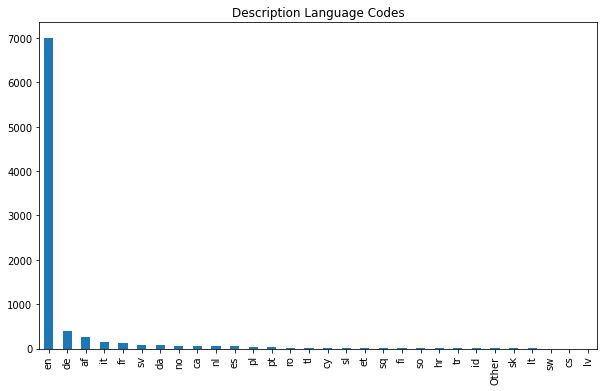

In [ ]:
top_10 = df['Lang'].value_counts()
top_10.plot(kind='bar',figsize=(10,6))
plt.title('Description Language Codes')

## Class Distribution

In [ ]:
df['Assignment group'].value_counts()

GRP_0     3976
GRP_8      661
GRP_24     289
GRP_12     257
GRP_9      252
          ... 
GRP_64       1
GRP_67       1
GRP_35       1
GRP_70       1
GRP_73       1
Name: Assignment group, Length: 74, dtype: int64

## Missing Values in Description

In [ ]:
df.isnull().sum()

Short description    8
Description          1
Caller               0
Assignment group     0
Lang                 0
dtype: int64

In [ ]:
df.isna().sum()

Short description    8
Description          1
Caller               0
Assignment group     0
Lang                 0
dtype: int64

In [ ]:
df[df['Description'].isna() == True]

,Short description,Description,Caller,Assignment group,Lang
4395,i am locked out of skype,NaN,viyglzfo ajtfzpkb,GRP_0,Other


In [ ]:
df['Description'].fillna(df['Short description'], inplace=True)

In [ ]:
 df[['Short description', 'Description']].iloc[4395]

Short description    i am locked out of skype
Description          i am locked out of skype
Name: 4395, dtype: object

In [ ]:
df.isna().sum()

Short description    8
Description          0
Caller               0
Assignment group     0
Lang                 0
dtype: int64

# Preprocess Data

## Remove Special Characters and Numerical Values

In [ ]:
df_en = df[df['Lang'] == 'en']

In [ ]:
import re

In [ ]:
df_en['PreProcessedText'] = df_en['Description'].apply(lambda x: re.sub('[^A-Za-z ]+', '',x))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df_en['PreProcessedText'] = df_en['PreProcessedText'].apply(lambda x: x.lower())

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df_en.head()

,Short description,Description,Caller,Assignment group,Lang,PreProcessedText
0,login issue,-verified user details.(employee# & manager na...,spxjnwir pjlcoqds,GRP_0,en,verified user detailsemployee manager name c...
1,outlook,received from: hmjdrvpb.komuaywn@gmail.com...,hmjdrvpb komuaywn,GRP_0,en,received from hmjdrvpbkomuaywngmailcom ...
2,cant log in to vpn,received from: eylqgodm.ybqkwiam@gmail.com...,eylqgodm ybqkwiam,GRP_0,en,received from eylqgodmybqkwiamgmailcom ...
3,unable to access hr_tool page,unable to access hr_tool page,xbkucsvz gcpydteq,GRP_0,en,unable to access hrtool page
5,unable to log in to engineering tool and skype,unable to log in to engineering tool and skype,eflahbxn ltdgrvkz,GRP_0,en,unable to log in to engineering tool and skype


## Stop Words

In [ ]:
import nltk
from nltk.corpus import stopwords
nltk.download("stopwords")


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
stop_words=set(stopwords.words('english'))

## Remove Stop Words

In [ ]:
df_en['txt_wo_stopwords'] = df_en['PreProcessedText'].apply(lambda words: ' '.join(word.lower() for word in words.split() if word not in stop_words))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df_en.head()

,Short description,Description,Caller,Assignment group,Lang,PreProcessedText,txt_wo_stopwords
0,login issue,-verified user details.(employee# & manager na...,spxjnwir pjlcoqds,GRP_0,en,verified user detailsemployee manager name c...,verified user detailsemployee manager name che...
1,outlook,received from: hmjdrvpb.komuaywn@gmail.com...,hmjdrvpb komuaywn,GRP_0,en,received from hmjdrvpbkomuaywngmailcom ...,received hmjdrvpbkomuaywngmailcom hello team m...
2,cant log in to vpn,received from: eylqgodm.ybqkwiam@gmail.com...,eylqgodm ybqkwiam,GRP_0,en,received from eylqgodmybqkwiamgmailcom ...,received eylqgodmybqkwiamgmailcom hi cannot lo...
3,unable to access hr_tool page,unable to access hr_tool page,xbkucsvz gcpydteq,GRP_0,en,unable to access hrtool page,unable access hrtool page
5,unable to log in to engineering tool and skype,unable to log in to engineering tool and skype,eflahbxn ltdgrvkz,GRP_0,en,unable to log in to engineering tool and skype,unable log engineering tool skype


## Remove all extra white spaces

In [ ]:
df_en['txt_wo_stopwords'] = df_en['txt_wo_stopwords'].apply(lambda x: re.sub(' +', ' ', x))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df_en.head()

,Short description,Description,Caller,Assignment group,Lang,PreProcessedText,txt_wo_stopwords
0,login issue,-verified user details.(employee# & manager na...,spxjnwir pjlcoqds,GRP_0,en,verified user detailsemployee manager name c...,verified user detailsemployee manager name che...
1,outlook,received from: hmjdrvpb.komuaywn@gmail.com...,hmjdrvpb komuaywn,GRP_0,en,received from hmjdrvpbkomuaywngmailcom ...,received hmjdrvpbkomuaywngmailcom hello team m...
2,cant log in to vpn,received from: eylqgodm.ybqkwiam@gmail.com...,eylqgodm ybqkwiam,GRP_0,en,received from eylqgodmybqkwiamgmailcom ...,received eylqgodmybqkwiamgmailcom hi cannot lo...
3,unable to access hr_tool page,unable to access hr_tool page,xbkucsvz gcpydteq,GRP_0,en,unable to access hrtool page,unable access hrtool page
5,unable to log in to engineering tool and skype,unable to log in to engineering tool and skype,eflahbxn ltdgrvkz,GRP_0,en,unable to log in to engineering tool and skype,unable log engineering tool skype


In [ ]:
pd.DataFrame(corpus).value_counts()[:25]

received                    2269
please                      1912
yesnona                     1568
job                         1520
user                        1143
jobscheduler                 967
password                     967
monitoringtoolcompanycom     960
erp                          950
failed                       904
company                      782
issue                        768
access                       689
error                        686
site                         683
account                      681
reset                        668
sid                          641
ticket                       637
power                        636
help                         623
unable                       615
hello                        605
id                           601
system                       580
dtype: int64

In [ ]:
X = df_en.txt_wo_stopwords

In [ ]:
y=df_en['Assignment group']
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
y=le.fit(df_en['Assignment group'])
y=le.transform(df_en['Assignment group'])
y=le.transform(df_en['Assignment group'])

In [ ]:
from sklearn.model_selection import train_test_split
# split X and y into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [ ]:
print('X_train : '+str(X_train.shape))
print('X_test : '+str(X_test.shape))
print('y_train : '+str(y_train.shape))
print('y_test : '+str(y_test.shape))

X_train : (5273,)
X_test : (1758,)
y_train : (5273,)
y_test : (1758,)


## TFIDF

In [ ]:
# import and instantiate TF-IDF Vectorizer (with the default parameters)
from sklearn.feature_extraction.text import TfidfVectorizer
tvect = TfidfVectorizer()

In [ ]:
tvect.fit(X_train)

TfidfVectorizer()

In [ ]:
len(tvect.vocabulary_)

11531

In [ ]:
X_train_tfidf = tvect.transform(X_train)
X_train_tfidf.shape

(5273, 11531)

In [ ]:
X_test_tfidf = tvect.transform(X_test)

In [ ]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn import svm

clf = svm.SVC()
clf = OneVsRestClassifier(clf)

In [ ]:
clf.fit(X_train_tfidf, y_train)

OneVsRestClassifier(estimator=SVC())

In [ ]:
y_pred_tfidf = clf.predict(X_test_tfidf)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_tfidf,zero_division=1))

              precision    recall  f1-score   support

           0       0.67      0.98      0.79       813
           1       0.00      0.00      0.00         6
           2       0.76      0.34      0.47        38
           3       1.00      0.00      0.00         4
           4       0.60      0.57      0.58        49
           5       0.34      0.38      0.36        29
           6       0.65      0.41      0.50        27
           7       1.00      0.10      0.18        10
           8       1.00      0.00      0.00        25
           9       1.00      0.67      0.80        15
          10       0.71      0.25      0.37        20
          11       0.64      0.16      0.25        44
          12       0.61      0.48      0.53        48
          13       0.00      0.00      0.00        12
          14       1.00      0.00      0.00         7
          15       1.00      0.00      0.00         6
          16       0.33      0.14      0.20         7
          17       1.00    

## BaseLine Models

## Classification based on Description field

In [ ]:
df_data = pd.read_csv(project_path+'input_data_trans_preprocess.csv')

In [ ]:
df_data.head()

,Short description,Description,Caller,Assignment group,orig_desc,orig_short_desc,Lang,Translated_ShortDesc,Translated_Description,orig_assign_group
0,login issue,verified user details employee manager name ch...,spxjnwir pjlcoqds,GRP_0,-verified user details.(employee# & manager na...,login issue,en,login issue,-verified user details.(employee# & manager na...,GRP_0
1,outlook,received from hmjdrvpb komuaywn gmail com hell...,hmjdrvpb komuaywn,GRP_0,_x000D_\n_x000D_\nreceived from: hmjdrvpb.komu...,outlook,en,outlook,received from: hmjdrvpb.komuaywn@gmail.com...,GRP_0
2,cant log in to vpn,received from eylqgodm ybqkwiam gmail com hi i...,eylqgodm ybqkwiam,GRP_0,_x000D_\n_x000D_\nreceived from: eylqgodm.ybqk...,cant log in to vpn,en,cant log in to vpn,received from: eylqgodm.ybqkwiam@gmail.com...,GRP_0
3,unable to access hr tool page,unable to access hr tool page,xbkucsvz gcpydteq,GRP_0,unable to access hr_tool page,unable to access hr_tool page,en,unable to access hr_tool page,unable to access hr_tool page,GRP_0
4,skype error,skype error,owlgqjme qhcozdfx,GRP_0,skype error,skype error,no,skype error,skype error,GRP_0


In [ ]:
#df_data.drop(df_data[(df_data['Lang'] != 'en')].index, inplace=True)

In [ ]:
#df_data.drop(df_data[(df_data['Assignment group'] == 'GRP_48')].index, inplace=True)

In [ ]:
import nltk
from nltk.corpus import stopwords
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
stop_words=set(stopwords.words('english'))

In [ ]:
df_data['txt_wo_stopwords'] = df_data['Translated_Description'].apply(lambda words: ' '.join(word.lower() for word in words.split() if word not in stop_words))

In [ ]:
X = df_data.txt_wo_stopwords

In [ ]:
y=df_data['Assignment group']
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
y=le.fit(df_data['Assignment group'])
y=le.transform(df_data['Assignment group'])
y=le.transform(df_data['Assignment group'])

In [ ]:
from sklearn.model_selection import train_test_split
# split X and y into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

In [ ]:
print('X_train : '+str(X_train.shape))
print('X_test : '+str(X_test.shape))
print('y_train : '+str(y_train.shape))
print('y_test : '+str(y_test.shape))


X_train : (6350,)
X_test : (2117,)
y_train : (6350,)
y_test : (2117,)


In [ ]:
# import and instantiate TF-IDF Vectorizer (with the default parameters)
from sklearn.feature_extraction.text import TfidfVectorizer
tvect = TfidfVectorizer()

In [ ]:
tvect.fit(X_train)

TfidfVectorizer()

In [ ]:
len(tvect.vocabulary_)

16873

In [ ]:
X_train_tfidf = tvect.transform(X_train)
X_train_tfidf.shape


(6350, 16873)

In [ ]:
X_test_tfidf = tvect.transform(X_test)

In [ ]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn import svm

In [ ]:
clf = svm.SVC()
clf = OneVsRestClassifier(clf)

In [ ]:
clf.fit(X_train_tfidf, y_train)

OneVsRestClassifier(estimator=SVC())

In [ ]:
y_pred_tfidf = clf.predict(X_test_tfidf)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_tfidf,zero_division=1))

              precision    recall  f1-score   support

           0       0.67      0.98      0.80       994
           1       1.00      0.00      0.00         8
           2       0.90      0.54      0.68        35
           3       1.00      0.00      0.00         8
           4       0.54      0.47      0.50        64
           5       0.73      0.53      0.61        36
           6       0.65      0.37      0.47        30
           7       0.50      0.10      0.17        10
           8       0.00      0.00      0.00        21
           9       0.64      0.70      0.67        20
          10       0.83      0.45      0.59        22
          11       0.67      0.15      0.24        54
          12       0.59      0.32      0.41        60
          13       1.00      0.00      0.00         9
          14       1.00      0.14      0.25         7
          15       1.00      0.25      0.40         8
          16       0.50      0.17      0.25         6
          17       0.88    

## Classification based on Short Description

In [ ]:
df_data = pd.read_csv(project_path+'input_data_trans_preprocess.csv')

In [ ]:
df_data.head()

,Short description,Description,Caller,Assignment group,orig_desc,orig_short_desc,Lang,Translated_ShortDesc,Translated_Description,orig_assign_group
0,login issue,verified user details employee manager name ch...,spxjnwir pjlcoqds,GRP_0,-verified user details.(employee# & manager na...,login issue,en,login issue,-verified user details.(employee# & manager na...,GRP_0
1,outlook,received from hmjdrvpb komuaywn gmail com hell...,hmjdrvpb komuaywn,GRP_0,_x000D_\n_x000D_\nreceived from: hmjdrvpb.komu...,outlook,en,outlook,received from: hmjdrvpb.komuaywn@gmail.com...,GRP_0
2,cant log in to vpn,received from eylqgodm ybqkwiam gmail com hi i...,eylqgodm ybqkwiam,GRP_0,_x000D_\n_x000D_\nreceived from: eylqgodm.ybqk...,cant log in to vpn,en,cant log in to vpn,received from: eylqgodm.ybqkwiam@gmail.com...,GRP_0
3,unable to access hr tool page,unable to access hr tool page,xbkucsvz gcpydteq,GRP_0,unable to access hr_tool page,unable to access hr_tool page,en,unable to access hr_tool page,unable to access hr_tool page,GRP_0
4,skype error,skype error,owlgqjme qhcozdfx,GRP_0,skype error,skype error,no,skype error,skype error,GRP_0


In [ ]:
df_data.shape

(8467, 10)

In [ ]:
#df_data.drop(df_data[(df_data['Lang'] != 'en')].index, inplace=True)

In [ ]:
#df_data.drop(df_data[(df_data['Assignment group'] == 'GRP_48')].index, inplace=True)

In [ ]:
df_data.shape

(8467, 10)

In [ ]:
df_data.head()

,Short description,Description,Caller,Assignment group,orig_desc,orig_short_desc,Lang,Translated_ShortDesc,Translated_Description,orig_assign_group
0,login issue,verified user details employee manager name ch...,spxjnwir pjlcoqds,GRP_0,-verified user details.(employee# & manager na...,login issue,en,login issue,-verified user details.(employee# & manager na...,GRP_0
1,outlook,received from hmjdrvpb komuaywn gmail com hell...,hmjdrvpb komuaywn,GRP_0,_x000D_\n_x000D_\nreceived from: hmjdrvpb.komu...,outlook,en,outlook,received from: hmjdrvpb.komuaywn@gmail.com...,GRP_0
2,cant log in to vpn,received from eylqgodm ybqkwiam gmail com hi i...,eylqgodm ybqkwiam,GRP_0,_x000D_\n_x000D_\nreceived from: eylqgodm.ybqk...,cant log in to vpn,en,cant log in to vpn,received from: eylqgodm.ybqkwiam@gmail.com...,GRP_0
3,unable to access hr tool page,unable to access hr tool page,xbkucsvz gcpydteq,GRP_0,unable to access hr_tool page,unable to access hr_tool page,en,unable to access hr_tool page,unable to access hr_tool page,GRP_0
4,skype error,skype error,owlgqjme qhcozdfx,GRP_0,skype error,skype error,no,skype error,skype error,GRP_0


In [ ]:
df_data['txt_wo_stopwords'] = df_data['Translated_ShortDesc'].astype('str').apply(lambda words: ' '.join(word.lower() for word in words.split() if word not in stop_words))

In [ ]:
X = df_data.txt_wo_stopwords

In [ ]:
y=df_data['Assignment group']
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
y=le.fit(df_data['Assignment group'])
y=le.transform(df_data['Assignment group'])
y=le.transform(df_data['Assignment group'])

In [ ]:
from sklearn.model_selection import train_test_split
# split X and y into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.05, random_state=42, stratify=y)
X_train, X_val, y_train,y_val = train_test_split(X_train, y_train, random_state=42, stratify=y)

In [ ]:
print('X_train : '+str(X_train.shape))
print('X_test : '+str(X_test.shape))
print('y_train : '+str(y_train.shape))
print('y_test : '+str(y_test.shape))
print('X_val : '+str(X_val.shape))
print('y_val : '+str(y_val.shape))


X_train : (6350,)
X_test : (2117,)
y_train : (6350,)
y_test : (2117,)


In [ ]:
# import and instantiate TF-IDF Vectorizer (with the default parameters)
from sklearn.feature_extraction.text import TfidfVectorizer
tvect = TfidfVectorizer()

In [ ]:
tvect.fit(X_train)

TfidfVectorizer()

In [ ]:
len(tvect.vocabulary_)

6210

In [ ]:
X_train_tfidf = tvect.transform(X_train)
X_train_tfidf.shape


(6350, 6210)

In [ ]:
X_test_tfidf = tvect.transform(X_test)


In [ ]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn import svm

In [ ]:
clf = svm.SVC()
clf = OneVsRestClassifier(clf)

In [ ]:
clf.fit(X_train_tfidf, y_train)


OneVsRestClassifier(estimator=SVC())

In [ ]:
y_pred_tfidf = clf.predict(X_test_tfidf)


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_tfidf,zero_division=1))

              precision    recall  f1-score   support

           0       0.69      0.96      0.80       994
           1       1.00      0.00      0.00         8
           2       0.87      0.57      0.69        35
           3       0.50      0.12      0.20         8
           4       0.59      0.52      0.55        64
           5       0.56      0.53      0.54        36
           6       0.62      0.27      0.37        30
           7       0.33      0.10      0.15        10
           8       0.00      0.00      0.00        21
           9       0.80      1.00      0.89        20
          10       0.73      0.36      0.48        22
          11       0.52      0.20      0.29        54
          12       0.72      0.22      0.33        60
          13       1.00      0.00      0.00         9
          14       0.40      0.29      0.33         7
          15       0.50      0.25      0.33         8
          16       0.43      0.50      0.46         6
          17       0.86    

## Classification combining both Long and Short Description

In [ ]:
df_data = pd.read_csv(project_path+'input_data_trans_preprocess.csv')

In [ ]:
df_data.head()

,Short description,Description,Caller,Assignment group,orig_desc,orig_short_desc,Lang,Translated_ShortDesc,Translated_Description,orig_assign_group,txt_wo_stopwords
0,login issue,verified user details employee manager name ch...,spxjnwir pjlcoqds,GRP_0,-verified user details.(employee# & manager na...,login issue,en,login issue,-verified user details.(employee# & manager na...,GRP_0,login issue-verified user details.(employee# &...
1,outlook,received from hmjdrvpb komuaywn gmail com hell...,hmjdrvpb komuaywn,GRP_0,_x000D_\n_x000D_\nreceived from: hmjdrvpb.komu...,outlook,en,outlook,received from: hmjdrvpb.komuaywn@gmail.com...,GRP_0,outlookreceived from: hmjdrvpb.komuaywn@gmail....
2,cant log in to vpn,received from eylqgodm ybqkwiam gmail com hi i...,eylqgodm ybqkwiam,GRP_0,_x000D_\n_x000D_\nreceived from: eylqgodm.ybqk...,cant log in to vpn,en,cant log in to vpn,received from: eylqgodm.ybqkwiam@gmail.com...,GRP_0,cant log in to vpnreceived from: eylqgodm.ybqk...
3,unable to access hr tool page,unable to access hr tool page,xbkucsvz gcpydteq,GRP_0,unable to access hr_tool page,unable to access hr_tool page,en,unable to access hr_tool page,unable to access hr_tool page,GRP_0,unable to access hr_tool pageunable access hr_...
4,skype error,skype error,owlgqjme qhcozdfx,GRP_0,skype error,skype error,no,skype error,skype error,GRP_0,skype errorskype error


In [ ]:
df_data.shape

(8467, 10)

In [ ]:
#df_data.drop(df_data[(df_data['Lang'] != 'en')].index, inplace=True)
#df_data.drop(df_data[(df_data['Assignment group'] == 'GRP_48')].index, inplace=True)

In [ ]:
import nltk
from nltk.corpus import stopwords
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
stop_words=set(stopwords.words('english'))

In [ ]:
df_data['txt_wo_stopwords'] = df_data['Translated_ShortDesc'] + df_data['Translated_Description'].apply(lambda words: ' '.join(word.lower() for word in words.split() if word not in stop_words))

In [ ]:
df_data.dropna(inplace=True)

In [ ]:
df_data.shape

(8449, 11)

In [ ]:
X = df_data.txt_wo_stopwords

In [ ]:
y=df_data['Assignment group']
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
y=le.fit(df_data['Assignment group'])
y=le.transform(df_data['Assignment group'])
y=le.transform(df_data['Assignment group'])


In [ ]:
from sklearn.model_selection import train_test_split
# split X and y into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.01, shuffle = True, random_state = 8, stratify = y)

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state= 8) # 0.25 x 0.8 = 0.2

In [ ]:
print("X_train shape: {}".format(X_train.shape))
print("X_test shape: {}".format(X_test.shape))
print("y_train shape: {}".format(y_train.shape))
print("y_test shape: {}".format(y_test.shape))
print("X_val shape: {}".format(X_val.shape))
print("y val shape: {}".format(y_val.shape))

X_train shape: (6273,)
X_test shape: (85,)
y_train shape: (6273,)
y_test shape: (85,)
X_val shape: (2091,)
y val shape: (2091,)


In [ ]:
# import and instantiate TF-IDF Vectorizer (with the default parameters)
from sklearn.feature_extraction.text import TfidfVectorizer
tvect = TfidfVectorizer()


In [ ]:
tvect.fit(X_train)

TfidfVectorizer()

In [ ]:
len(tvect.vocabulary_)

20872

In [ ]:
X_train_tfidf = tvect.transform(X_train)
X_train_tfidf.shape

(6273, 20872)

In [ ]:
X_val_tfidf = tvect.transform(X_val)

In [ ]:
X_test_tfidf = tvect.transform(X_test)

In [ ]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn import svm


In [ ]:
clf = svm.SVC()
clf = OneVsRestClassifier(clf)

In [ ]:
clf.fit(X_train_tfidf, y_train)

OneVsRestClassifier(estimator=SVC())

In [ ]:
y_pred_tfidf = clf.predict(X_val_tfidf)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_val, y_pred_tfidf,zero_division=1))

              precision    recall  f1-score   support

           0       0.69      0.97      0.80      1001
           1       1.00      0.00      0.00         4
           2       0.82      0.38      0.52        37
           3       1.00      0.00      0.00         7
           4       0.70      0.43      0.53        74
           5       0.43      0.54      0.48        24
           6       0.69      0.27      0.39        33
           7       1.00      0.00      0.00         9
           8       1.00      0.00      0.00        21
           9       0.88      1.00      0.94        23
          10       0.53      0.44      0.48        18
          11       0.55      0.22      0.31        51
          12       0.73      0.39      0.51        57
          13       0.00      0.00      0.00         6
          14       0.00      0.00      0.00         3
          15       0.50      0.09      0.15        11
          16       0.17      0.17      0.17         6
          17       0.84    

## Prediction on Test Data

In [ ]:
X_test

1608    wifi not working in pennsylvania (wireless iss...
4631    vpn access pc name : aidl8912285  user id : th...
5273    Trofner function does not work.no trifner func...
5018    HostName_1201 plm serverlet someone dsccache s...
394     please assist thrys hsdbdtt in logging into re...
                              ...                        
2028                         account unlockaccount unlock
3082    access to teams drive - folder sox self-assess...
2826    Problems with CompanyGuest \ BCTYPMJW CBHNXAFZ...
2096    job Job_549 failed in job_scheduler at: 10/06/...
5066         battery charging issuebattery charging issue
Name: txt_wo_stopwords, Length: 85, dtype: object

In [ ]:
y_pred=clf.predict(X_test_tfidf)

In [ ]:
X_test.to_numpy()[0]

'wifi not working in pennsylvania (wireless issue at waynesboro)wifi working pennsylvania access point working . work stoppage issue. tried calling christgry twice ..reached warehouse_tool mail. left brief message. dialed again. able reach christgry .'

In [ ]:
y_pred[1]

0

In [ ]:
y_test[1]

0

In [ ]:
le.inverse_transform([0])

array(['GRP_0'], dtype=object)

# <a name="Part4_1_3">3. Build Random Forest Model</a>

In [ ]:
#import the libraries
import pandas as pd
import numpy as np
from google.colab import drive

import matplotlib.pyplot as plt

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
project_path = "/content/drive/MyDrive/AIML/Projects/Capstone/"

In [ ]:
df_data = pd.read_csv(project_path+'input_data_trans_preprocess.csv')

In [ ]:
df_data.head()

,Short description,Description,Caller,Assignment group,orig_desc,orig_short_desc,Lang,Translated_ShortDesc,Translated_Description,orig_assign_group
0,login issue,verified user details employee manager name ch...,spxjnwir pjlcoqds,GRP_0,-verified user details.(employee# & manager na...,login issue,en,login issue,-verified user details.(employee# & manager na...,GRP_0
1,outlook,received from hmjdrvpb komuaywn gmail com hell...,hmjdrvpb komuaywn,GRP_0,_x000D_\n_x000D_\nreceived from: hmjdrvpb.komu...,outlook,en,outlook,received from: hmjdrvpb.komuaywn@gmail.com...,GRP_0
2,cant log in to vpn,received from eylqgodm ybqkwiam gmail com hi i...,eylqgodm ybqkwiam,GRP_0,_x000D_\n_x000D_\nreceived from: eylqgodm.ybqk...,cant log in to vpn,en,cant log in to vpn,received from: eylqgodm.ybqkwiam@gmail.com...,GRP_0
3,unable to access hr tool page,unable to access hr tool page,xbkucsvz gcpydteq,GRP_0,unable to access hr_tool page,unable to access hr_tool page,en,unable to access hr_tool page,unable to access hr_tool page,GRP_0
4,skype error,skype error,owlgqjme qhcozdfx,GRP_0,skype error,skype error,no,skype error,skype error,GRP_0


In [ ]:
df_data.shape

(8467, 10)

In [ ]:
import nltk
from nltk.corpus import stopwords
nltk.download("stopwords")


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
stop_words=set(stopwords.words('english'))

In [ ]:
df_data['txt_wo_stopwords'] = df_data['Translated_Description'].apply(lambda words: ' '.join(word.lower() for word in words.split() if word not in stop_words))

In [ ]:
X = df_data.txt_wo_stopwords


In [ ]:
y=df_data['Assignment group']
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
y=le.fit(df_data['Assignment group'])
y=le.transform(df_data['Assignment group'])
y=le.transform(df_data['Assignment group'])

In [ ]:
from sklearn.model_selection import train_test_split
# split X and y into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

In [ ]:
print('X_train : '+str(X_train.shape))
print('X_test : '+str(X_test.shape))
print('y_train : '+str(y_train.shape))
print('y_test : '+str(y_test.shape))

X_train : (6350,)
X_test : (2117,)
y_train : (6350,)
y_test : (2117,)


In [ ]:
# import and instantiate TF-IDF Vectorizer (with the default parameters)
from sklearn.feature_extraction.text import TfidfVectorizer
tvect = TfidfVectorizer()

In [ ]:
tvect.fit(X_train)

TfidfVectorizer()

In [ ]:
len(tvect.vocabulary_)

16873

In [ ]:
X_train_tfidf = tvect.transform(X_train)
X_train_tfidf.shape


(6350, 16873)

In [ ]:
X_test_tfidf = tvect.transform(X_test)

In [ ]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import RandomForestClassifier

In [ ]:
clf = RandomForestClassifier()
clf = OneVsRestClassifier(clf)

In [ ]:
clf.fit(X_train_tfidf, y_train)

OneVsRestClassifier(estimator=RandomForestClassifier())

In [ ]:
y_pred_tfidf = clf.predict(X_test_tfidf)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_tfidf,zero_division=1))


              precision    recall  f1-score   support

           0       0.65      0.97      0.78       994
           1       1.00      0.00      0.00         8
           2       0.88      0.40      0.55        35
           3       1.00      0.00      0.00         8
           4       0.61      0.42      0.50        64
           5       0.73      0.31      0.43        36
           6       0.71      0.33      0.45        30
           7       1.00      0.10      0.18        10
           8       0.00      0.00      0.00        21
           9       0.21      0.70      0.32        20
          10       0.64      0.32      0.42        22
          11       0.71      0.09      0.16        54
          12       0.64      0.27      0.38        60
          13       1.00      0.00      0.00         9
          14       1.00      0.14      0.25         7
          15       1.00      0.12      0.22         8
          16       1.00      0.00      0.00         6
          17       0.89    

## Classification Based On Short Description

In [ ]:
df_data = pd.read_csv(project_path+'input_data_trans_preprocess.csv')

In [ ]:
df_data.head()

,Short description,Description,Caller,Assignment group,orig_desc,orig_short_desc,Lang,Translated_ShortDesc,Translated_Description,orig_assign_group
0,login issue,verified user details employee manager name ch...,spxjnwir pjlcoqds,GRP_0,-verified user details.(employee# & manager na...,login issue,en,login issue,-verified user details.(employee# & manager na...,GRP_0
1,outlook,received from hmjdrvpb komuaywn gmail com hell...,hmjdrvpb komuaywn,GRP_0,_x000D_\n_x000D_\nreceived from: hmjdrvpb.komu...,outlook,en,outlook,received from: hmjdrvpb.komuaywn@gmail.com...,GRP_0
2,cant log in to vpn,received from eylqgodm ybqkwiam gmail com hi i...,eylqgodm ybqkwiam,GRP_0,_x000D_\n_x000D_\nreceived from: eylqgodm.ybqk...,cant log in to vpn,en,cant log in to vpn,received from: eylqgodm.ybqkwiam@gmail.com...,GRP_0
3,unable to access hr tool page,unable to access hr tool page,xbkucsvz gcpydteq,GRP_0,unable to access hr_tool page,unable to access hr_tool page,en,unable to access hr_tool page,unable to access hr_tool page,GRP_0
4,skype error,skype error,owlgqjme qhcozdfx,GRP_0,skype error,skype error,no,skype error,skype error,GRP_0


In [ ]:
df_data.shape

(8467, 10)

In [ ]:
import nltk
from nltk.corpus import stopwords
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
stop_words=set(stopwords.words('english'))
df_data['txt_wo_stopwords'] = df_data['Translated_ShortDesc'].astype('str').apply(lambda words: ' '.join(word.lower() for word in words.split() if word not in stop_words))

In [ ]:
X = df_data.txt_wo_stopwords


In [ ]:
y=df_data['Assignment group']
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
y=le.fit(df_data['Assignment group'])
y=le.transform(df_data['Assignment group'])
y=le.transform(df_data['Assignment group'])

In [ ]:
from sklearn.model_selection import train_test_split
# split X and y into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

In [ ]:
print('X_train : '+str(X_train.shape))
print('X_test : '+str(X_test.shape))
print('y_train : '+str(y_train.shape))
print('y_test : '+str(y_test.shape))

X_train : (6350,)
X_test : (2117,)
y_train : (6350,)
y_test : (2117,)


In [ ]:
# import and instantiate TF-IDF Vectorizer (with the default parameters)
from sklearn.feature_extraction.text import TfidfVectorizer
tvect = TfidfVectorizer()

In [ ]:
tvect.fit(X_train)


TfidfVectorizer()

In [ ]:
len(tvect.vocabulary_)

6210

In [ ]:
X_train_tfidf = tvect.transform(X_train)
X_train_tfidf.shape

(6350, 6210)

In [ ]:
X_test_tfidf = tvect.transform(X_test)

In [ ]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()
clf = OneVsRestClassifier(clf)

In [ ]:
clf.fit(X_train_tfidf, y_train)

OneVsRestClassifier(estimator=RandomForestClassifier())

In [ ]:
y_pred_tfidf = clf.predict(X_test_tfidf)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_tfidf,zero_division=1))

              precision    recall  f1-score   support

           0       0.69      0.95      0.80       994
           1       0.00      0.00      0.00         8
           2       0.77      0.57      0.66        35
           3       0.00      0.00      0.00         8
           4       0.58      0.48      0.53        64
           5       0.63      0.47      0.54        36
           6       0.62      0.27      0.37        30
           7       0.50      0.30      0.37        10
           8       0.50      0.14      0.22        21
           9       0.95      1.00      0.98        20
          10       0.50      0.27      0.35        22
          11       0.58      0.20      0.30        54
          12       0.62      0.25      0.36        60
          13       0.50      0.11      0.18         9
          14       0.50      0.29      0.36         7
          15       0.67      0.25      0.36         8
          16       0.33      0.17      0.22         6
          17       0.87    

## Classification Based On Short & Long Description

In [ ]:
df_data = pd.read_csv(project_path+'input_data_trans_preprocess.csv')

In [ ]:
df_data.head()

,Short description,Description,Caller,Assignment group,orig_desc,orig_short_desc,Lang,Translated_ShortDesc,Translated_Description,orig_assign_group
0,login issue,verified user details employee manager name ch...,spxjnwir pjlcoqds,GRP_0,-verified user details.(employee# & manager na...,login issue,en,login issue,-verified user details.(employee# & manager na...,GRP_0
1,outlook,received from hmjdrvpb komuaywn gmail com hell...,hmjdrvpb komuaywn,GRP_0,_x000D_\n_x000D_\nreceived from: hmjdrvpb.komu...,outlook,en,outlook,received from: hmjdrvpb.komuaywn@gmail.com...,GRP_0
2,cant log in to vpn,received from eylqgodm ybqkwiam gmail com hi i...,eylqgodm ybqkwiam,GRP_0,_x000D_\n_x000D_\nreceived from: eylqgodm.ybqk...,cant log in to vpn,en,cant log in to vpn,received from: eylqgodm.ybqkwiam@gmail.com...,GRP_0
3,unable to access hr tool page,unable to access hr tool page,xbkucsvz gcpydteq,GRP_0,unable to access hr_tool page,unable to access hr_tool page,en,unable to access hr_tool page,unable to access hr_tool page,GRP_0
4,skype error,skype error,owlgqjme qhcozdfx,GRP_0,skype error,skype error,no,skype error,skype error,GRP_0


In [ ]:
df_data.shape

(8467, 10)

In [ ]:
import nltk
from nltk.corpus import stopwords
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
stop_words=set(stopwords.words('english'))
df_data['txt_wo_stopwords'] = df_data['Translated_Description'] + df_data['Translated_ShortDesc'].astype('str').apply(lambda words: ' '.join(word.lower() for word in words.split() if word not in stop_words))

In [ ]:
X = df_data.txt_wo_stopwords

In [ ]:
y=df_data['Assignment group']
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
y=le.fit(df_data['Assignment group'])
y=le.transform(df_data['Assignment group'])
y=le.transform(df_data['Assignment group'])


In [ ]:
from sklearn.model_selection import train_test_split
# split X and y into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

In [ ]:
print('X_train : '+str(X_train.shape))
print('X_test : '+str(X_test.shape))
print('y_train : '+str(y_train.shape))
print('y_test : '+str(y_test.shape))


X_train : (6350,)
X_test : (2117,)
y_train : (6350,)
y_test : (2117,)


In [ ]:
# import and instantiate TF-IDF Vectorizer (with the default parameters)
from sklearn.feature_extraction.text import TfidfVectorizer
tvect = TfidfVectorizer()

In [ ]:
tvect.fit(X_train)

TfidfVectorizer()

In [ ]:
len(tvect.vocabulary_)

19384

In [ ]:
X_train_tfidf = tvect.transform(X_train)
X_train_tfidf.shape

(6350, 19384)

In [ ]:
X_test_tfidf = tvect.transform(X_test)

In [ ]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()
clf = OneVsRestClassifier(clf)

In [ ]:
clf.fit(X_train_tfidf, y_train)

OneVsRestClassifier(estimator=RandomForestClassifier())

In [ ]:
y_pred_tfidf = clf.predict(X_test_tfidf)


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_tfidf,zero_division=1))

              precision    recall  f1-score   support

           0       0.63      0.99      0.77       994
           1       0.00      0.00      0.00         8
           2       0.68      0.37      0.48        35
           3       1.00      0.00      0.00         8
           4       0.65      0.41      0.50        64
           5       0.79      0.31      0.44        36
           6       0.58      0.23      0.33        30
           7       1.00      0.10      0.18        10
           8       1.00      0.00      0.00        21
           9       0.94      0.75      0.83        20
          10       0.57      0.18      0.28        22
          11       1.00      0.06      0.11        54
          12       0.85      0.28      0.42        60
          13       1.00      0.00      0.00         9
          14       1.00      0.14      0.25         7
          15       1.00      0.00      0.00         8
          16       1.00      0.00      0.00         6
          17       0.90    

# <a name="Part4_1_4">4. Naive Bayes Model</a>

In [ ]:
#import the libraries
import pandas as pd
import numpy as np
from google.colab import drive

import matplotlib.pyplot as plt

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
project_path = "/content/drive/MyDrive/AIML/Projects/Capstone/"

## Classification based on Description field

In [ ]:
df_data = pd.read_csv(project_path+'input_data_trans_preprocess.csv')

In [ ]:
df_data.head()

,Short description,Description,Caller,Assignment group,orig_desc,orig_short_desc,Lang,Translated_ShortDesc,Translated_Description,orig_assign_group
0,login issue,verified user details employee manager name ch...,spxjnwir pjlcoqds,GRP_0,-verified user details.(employee# & manager na...,login issue,en,login issue,-verified user details.(employee# & manager na...,GRP_0
1,outlook,received from hmjdrvpb komuaywn gmail com hell...,hmjdrvpb komuaywn,GRP_0,_x000D_\n_x000D_\nreceived from: hmjdrvpb.komu...,outlook,en,outlook,received from: hmjdrvpb.komuaywn@gmail.com...,GRP_0
2,cant log in to vpn,received from eylqgodm ybqkwiam gmail com hi i...,eylqgodm ybqkwiam,GRP_0,_x000D_\n_x000D_\nreceived from: eylqgodm.ybqk...,cant log in to vpn,en,cant log in to vpn,received from: eylqgodm.ybqkwiam@gmail.com...,GRP_0
3,unable to access hr tool page,unable to access hr tool page,xbkucsvz gcpydteq,GRP_0,unable to access hr_tool page,unable to access hr_tool page,en,unable to access hr_tool page,unable to access hr_tool page,GRP_0
4,skype error,skype error,owlgqjme qhcozdfx,GRP_0,skype error,skype error,no,skype error,skype error,GRP_0


In [ ]:
#df_data.drop(df_data[(df_data['Lang'] != 'en')].index, inplace=True)

In [ ]:
#df_data.drop(df_data[(df_data['Assignment group'] == 'GRP_48')].index, inplace=True)

In [ ]:
import nltk
from nltk.corpus import stopwords
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
stop_words=set(stopwords.words('english'))

In [ ]:
df_data['txt_wo_stopwords'] = df_data['Translated_Description'].apply(lambda words: ' '.join(word.lower() for word in words.split() if word not in stop_words))

In [ ]:
X = df_data.txt_wo_stopwords

In [ ]:
y=df_data['Assignment group']
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
y=le.fit(df_data['Assignment group'])
y=le.transform(df_data['Assignment group'])
y=le.transform(df_data['Assignment group'])

In [ ]:
from sklearn.model_selection import train_test_split
# split X and y into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

In [ ]:
print('X_train : '+str(X_train.shape))
print('X_test : '+str(X_test.shape))
print('y_train : '+str(y_train.shape))
print('y_test : '+str(y_test.shape))


X_train : (6350,)
X_test : (2117,)
y_train : (6350,)
y_test : (2117,)


In [ ]:
# import and instantiate TF-IDF Vectorizer (with the default parameters)
from sklearn.feature_extraction.text import TfidfVectorizer
tvect = TfidfVectorizer()

In [ ]:
tvect.fit(X_train)

TfidfVectorizer()

In [ ]:
len(tvect.vocabulary_)

16873

In [ ]:
X_train_tfidf = tvect.transform(X_train)
X_train_tfidf.shape


(6350, 16873)

In [ ]:
X_test_tfidf = tvect.transform(X_test)

In [ ]:
from sklearn.naive_bayes import MultinomialNB

In [ ]:
from sklearn.multiclass import OneVsRestClassifier

In [ ]:
clf = MultinomialNB()
clf = OneVsRestClassifier(clf)

In [ ]:
clf.fit(X_train_tfidf, y_train)

OneVsRestClassifier(estimator=MultinomialNB())

In [ ]:
y_pred_tfidf = clf.predict(X_test_tfidf)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_tfidf,zero_division=1))

              precision    recall  f1-score   support

           0       0.57      1.00      0.72       994
           1       1.00      0.00      0.00         8
           2       1.00      0.00      0.00        35
           3       1.00      0.00      0.00         8
           4       0.60      0.14      0.23        64
           5       1.00      0.00      0.00        36
           6       0.50      0.03      0.06        30
           7       1.00      0.00      0.00        10
           8       1.00      0.00      0.00        21
           9       1.00      0.00      0.00        20
          10       1.00      0.00      0.00        22
          11       1.00      0.00      0.00        54
          12       1.00      0.07      0.12        60
          13       1.00      0.00      0.00         9
          14       1.00      0.00      0.00         7
          15       1.00      0.00      0.00         8
          16       1.00      0.00      0.00         6
          17       1.00    

## Classification based on Short Description

In [ ]:
df_data = pd.read_csv(project_path+'input_data_trans_preprocess.csv')

In [ ]:
df_data.head()

,Short description,Description,Caller,Assignment group,orig_desc,orig_short_desc,Lang,Translated_ShortDesc,Translated_Description,orig_assign_group
0,login issue,verified user details employee manager name ch...,spxjnwir pjlcoqds,GRP_0,-verified user details.(employee# & manager na...,login issue,en,login issue,-verified user details.(employee# & manager na...,GRP_0
1,outlook,received from hmjdrvpb komuaywn gmail com hell...,hmjdrvpb komuaywn,GRP_0,_x000D_\n_x000D_\nreceived from: hmjdrvpb.komu...,outlook,en,outlook,received from: hmjdrvpb.komuaywn@gmail.com...,GRP_0
2,cant log in to vpn,received from eylqgodm ybqkwiam gmail com hi i...,eylqgodm ybqkwiam,GRP_0,_x000D_\n_x000D_\nreceived from: eylqgodm.ybqk...,cant log in to vpn,en,cant log in to vpn,received from: eylqgodm.ybqkwiam@gmail.com...,GRP_0
3,unable to access hr tool page,unable to access hr tool page,xbkucsvz gcpydteq,GRP_0,unable to access hr_tool page,unable to access hr_tool page,en,unable to access hr_tool page,unable to access hr_tool page,GRP_0
4,skype error,skype error,owlgqjme qhcozdfx,GRP_0,skype error,skype error,no,skype error,skype error,GRP_0


In [ ]:
df_data.shape

(8467, 10)

In [ ]:
#df_data.drop(df_data[(df_data['Lang'] != 'en')].index, inplace=True)

In [ ]:
#df_data.drop(df_data[(df_data['Assignment group'] == 'GRP_48')].index, inplace=True)

In [ ]:
df_data.shape

(8467, 10)

In [ ]:
df_data.head()

,Short description,Description,Caller,Assignment group,orig_desc,orig_short_desc,Lang,Translated_ShortDesc,Translated_Description,orig_assign_group
0,login issue,verified user details employee manager name ch...,spxjnwir pjlcoqds,GRP_0,-verified user details.(employee# & manager na...,login issue,en,login issue,-verified user details.(employee# & manager na...,GRP_0
1,outlook,received from hmjdrvpb komuaywn gmail com hell...,hmjdrvpb komuaywn,GRP_0,_x000D_\n_x000D_\nreceived from: hmjdrvpb.komu...,outlook,en,outlook,received from: hmjdrvpb.komuaywn@gmail.com...,GRP_0
2,cant log in to vpn,received from eylqgodm ybqkwiam gmail com hi i...,eylqgodm ybqkwiam,GRP_0,_x000D_\n_x000D_\nreceived from: eylqgodm.ybqk...,cant log in to vpn,en,cant log in to vpn,received from: eylqgodm.ybqkwiam@gmail.com...,GRP_0
3,unable to access hr tool page,unable to access hr tool page,xbkucsvz gcpydteq,GRP_0,unable to access hr_tool page,unable to access hr_tool page,en,unable to access hr_tool page,unable to access hr_tool page,GRP_0
4,skype error,skype error,owlgqjme qhcozdfx,GRP_0,skype error,skype error,no,skype error,skype error,GRP_0


In [ ]:
df_data['txt_wo_stopwords'] = df_data['Translated_ShortDesc'].astype('str').apply(lambda words: ' '.join(word.lower() for word in words.split() if word not in stop_words))

In [ ]:
X = df_data.txt_wo_stopwords

In [ ]:
y=df_data['Assignment group']
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
y=le.fit(df_data['Assignment group'])
y=le.transform(df_data['Assignment group'])
y=le.transform(df_data['Assignment group'])

In [ ]:
from sklearn.model_selection import train_test_split
# split X and y into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.05, random_state=42, stratify=y)

In [ ]:
print('X_train : '+str(X_train.shape))
print('X_test : '+str(X_test.shape))
print('y_train : '+str(y_train.shape))
print('y_test : '+str(y_test.shape))


X_train : (8043,)
X_test : (424,)
y_train : (8043,)
y_test : (424,)


In [ ]:
# import and instantiate TF-IDF Vectorizer (with the default parameters)
from sklearn.feature_extraction.text import TfidfVectorizer
tvect = TfidfVectorizer()

In [ ]:
tvect.fit(X_train)

TfidfVectorizer()

In [ ]:
len(tvect.vocabulary_)

7213

In [ ]:
X_train_tfidf = tvect.transform(X_train)
X_train_tfidf.shape


(8043, 7213)

In [ ]:
X_test_tfidf = tvect.transform(X_test)


In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.multiclass import OneVsRestClassifier

clf = MultinomialNB()
clf = OneVsRestClassifier(clf)

In [ ]:
clf.fit(X_train_tfidf, y_train)


OneVsRestClassifier(estimator=MultinomialNB())

In [ ]:
y_pred_tfidf = clf.predict(X_test_tfidf)


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_tfidf,zero_division=1))

              precision    recall  f1-score   support

           0       0.58      1.00      0.74       199
           1       1.00      0.00      0.00         2
           2       1.00      0.00      0.00         7
           3       1.00      0.00      0.00         2
           4       1.00      0.23      0.38        13
           5       1.00      0.00      0.00         7
           6       1.00      0.33      0.50         6
           7       1.00      0.00      0.00         2
           8       1.00      0.00      0.00         4
           9       1.00      0.00      0.00         4
          10       1.00      0.00      0.00         4
          11       1.00      0.00      0.00        11
          12       1.00      0.08      0.15        12
          13       1.00      0.00      0.00         2
          14       1.00      0.00      0.00         1
          15       1.00      0.00      0.00         2
          16       1.00      0.00      0.00         1
          17       1.00    

## Classification combining both Long and Short Description

In [ ]:
df_data = pd.read_csv(project_path+'input_data_trans_preprocess.csv')

In [ ]:
df_data.head()

,Short description,Description,Caller,Assignment group,orig_desc,orig_short_desc,Lang,Translated_ShortDesc,Translated_Description,orig_assign_group
0,login issue,verified user details employee manager name ch...,spxjnwir pjlcoqds,GRP_0,-verified user details.(employee# & manager na...,login issue,en,login issue,-verified user details.(employee# & manager na...,GRP_0
1,outlook,received from hmjdrvpb komuaywn gmail com hell...,hmjdrvpb komuaywn,GRP_0,_x000D_\n_x000D_\nreceived from: hmjdrvpb.komu...,outlook,en,outlook,received from: hmjdrvpb.komuaywn@gmail.com...,GRP_0
2,cant log in to vpn,received from eylqgodm ybqkwiam gmail com hi i...,eylqgodm ybqkwiam,GRP_0,_x000D_\n_x000D_\nreceived from: eylqgodm.ybqk...,cant log in to vpn,en,cant log in to vpn,received from: eylqgodm.ybqkwiam@gmail.com...,GRP_0
3,unable to access hr tool page,unable to access hr tool page,xbkucsvz gcpydteq,GRP_0,unable to access hr_tool page,unable to access hr_tool page,en,unable to access hr_tool page,unable to access hr_tool page,GRP_0
4,skype error,skype error,owlgqjme qhcozdfx,GRP_0,skype error,skype error,no,skype error,skype error,GRP_0


In [ ]:
df_data.shape

(8467, 10)

In [ ]:
#df_data.drop(df_data[(df_data['Lang'] != 'en')].index, inplace=True)
#df_data.drop(df_data[(df_data['Assignment group'] == 'GRP_48')].index, inplace=True)

In [ ]:
import nltk
from nltk.corpus import stopwords
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
stop_words=set(stopwords.words('english'))

In [ ]:
df_data['txt_wo_stopwords'] = df_data['Translated_ShortDesc'] + df_data['Translated_Description'].apply(lambda words: ' '.join(word.lower() for word in words.split() if word not in stop_words))

In [ ]:
df_data.dropna(inplace=True)

In [ ]:
df_data.shape

(8449, 11)

In [ ]:
X = df_data.txt_wo_stopwords

In [ ]:
y=df_data['Assignment group']
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
y=le.fit(df_data['Assignment group'])
y=le.transform(df_data['Assignment group'])
y=le.transform(df_data['Assignment group'])


In [ ]:
from sklearn.model_selection import train_test_split
# split X and y into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25, shuffle = True, random_state = 8, stratify = y)

In [ ]:
print("X_train shape: {}".format(X_train.shape))
print("X_test shape: {}".format(X_test.shape))
print("y_train shape: {}".format(y_train.shape))
print("y_test shape: {}".format(y_test.shape))


X_train shape: (6336,)
X_test shape: (2113,)
y_train shape: (6336,)
y_test shape: (2113,)


In [ ]:
# import and instantiate TF-IDF Vectorizer (with the default parameters)
from sklearn.feature_extraction.text import TfidfVectorizer
tvect = TfidfVectorizer()


In [ ]:
tvect.fit(X_train)

TfidfVectorizer()

In [ ]:
len(tvect.vocabulary_)

21108

In [ ]:
X_train_tfidf = tvect.transform(X_train)
X_train_tfidf.shape

(6336, 21108)

In [ ]:
X_test_tfidf = tvect.transform(X_test)

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.multiclass import OneVsRestClassifier

clf = MultinomialNB()
clf = OneVsRestClassifier(clf)


In [ ]:
clf.fit(X_train_tfidf, y_train)

OneVsRestClassifier(estimator=MultinomialNB())

In [ ]:
y_pred_tfidf = clf.predict(X_test_tfidf)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_tfidf,zero_division=1))

              precision    recall  f1-score   support

           0       0.56      1.00      0.72       992
           1       1.00      0.00      0.00         8
           2       1.00      0.00      0.00        35
           3       1.00      0.00      0.00         8
           4       0.71      0.27      0.39        64
           5       1.00      0.00      0.00        36
           6       1.00      0.00      0.00        30
           7       1.00      0.00      0.00        10
           8       1.00      0.00      0.00        21
           9       1.00      0.00      0.00        20
          10       1.00      0.00      0.00        22
          11       1.00      0.00      0.00        54
          12       0.75      0.05      0.09        60
          13       1.00      0.00      0.00         9
          14       1.00      0.00      0.00         7
          15       1.00      0.00      0.00         8
          16       1.00      0.00      0.00         6
          17       1.00    

<B>

Based on the above experiments 
    
●	TF-IDF seem to work better than BoW vectorizer
    
●	While using TF-IDF vectorizer, SVM and logistic regression model performed better among the above models.
</B>


<B> SVM model was set the benchmark model at Weighted F1 Score of 0.64 </B>

As next step for Model performance improvement , following steps are planned

    ●	Hyper parameter tuning for all the base models
    
    ●	Features selection using embedding like Glove, Word2Vec, ULMFit
	
    ●	Explore deep learning models like LSTM, BERT, Transfer learning using Pretrained models


# <a name="Part4_2">2. Hyper Parameter Tuning</a>

# <a name="Part4_2_1">2.1. Hyper parameter tuning for LR - BOW Vectorizer</a>

## 1. Import and analyse the data set.

In [ ]:
import pandas as pd # read data file, data processing
import numpy as np # linear algebra
import matplotlib.pyplot as plt # plotting graph for EDA , Metrics analysis
%matplotlib inline
import seaborn as sns # plotting graph for EDA , Metrics analysis

from sklearn.pipeline import Pipeline

In [ ]:
import unicodedata  # Replace accented encoding characters 
from googletrans import Translator # translate given text to English text
import re # Text pre-processing


### Load the data 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import sys
import os

py_file_location = "/content/drive/MyDrive/AIML/projects/Capstone-NLP-Ticketing/"
sys.path.append(os.path.abspath(py_file_location))



In [ ]:
# User defined file for doing input preprocess for Production inputs
from InputTransformer import InputTransformer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [ ]:
# Input data files has been processed for 
# 1. carriage return characters like '_x000D_' and \n 
# 2. Accented encoding character like äº§å“æ‰€åœ¨ä»“åº“å‡ºé”™ã€ , è¿žæŽ¥åŽè‡ªåŠ¨æ–­å¼€ï¼Œæ
# 3. Translation of words in non english language especially German, Italian, French
# Above 3 steps are done separately and output from these steps are used for further processing in Part 2
# 4. Update of Assigment group - fewer data groups , grouped to Group others
# 5. Pre-process for having only English data after translation, removal of spaces 
# 6. Treatment of Null values
# Above step 4,5,6 are done in part2 and processed data is stored in input_data_trans_preprocess.csv

data_dir = "/content/drive/MyDrive/AIML/projects/Capstone-NLP-Ticketing/"
data_file_name='input_data_trans_preprocess.csv'
#data_file_name='input_data.xlsx'
data_file_path = data_dir+data_file_name
data_file_path

'/content/drive/MyDrive/AIML/projects/Capstone-NLP-Ticketing/input_data_trans_preprocess.csv'

In [ ]:
#df_data = pd.read_excel(data_file_path)
df_data = pd.read_csv(data_file_path)

In [ ]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8467 entries, 0 to 8466
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Short description       8467 non-null   object
 1   Description             8467 non-null   object
 2   Caller                  8467 non-null   object
 3   Assignment group        8467 non-null   object
 4   orig_desc               8466 non-null   object
 5   orig_short_desc         8459 non-null   object
 6   Lang                    8467 non-null   object
 7   Translated_ShortDesc    8450 non-null   object
 8   Translated_Description  8467 non-null   object
 9   orig_assign_group       8467 non-null   object
dtypes: object(10)
memory usage: 661.6+ KB


**Feature with both description - Merging both Description and Short description**

In [ ]:
df_data.head(5)

,Short description,Description,Caller,Assignment group,orig_desc,orig_short_desc,Lang,Translated_ShortDesc,Translated_Description,orig_assign_group
0,login issue,verified user details employee manager name ch...,spxjnwir pjlcoqds,GRP_0,-verified user details.(employee# & manager na...,login issue,en,login issue,-verified user details.(employee# & manager na...,GRP_0
1,outlook,received from hmjdrvpb komuaywn gmail com hell...,hmjdrvpb komuaywn,GRP_0,_x000D_\n_x000D_\nreceived from: hmjdrvpb.komu...,outlook,en,outlook,received from: hmjdrvpb.komuaywn@gmail.com...,GRP_0
2,cant log in to vpn,received from eylqgodm ybqkwiam gmail com hi i...,eylqgodm ybqkwiam,GRP_0,_x000D_\n_x000D_\nreceived from: eylqgodm.ybqk...,cant log in to vpn,en,cant log in to vpn,received from: eylqgodm.ybqkwiam@gmail.com...,GRP_0
3,unable to access hr tool page,unable to access hr tool page,xbkucsvz gcpydteq,GRP_0,unable to access hr_tool page,unable to access hr_tool page,en,unable to access hr_tool page,unable to access hr_tool page,GRP_0
4,skype error,skype error,owlgqjme qhcozdfx,GRP_0,skype error,skype error,no,skype error,skype error,GRP_0


In [ ]:
# Import stop words list from NLTK
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords # Import stop words
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

In [ ]:
# Remove Stop words and do Lemmatization of features
def preprocess_vocab(df_column):
    corpus=[]
    stop_words=set(stopwords.words('english'))
    #stem=PorterStemmer()
    lem=WordNetLemmatizer()
    for tickets in df_column:
      words=[w for w in word_tokenize(tickets) if (w not in stop_words)]
      words=[lem.lemmatize(w) for w in words if len(w)>2]
      corpus.append(words)

    df_column_upd = df_column.apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))
    
    return  df_column_upd, corpus

## Train a simple ML Model - Logistic Regression

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report

def calc_metrics(actual,predicted):
  print('Accuracy score: ', round(accuracy_score(actual, predicted),2))
  print("precision_weighted:", round(precision_score(actual, predicted,average='weighted', zero_division=1),2))
  print("recall_weighted:", round(recall_score(actual, predicted,average='weighted', zero_division=1 ),2))
  print("f1_weighted:", round(f1_score(actual, predicted,average='weighted', zero_division=1 ),2))
  print("Classification Report:")
  print(classification_report(actual, predicted,zero_division=1))

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import preprocessing
from tensorflow.keras.utils import to_categorical

def run_model(model, X_train, X_val, y_train, y_val):

  # convert X_train to BOW values  - Featurization
  vectorizer = CountVectorizer(binary=True)
  X_train_bow = vectorizer.fit_transform(X_train)
  X_val_bow = vectorizer.transform(X_val)

  # Convert Target variable to categorical value using label encoding
  y = df_data['Assignment group'].values
  le = preprocessing.LabelEncoder()
  le.fit(y)
  y_train_mdl_lbl_enc = le.transform(y_train)
  #y_train_mdl_cat = to_categorical(y_train_mdl_lbl_enc)
  y_val_mdl_lbl_enc = le.transform(y_val)
  #y_val_mdl_cat = to_categorical(y_val_mdl_lbl_enc)

  # Train the model
  #history = model.fit(X_train_bow, y_train_mdl_cat)
  history = model.fit(X_train_bow, y_train_mdl_lbl_enc)
  
  print("Model trainded")
  # Predict for given validation value

  y_pred_bow = model.predict(X_val_bow)
  print("Model Prediction completed")
  #actual = y_val_mdl_cat
  actual = y_val_mdl_lbl_enc
  predicted = y_pred_bow

  calc_metrics(actual,predicted)
  return history

In [ ]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression

def run_LR_model(X_train, X_val, y_train, y_val):
  clf = LogisticRegression(solver='lbfgs', max_iter=250)
  clf = OneVsRestClassifier(clf)
  #model = clf
  history = run_model(clf, X_train, X_val, y_train, y_val)
  return clf, history

In [ ]:
#Move all the Group with less than 10 rows to Group others
def targer_Preprocess(df_data):
  df_data['orig_assign_group'] = df_data['Assignment group']
  df_assign_group = pd.DataFrame(df_data['Assignment group'].value_counts())
  df_assign_group_lt10 = df_assign_group[df_assign_group['Assignment group'] < 10]
  #Move all the Group with less than 10 rows to Group others
  df_data['Assignment group'] = df_data['Assignment group'].apply( lambda x: 'GRP_Other' if x in df_assign_group_lt10.index else x)
  return df_data

#Processing already done in the previous preprocessing file step, hence skipped 
#df_data = targer_Preprocess(df_data)


In [ ]:
# missing value treatment 
def missing_value_treatment(df_data):
  cond1 = df_data['Short description'].isnull()
  cond2 = df_data['Description'].isnull()
  df_missing = df_data[ cond1 | cond2 ]
  # Replace Null description with Short description
  df_data['Description'].fillna(df_data['Short description'], inplace=True)
  # Replace Null Short description with Description
  df_data['Short description'].fillna(df_data['Description'], inplace=True)
  df_data.drop(index = df_data[ cond1 & cond2 ].index, inplace=True, axis=0)
  return df_data

#Processing already done in the previous preprocessing file step, hence skipped 
#df_data = missing_value_treatment(df_data)


In [ ]:
# Create a new column by merging both description field and use this for model training and prediction
df_data['Desc_All'] = df_data['Short description'] + ' '+ df_data['Description']

####Model : Logistic Regression ; Feature type : Bag of words;  Features :  Description & Short Description


In [ ]:
feature_name = "Desc_All"
#X= df_data[feature_name]
X, corpus = preprocess_vocab(df_data[feature_name])
y = df_data['Assignment group'].values
# Split data into Train, and Test - Test data would be used for testing the model 
X_train, X_prod, y_train, y_prod = train_test_split(X, y, test_size=0.05, random_state=0, stratify=y)
print('Prod Shape', X_prod.shape )
X_train, X_val, y_train, y_val = train_test_split(X, y, random_state=0, stratify=y)
print('Train shape', len(X_train))
print('Val shape', len(X_val))



Prod Shape (424,)
Train shape 6350
Val shape 2117


In [ ]:
bowVectorizer = CountVectorizer(binary=True)

In [ ]:
clf_pipeline = Pipeline( steps = [ 
                            ('vectorizer', bowVectorizer), 
                            ('clf_LR', OneVsRestClassifier(LogisticRegression(solver='lbfgs', max_iter=250)))
                            ])

In [ ]:
# Convert Target variable to categorical value using label encoding
y = df_data['Assignment group'].values
le = preprocessing.LabelEncoder()
le.fit(y)
num_classes = len(le.classes_)
y_train_mdl_lbl_enc = le.transform(y_train)
y_train_mdl_cat = to_categorical(y_train_mdl_lbl_enc, num_classes)
y_val_mdl_lbl_enc = le.transform(y_val)
y_val_mdl_cat = to_categorical(y_val_mdl_lbl_enc, num_classes)

In [ ]:
# Preprocessing already done in previous steps, henc skipped
#X_train1 = preprocess_input(X_train)

In [ ]:
clf_pipeline.fit(X_train, y_train_mdl_lbl_enc)

Pipeline(steps=[('vectorizer', CountVectorizer(binary=True)),
                ('clf_LR',
                 OneVsRestClassifier(estimator=LogisticRegression(max_iter=250)))])

In [ ]:
y_pred = clf_pipeline.predict(X_val)

In [ ]:
y_val_mdl_lbl_enc = le.transform(y_val)
y_actual= y_val_mdl_lbl_enc

In [ ]:
calc_metrics(y_actual,y_pred)

Accuracy score:  0.67
precision_weighted: 0.66
recall_weighted: 0.67
f1_weighted: 0.63
Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.94      0.81       994
           1       0.67      0.25      0.36         8
           2       0.67      0.40      0.50        35
           3       0.00      0.00      0.00         8
           4       0.55      0.50      0.52        64
           5       0.56      0.56      0.56        36
           6       0.79      0.37      0.50        30
           7       0.50      0.20      0.29        10
           8       0.30      0.14      0.19        21
           9       0.95      1.00      0.98        20
          10       0.61      0.50      0.55        22
          11       0.50      0.26      0.34        54
          12       0.48      0.40      0.44        60
          13       0.00      0.00      0.00         9
          14       0.50      0.14      0.22         7
          15       0.50  

In [ ]:
prod1 = "amssm00345: c:\ label:sys-amssm00345 94ef9088 on server: is over  85% space consumed. space available: 2.7 g "

In [ ]:
prod1 = X_prod.iloc[3]
print(prod1)
y_prod[3]

unable inwarehouse tool received nuhfwplj ojcwxser gmail com unable force inwarehouse tool also consigned material needs inwarehouse tool end today please help cid image png sid b


'GRP_13'

In [ ]:
X_prod1 = pd.Series(prod1)


In [ ]:
X_prod1 = InputTransformer.preprocess_input(X_prod1)

##########################Inside process input##########################
Inside process input -after remove_whitespace_CR 0    unable inwarehouse tool received nuhfwplj ojcw...
dtype: object
Inside process input -after remove_accents 0    unable inwarehouse tool received nuhfwplj ojcw...
dtype: object
Inside process input -after Translate_text 0    unable inwarehouse tool received nuhfwplj ojcw...
dtype: object
Inside process input -after Preprocessing 0    unable inwarehouse tool received nuhfwplj ojcw...
dtype: object
Inside process input -after Vocab Preprocessing 0     unable inwarehouse tool received nuhfwplj ojc...
dtype: object
##########################nside process input completed##########################


In [ ]:
y_pred = clf_pipeline.predict(X_prod1)

In [ ]:
le.inverse_transform(y_pred)

array(['GRP_13'], dtype=object)

In [ ]:
#model3, history3 = run_LR_model(X_train, X_val, y_train, y_val )

In [ ]:
# Save the pipeline as a pickle file.
import pickle

pickle.dump(clf_pipeline, open(data_dir+"saved_pipeline_lr.pkl", 'wb'))

In [ ]:
#pickle.dump(ExperimentalTransformer,  open(data_dir+"saved_ExperimentalTransformer.pkl", 'wb'))

In [ ]:
# save label encoder
pickle.dump(le, open(data_dir+"label_encoder.pkl", 'wb'))

In [ ]:
print("Lets try to use the stored Pickled pipeline\n")
# Load the pickled model
pickled_pipeline = pickle.load(open(data_dir+"saved_pipeline_lr.pkl", 'rb'))


Lets try to use the stored Pickled pipeline



In [ ]:
pickled_le = pickle.load(open(data_dir+"label_encoder.pkl", 'rb'))

In [ ]:
print(X_prod)

6053    scanning recording comes message path exist sc...
4145    expense report error manager needs authorizati...
4252    dell system slow mscrm slow dell system slow c...
2624    unable inwarehouse tool received nuhfwplj ojcw...
3426    erp pur wrong subcontracting demand nd materia...
                              ...                        
7576     network drives disconnected unable connect drive
212     please give chrtyad access reporting tool ltab...
3380    logon balancing error erp even connecting vpn ...
836     citrix access received lenxvcbq vwnhjtoi gmail...
7471    unable connect network laptop unable connect n...
Name: Desc_All, Length: 424, dtype: object


In [ ]:
#X_prod_bow = pickled_vectorizer.transform(X_prod)

In [ ]:
#print(X_prod_bow)

In [ ]:
print("\nPrediction from the pickel model for the input feature values\n")
# Use the loaded pickled model to make predictions
y_pred = pickled_pipeline.predict(X_prod)


Prediction from the pickel model for the input feature values



In [ ]:
#print(y_pred)


In [ ]:
result_lbl_enc = pickled_le.inverse_transform(y_pred)
print(result_lbl_enc[0:10])

['GRP_0' 'GRP_0' 'GRP_0' 'GRP_13' 'GRP_29' 'GRP_13' 'GRP_8' 'GRP_0'
 'GRP_3' 'GRP_0']


In [ ]:
actual = y_prod

In [ ]:
actual[0:10]

array(['GRP_33', 'GRP_2', 'GRP_0', 'GRP_13', 'GRP_29', 'GRP_13', 'GRP_8',
       'GRP_0', 'GRP_3', 'GRP_0'], dtype=object)

#### Hyper parameter tuning results - Model : LR Vectorizer : BOW

In [ ]:
clf_pipeline_hyper_tuning = Pipeline( steps = [ 
                            ('vectorizer', bowVectorizer), 
                            ('clf_LR', OneVsRestClassifier(LogisticRegression()))
                            ])




In [ ]:
clf_pipeline_hyper_tuning.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'vectorizer', 'clf_LR', 'vectorizer__analyzer', 'vectorizer__binary', 'vectorizer__decode_error', 'vectorizer__dtype', 'vectorizer__encoding', 'vectorizer__input', 'vectorizer__lowercase', 'vectorizer__max_df', 'vectorizer__max_features', 'vectorizer__min_df', 'vectorizer__ngram_range', 'vectorizer__preprocessor', 'vectorizer__stop_words', 'vectorizer__strip_accents', 'vectorizer__token_pattern', 'vectorizer__tokenizer', 'vectorizer__vocabulary', 'clf_LR__estimator__C', 'clf_LR__estimator__class_weight', 'clf_LR__estimator__dual', 'clf_LR__estimator__fit_intercept', 'clf_LR__estimator__intercept_scaling', 'clf_LR__estimator__l1_ratio', 'clf_LR__estimator__max_iter', 'clf_LR__estimator__multi_class', 'clf_LR__estimator__n_jobs', 'clf_LR__estimator__penalty', 'clf_LR__estimator__random_state', 'clf_LR__estimator__solver', 'clf_LR__estimator__tol', 'clf_LR__estimator__verbose', 'clf_LR__estimator__warm_start', 'clf_LR__estimator', 'clf_LR__n_jobs']

In [ ]:
from sklearn.model_selection import GridSearchCV

grid_param = [{
                'vectorizer__lowercase': [True],
                'vectorizer__strip_accents': ['unicode'],
                'vectorizer__ngram_range': [(1,1), (1, 2), (1, 3)],    
                'clf_LR__estimator__C': [100, 10, 1, 0.1, 0.01, 0.001, 0.0001],
                'clf_LR__estimator__penalty': ['l2'],
                'clf_LR__estimator__max_iter': [250],
               'clf_LR__estimator__solver' : ['lbfgs', 'liblinear']
               }]

gridsearch = GridSearchCV(clf_pipeline_hyper_tuning, grid_param, cv=5, scoring='f1_weighted', verbose=0,n_jobs=-1) 
best_model = gridsearch.fit(X_train,y_train_mdl_lbl_enc)


In [ ]:
#sklearn.metrics.SCORERS.keys()

In [ ]:
best_model.best_params_

{'clf_LR__estimator__C': 10,
 'clf_LR__estimator__max_iter': 250,
 'clf_LR__estimator__penalty': 'l2',
 'clf_LR__estimator__solver': 'liblinear',
 'vectorizer__lowercase': True,
 'vectorizer__ngram_range': (1, 1),
 'vectorizer__strip_accents': 'unicode'}

In [ ]:
best_model.score(X_val,y_val_mdl_lbl_enc)

0.6323517406952648

In [ ]:
predictions = gridsearch.predict(X_val)

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report

def calc_metrics(actual,predicted):
  print('Accuracy score: ', round(accuracy_score(actual, predicted),2))
  print("precision_weighted:", round(precision_score(actual, predicted,average='weighted', zero_division=1),2))
  print("recall_weighted:", round(recall_score(actual, predicted,average='weighted', zero_division=1 ),2))
  print("f1_weighted:", round(f1_score(actual, predicted,average='weighted', zero_division=1 ),2))
  print("Classification Report:")
  print(classification_report(actual, predicted,zero_division=1))

In [ ]:
calc_metrics(y_val_mdl_lbl_enc,predictions)

Accuracy score:  0.67
precision_weighted: 0.65
recall_weighted: 0.67
f1_weighted: 0.63
Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.92      0.82       994
           1       0.29      0.25      0.27         8
           2       0.58      0.40      0.47        35
           3       0.00      0.00      0.00         8
           4       0.58      0.53      0.55        64
           5       0.54      0.53      0.54        36
           6       0.61      0.37      0.46        30
           7       0.50      0.20      0.29        10
           8       0.42      0.24      0.30        21
           9       0.95      0.95      0.95        20
          10       0.54      0.59      0.57        22
          11       0.36      0.24      0.29        54
          12       0.46      0.42      0.44        60
          13       0.25      0.11      0.15         9
          14       0.50      0.14      0.22         7
          15       0.25  

# Hyper parameter tuning - Feature Type : TF-IDF Vectorizer Model LR & SVM

# <a name="Part4_2_2">2.2. Hyper parameter tuning for LR - TF-IDF Vectorizer</a>

## 1. Import and analyse the data set.

In [ ]:
import pandas as pd # read data file, data processing
import numpy as np # linear algebra
import matplotlib.pyplot as plt # plotting graph for EDA , Metrics analysis
%matplotlib inline
import seaborn as sns # plotting graph for EDA , Metrics analysis

from sklearn.pipeline import Pipeline

### Load the data 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import sys
import os

py_file_location = "/content/drive/MyDrive/AIML/projects/Capstone-NLP-Ticketing/"
sys.path.append(os.path.abspath(py_file_location))



In [ ]:
# Input data files has been processed for 
# 1. carriage return characters like '_x000D_' and \n 
# 2. Accented encoding character like äº§å“æ‰€åœ¨ä»“åº“å‡ºé”™ã€ , è¿žæŽ¥åŽè‡ªåŠ¨æ–­å¼€ï¼Œæ
# 3. Translation of words in non english language especially German, Italian, French
# Above 3 steps are done separately and output from these steps are used for further processing in Part 2
# 4. Update of Assigment group - fewer data groups , grouped to Group others
# 5. Pre-process for having only English data after translation, removal of spaces 
# 6. Treatment of Null values
# Above step 4,5,6 are done in part2 and processed data is stored in input_data_trans_preprocess.csv

data_dir = "/content/drive/MyDrive/AIML/projects/Capstone-NLP-Ticketing/"
data_file_name='input_data_trans_preprocess.csv'
#data_file_name='input_data.xlsx'
data_file_path = data_dir+data_file_name
data_file_path

'/content/drive/MyDrive/AIML/projects/Capstone-NLP-Ticketing/input_data_trans_preprocess.csv'

In [ ]:
#df_data = pd.read_excel(data_file_path)
df_data = pd.read_csv(data_file_path)

In [ ]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8467 entries, 0 to 8466
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Short description       8467 non-null   object
 1   Description             8467 non-null   object
 2   Caller                  8467 non-null   object
 3   Assignment group        8467 non-null   object
 4   orig_desc               8466 non-null   object
 5   orig_short_desc         8459 non-null   object
 6   Lang                    8467 non-null   object
 7   Translated_ShortDesc    8450 non-null   object
 8   Translated_Description  8467 non-null   object
 9   orig_assign_group       8467 non-null   object
dtypes: object(10)
memory usage: 661.6+ KB


In [ ]:
df_data.head(5)

,Short description,Description,Caller,Assignment group,orig_desc,orig_short_desc,Lang,Translated_ShortDesc,Translated_Description,orig_assign_group
0,login issue,verified user details employee manager name ch...,spxjnwir pjlcoqds,GRP_0,-verified user details.(employee# & manager na...,login issue,en,login issue,-verified user details.(employee# & manager na...,GRP_0
1,outlook,received from hmjdrvpb komuaywn gmail com hell...,hmjdrvpb komuaywn,GRP_0,_x000D_\n_x000D_\nreceived from: hmjdrvpb.komu...,outlook,en,outlook,received from: hmjdrvpb.komuaywn@gmail.com...,GRP_0
2,cant log in to vpn,received from eylqgodm ybqkwiam gmail com hi i...,eylqgodm ybqkwiam,GRP_0,_x000D_\n_x000D_\nreceived from: eylqgodm.ybqk...,cant log in to vpn,en,cant log in to vpn,received from: eylqgodm.ybqkwiam@gmail.com...,GRP_0
3,unable to access hr tool page,unable to access hr tool page,xbkucsvz gcpydteq,GRP_0,unable to access hr_tool page,unable to access hr_tool page,en,unable to access hr_tool page,unable to access hr_tool page,GRP_0
4,skype error,skype error,owlgqjme qhcozdfx,GRP_0,skype error,skype error,no,skype error,skype error,GRP_0


**Feature with both description - Merging both Description and Short description**

In [ ]:
# Create a new column by merging both description field and use this for model training and prediction
df_data['Desc_All'] = df_data['Short description'] + ' '+ df_data['Description']

#### Create Train Test data

In [ ]:
from sklearn.model_selection import train_test_split

feature_name = "Desc_All"
X= df_data[feature_name]
y = df_data['Assignment group'].values
# Split data into Train, and Test - Test data would be used for testing the model 
X_train, X_prod, y_train, y_prod = train_test_split(X, y, test_size=0.05, random_state=0, stratify=y)
print('Prod Shape', X_prod.shape )
X_train, X_val, y_train, y_val = train_test_split(X, y, random_state=0, stratify=y)
print('Train shape', len(X_train))
print('Val shape', len(X_val))



Prod Shape (424,)
Train shape 6350
Val shape 2117


#### Create TF-IDF Vectorizer

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer()
#tfidf = TfidfVectorizer(strip_accents='unicode', lowercase=True, 
#                        preprocessor=preProcessData, 
#                        ngram_range=(1,1))

#### Convert Target variable to Categorical type

In [ ]:
# Convert Target variable to categorical value using label encoding
from sklearn import preprocessing
from tensorflow.keras.utils import to_categorical

y = df_data['Assignment group'].values
le = preprocessing.LabelEncoder()
le.fit(y)
num_classes = len(le.classes_)
y_train_mdl_lbl_enc = le.transform(y_train)
y_train_mdl_cat = to_categorical(y_train_mdl_lbl_enc, num_classes)
y_val_mdl_lbl_enc = le.transform(y_val)
y_val_mdl_cat = to_categorical(y_val_mdl_lbl_enc, num_classes)

## Hyper parameter tuning - Feature Type : TF-IDF Vectorizer

### Hyper parameter tuning - Logistic Regression

In [ ]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression

LR_pipeline_hyper_tuning = Pipeline( steps = [ 
                            ('vectorizer', tfidf), 
                            ('clf_LR', OneVsRestClassifier(LogisticRegression()))
                            ])




In [ ]:
LR_pipeline_hyper_tuning.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'vectorizer', 'clf_LR', 'vectorizer__analyzer', 'vectorizer__binary', 'vectorizer__decode_error', 'vectorizer__dtype', 'vectorizer__encoding', 'vectorizer__input', 'vectorizer__lowercase', 'vectorizer__max_df', 'vectorizer__max_features', 'vectorizer__min_df', 'vectorizer__ngram_range', 'vectorizer__norm', 'vectorizer__preprocessor', 'vectorizer__smooth_idf', 'vectorizer__stop_words', 'vectorizer__strip_accents', 'vectorizer__sublinear_tf', 'vectorizer__token_pattern', 'vectorizer__tokenizer', 'vectorizer__use_idf', 'vectorizer__vocabulary', 'clf_LR__estimator__C', 'clf_LR__estimator__class_weight', 'clf_LR__estimator__dual', 'clf_LR__estimator__fit_intercept', 'clf_LR__estimator__intercept_scaling', 'clf_LR__estimator__l1_ratio', 'clf_LR__estimator__max_iter', 'clf_LR__estimator__multi_class', 'clf_LR__estimator__n_jobs', 'clf_LR__estimator__penalty', 'clf_LR__estimator__random_state', 'clf_LR__estimator__solver', 'clf_LR__estimator__tol', 'clf

In [ ]:
from sklearn.model_selection import GridSearchCV

grid_param = [{
                'vectorizer__lowercase': [True],
                'vectorizer__strip_accents': ['unicode'],
                'vectorizer__ngram_range': [(1,1), (1, 2), (1, 3)],
                'clf_LR__estimator__C': [100, 10, 1, 0.1, 0.01, 0.001, 0.0001],
                'clf_LR__estimator__penalty': ['l2'],
                'clf_LR__estimator__max_iter': [250],
               'clf_LR__estimator__solver' : ['newton-cg', 'lbfgs', 'liblinear']
               }]

gridsearch = GridSearchCV(LR_pipeline_hyper_tuning, grid_param, cv=5, scoring='f1_weighted', verbose=0,n_jobs=-1) 
best_model = gridsearch.fit(X_train,y_train_mdl_lbl_enc)


In [ ]:
#sklearn.metrics.SCORERS.keys()

In [ ]:
best_model.best_params_

{'clf_LR__estimator__C': 100,
 'clf_LR__estimator__max_iter': 250,
 'clf_LR__estimator__penalty': 'l2',
 'clf_LR__estimator__solver': 'newton-cg',
 'vectorizer__lowercase': True,
 'vectorizer__ngram_range': (1, 1),
 'vectorizer__strip_accents': 'unicode'}

In [ ]:
best_model.score(X_val,y_val_mdl_lbl_enc)

0.6414106445879139

In [ ]:
# Access the best set of parameters
best_params = gridsearch.best_params_
print(best_params)
# Stores the optimum model in best_pipe
best_LR_pipe = gridsearch.best_estimator_
print(best_LR_pipe)
 
result_df = pd.DataFrame.from_dict(gridsearch.cv_results_, orient='columns')
print(result_df.columns)

{'clf_LR__estimator__C': 100, 'clf_LR__estimator__max_iter': 250, 'clf_LR__estimator__penalty': 'l2', 'clf_LR__estimator__solver': 'newton-cg', 'vectorizer__lowercase': True, 'vectorizer__ngram_range': (1, 1), 'vectorizer__strip_accents': 'unicode'}
Pipeline(steps=[('vectorizer', TfidfVectorizer(strip_accents='unicode')),
                ('clf_LR',
                 OneVsRestClassifier(estimator=LogisticRegression(C=100,
                                                                  max_iter=250,
                                                                  solver='newton-cg')))])
Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_clf_LR__estimator__C', 'param_clf_LR__estimator__max_iter',
       'param_clf_LR__estimator__penalty', 'param_clf_LR__estimator__solver',
       'param_vectorizer__lowercase', 'param_vectorizer__ngram_range',
       'param_vectorizer__strip_accents', 'params', 'split0_test_score',
       'split1_test_score', 'spli

In [ ]:
predictions = gridsearch.predict(X_val)


In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report

def calc_metrics(actual,predicted):
  print('Accuracy score: ', round(accuracy_score(actual, predicted),2))
  print("precision_weighted:", round(precision_score(actual, predicted,average='weighted', zero_division=1),2))
  print("recall_weighted:", round(recall_score(actual, predicted,average='weighted', zero_division=1 ),2))
  print("f1_weighted:", round(f1_score(actual, predicted,average='weighted', zero_division=1 ),2))
  print("Classification Report:")
  print(classification_report(actual, predicted,zero_division=1))

In [ ]:
calc_metrics(y_val_mdl_lbl_enc,predictions)

Accuracy score:  0.68
precision_weighted: 0.67
recall_weighted: 0.68
f1_weighted: 0.64
Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.93      0.82       994
           1       0.25      0.25      0.25         8
           2       0.54      0.40      0.46        35
           3       0.67      0.25      0.36         8
           4       0.64      0.61      0.62        64
           5       0.55      0.58      0.57        36
           6       0.53      0.33      0.41        30
           7       0.33      0.10      0.15        10
           8       0.60      0.14      0.23        21
           9       0.95      0.95      0.95        20
          10       0.55      0.50      0.52        22
          11       0.43      0.37      0.40        54
          12       0.51      0.47      0.49        60
          13       0.50      0.11      0.18         9
          14       1.00      0.14      0.25         7
          15       0.33  

In [ ]:
# Save the pipeline as a pickle file.
import pickle

pickle.dump(best_LR_pipe, open(data_dir+"saved_pipeline_lr.pkl", 'wb'))

In [ ]:
# save label encoder
pickle.dump(le, open(data_dir+"label_encoder.pkl", 'wb'))

In [ ]:
print("Lets try to use the stored Pickled pipeline\n")
# Load the pickled model
pickled_pipeline = pickle.load(open(data_dir+"saved_pipeline_lr.pkl", 'rb'))
pickled_le = pickle.load(open(data_dir+"label_encoder.pkl", 'rb'))

Lets try to use the stored Pickled pipeline



In [ ]:
print("\nPrediction from the pickel model for the input feature values\n")
# Use the loaded pickled model to make predictions
y_pred = pickled_pipeline.predict(X_prod)


Prediction from the pickel model for the input feature values



In [ ]:
result_lbl_enc = pickled_le.inverse_transform(y_pred)
print("Predicted :" , result_lbl_enc[0:10])

Predicted : ['GRP_24' 'GRP_0' 'GRP_0' 'GRP_13' 'GRP_29' 'GRP_13' 'GRP_8' 'GRP_0'
 'GRP_3' 'GRP_0']


In [ ]:
print("Actual   :" ,y_prod[0:10])

Actual   : ['GRP_33' 'GRP_2' 'GRP_0' 'GRP_13' 'GRP_29' 'GRP_13' 'GRP_8' 'GRP_0'
 'GRP_3' 'GRP_0']


In [ ]:
# End of the program
print("HYper tuning of Model LR ; Vectorizer TF-IDF completed")

In [ ]:
# Start

# <a name="Part4_2_3">2.3. Hyper parameter tuning for SVM - TF-IDF Vectorizer</a>

In [ ]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn import svm

In [ ]:
from sklearn.linear_model import LogisticRegression

SVM_pipeline_hyper_tuning = Pipeline( steps = [ 
                            ('vectorizer', tfidf), 
                            ('clf_svm', OneVsRestClassifier(svm.SVC()))
                            ])


In [ ]:
SVM_pipeline_hyper_tuning.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'vectorizer', 'clf_svm', 'vectorizer__analyzer', 'vectorizer__binary', 'vectorizer__decode_error', 'vectorizer__dtype', 'vectorizer__encoding', 'vectorizer__input', 'vectorizer__lowercase', 'vectorizer__max_df', 'vectorizer__max_features', 'vectorizer__min_df', 'vectorizer__ngram_range', 'vectorizer__norm', 'vectorizer__preprocessor', 'vectorizer__smooth_idf', 'vectorizer__stop_words', 'vectorizer__strip_accents', 'vectorizer__sublinear_tf', 'vectorizer__token_pattern', 'vectorizer__tokenizer', 'vectorizer__use_idf', 'vectorizer__vocabulary', 'clf_svm__estimator__C', 'clf_svm__estimator__break_ties', 'clf_svm__estimator__cache_size', 'clf_svm__estimator__class_weight', 'clf_svm__estimator__coef0', 'clf_svm__estimator__decision_function_shape', 'clf_svm__estimator__degree', 'clf_svm__estimator__gamma', 'clf_svm__estimator__kernel', 'clf_svm__estimator__max_iter', 'clf_svm__estimator__probability', 'clf_svm__estimator__random_state', 'clf_svm__est

In [ ]:
from sklearn.model_selection import GridSearchCV

grid_param = [{
                'vectorizer__lowercase': [True],
                'vectorizer__strip_accents': ['unicode'],
#                'vectorizer__ngram_range': [(1,1), (1, 2), (1, 3)],    
                'vectorizer__ngram_range': [(1,1)],
                'clf_svm__estimator__C': [0.1, 1, 10, 100, 1000],
                'clf_svm__estimator__gamma': [1, 0.1, 0.01, 0.001, 0.0001],
#                'clf_svm__estimator__kernel': ['rbf', 'poly' , 'sigmoid' ]
                'clf_svm__estimator__kernel': ['rbf' ]
               }]

gridsearch = GridSearchCV(SVM_pipeline_hyper_tuning, grid_param, cv=5, scoring='f1_weighted', verbose=0,n_jobs=-1) 
best_model = gridsearch.fit(X_train,y_train_mdl_lbl_enc)


best_model_score  = best_model.score(X_val,y_val_mdl_lbl_enc)
print(best_model_score)
# Access the best set of parameters
best_params = gridsearch.best_params_
print(best_params)
# Stores the optimum model in best_pipe
best_SVM_pipe = gridsearch.best_estimator_
print(best_SVM_pipe)
 
result_df = pd.DataFrame.from_dict(gridsearch.cv_results_, orient='columns')
print(result_df.columns)

{'clf_svm__estimator__C': 1000, 'clf_svm__estimator__gamma': 0.001, 'clf_svm__estimator__kernel': 'rbf', 'vectorizer__lowercase': True, 'vectorizer__ngram_range': (1, 1), 'vectorizer__strip_accents': 'unicode'}
Pipeline(steps=[('vectorizer', TfidfVectorizer(strip_accents='unicode')),
                ('clf_svm',
                 OneVsRestClassifier(estimator=SVC(C=1000, gamma=0.001)))])
Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_clf_svm__estimator__C', 'param_clf_svm__estimator__gamma',
       'param_clf_svm__estimator__kernel', 'param_vectorizer__lowercase',
       'param_vectorizer__ngram_range', 'param_vectorizer__strip_accents',
       'params', 'split0_test_score', 'split1_test_score', 'split2_test_score',
       'split3_test_score', 'split4_test_score', 'mean_test_score',
       'std_test_score', 'rank_test_score'],
      dtype='object')


In [ ]:
# Stores the optimum model in best_pipe
best_SVM_pipe = gridsearch.best_estimator_
print(best_SVM_pipe)

Pipeline(steps=[('vectorizer', TfidfVectorizer(strip_accents='unicode')),
                ('clf_svm',
                 OneVsRestClassifier(estimator=SVC(C=1000, gamma=0.001)))])


In [ ]:
best_model.score(X_val,y_val_mdl_lbl_enc)

0.652207207217615

In [ ]:
predictions = gridsearch.predict(X_val)

In [ ]:
calc_metrics(y_val_mdl_lbl_enc,predictions)

Accuracy score:  0.68
precision_weighted: 0.67
recall_weighted: 0.68
f1_weighted: 0.65
Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.93      0.84       994
           1       0.50      0.38      0.43         8
           2       0.54      0.43      0.48        35
           3       0.50      0.25      0.33         8
           4       0.53      0.55      0.54        64
           5       0.54      0.61      0.57        36
           6       0.50      0.23      0.32        30
           7       0.29      0.20      0.24        10
           8       0.27      0.14      0.19        21
           9       0.90      0.95      0.93        20
          10       0.52      0.50      0.51        22
          11       0.41      0.31      0.36        54
          12       0.60      0.50      0.55        60
          13       0.25      0.11      0.15         9
          14       0.33      0.14      0.20         7
          15       0.25  

In [ ]:
# Save the pipeline as a pickle file.
import pickle

pickle.dump(best_SVM_pipe, open(data_dir+"saved_pipeline_SVM.pkl", 'wb'))

# <a name="Part4_2_4">2.4. Hyper parameter tuning for Random Forest - TF-IDF Vectorizer</a>

## 1. Import and analyse the data set.

In [ ]:
import pandas as pd # read data file, data processing
import numpy as np # linear algebra
import matplotlib.pyplot as plt # plotting graph for EDA , Metrics analysis
%matplotlib inline
import seaborn as sns # plotting graph for EDA , Metrics analysis

from sklearn.pipeline import Pipeline
from pprint import pprint

### Load the data 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import sys
import os

py_file_location = "/content/drive/MyDrive/AIML/projects/Capstone-NLP-Ticketing/"
sys.path.append(os.path.abspath(py_file_location))



In [ ]:
# Input data files has been processed for 
# 1. carriage return characters like '_x000D_' and \n 
# 2. Accented encoding character like äº§å“æ‰€åœ¨ä»“åº“å‡ºé”™ã€ , è¿žæŽ¥åŽè‡ªåŠ¨æ–­å¼€ï¼Œæ
# 3. Translation of words in non english language especially German, Italian, French
# Above 3 steps are done separately and output from these steps are used for further processing in Part 2
# 4. Update of Assigment group - fewer data groups , grouped to Group others
# 5. Pre-process for having only English data after translation, removal of spaces 
# 6. Treatment of Null values
# Above step 4,5,6 are done in part2 and processed data is stored in input_data_trans_preprocess.csv

data_dir = "/content/drive/MyDrive/AIML/projects/Capstone-NLP-Ticketing/"
data_file_name='input_data_trans_preprocess.csv'
#data_file_name='input_data.xlsx'
data_file_path = data_dir+data_file_name
data_file_path

'/content/drive/MyDrive/AIML/projects/Capstone-NLP-Ticketing/input_data_trans_preprocess.csv'

In [ ]:
#df_data = pd.read_excel(data_file_path)
df_data = pd.read_csv(data_file_path)

In [ ]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8467 entries, 0 to 8466
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Short description       8467 non-null   object
 1   Description             8467 non-null   object
 2   Caller                  8467 non-null   object
 3   Assignment group        8467 non-null   object
 4   orig_desc               8466 non-null   object
 5   orig_short_desc         8459 non-null   object
 6   Lang                    8467 non-null   object
 7   Translated_ShortDesc    8450 non-null   object
 8   Translated_Description  8467 non-null   object
 9   orig_assign_group       8467 non-null   object
dtypes: object(10)
memory usage: 661.6+ KB


In [ ]:
df_data.head(5)

,Short description,Description,Caller,Assignment group,orig_desc,orig_short_desc,Lang,Translated_ShortDesc,Translated_Description,orig_assign_group
0,login issue,verified user details employee manager name ch...,spxjnwir pjlcoqds,GRP_0,-verified user details.(employee# & manager na...,login issue,en,login issue,-verified user details.(employee# & manager na...,GRP_0
1,outlook,received from hmjdrvpb komuaywn gmail com hell...,hmjdrvpb komuaywn,GRP_0,_x000D_\n_x000D_\nreceived from: hmjdrvpb.komu...,outlook,en,outlook,received from: hmjdrvpb.komuaywn@gmail.com...,GRP_0
2,cant log in to vpn,received from eylqgodm ybqkwiam gmail com hi i...,eylqgodm ybqkwiam,GRP_0,_x000D_\n_x000D_\nreceived from: eylqgodm.ybqk...,cant log in to vpn,en,cant log in to vpn,received from: eylqgodm.ybqkwiam@gmail.com...,GRP_0
3,unable to access hr tool page,unable to access hr tool page,xbkucsvz gcpydteq,GRP_0,unable to access hr_tool page,unable to access hr_tool page,en,unable to access hr_tool page,unable to access hr_tool page,GRP_0
4,skype error,skype error,owlgqjme qhcozdfx,GRP_0,skype error,skype error,no,skype error,skype error,GRP_0


**Feature with both description - Merging both Description and Short description**

In [ ]:
# Create a new column by merging both description field and use this for model training and prediction
df_data['Desc_All'] = df_data['Short description'] + ' '+ df_data['Description']

#### Create Train Test data

In [ ]:
from sklearn.model_selection import train_test_split

feature_name = "Desc_All"
X= df_data[feature_name]
y = df_data['Assignment group'].values
# Split data into Train, and Test - Test data would be used for testing the model 
X_train, X_prod, y_train, y_prod = train_test_split(X, y, test_size=0.05, random_state=0, stratify=y)
print('Prod Shape', X_prod.shape )
X_train, X_val, y_train, y_val = train_test_split(X, y, random_state=0, stratify=y)
print('Train shape', len(X_train))
print('Val shape', len(X_val))



Prod Shape (424,)
Train shape 6350
Val shape 2117


#### Create TF-IDF Vectorizer

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer()
#tfidf = TfidfVectorizer(strip_accents='unicode', lowercase=True, 
#                        preprocessor=preProcessData, 
#                        ngram_range=(1,1))

#### Convert Target variable to Categorical type

In [ ]:
# Convert Target variable to categorical value using label encoding
from sklearn import preprocessing
from tensorflow.keras.utils import to_categorical

y = df_data['Assignment group'].values
le = preprocessing.LabelEncoder()
le.fit(y)
num_classes = len(le.classes_)
y_train_mdl_lbl_enc = le.transform(y_train)
y_train_mdl_cat = to_categorical(y_train_mdl_lbl_enc, num_classes)
y_val_mdl_lbl_enc = le.transform(y_val)
y_val_mdl_cat = to_categorical(y_val_mdl_lbl_enc, num_classes)

#### Hyper parameter tuning - Feature Type : TF-IDF Vectorizer ; Model : Random Forest

In [ ]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import RandomForestClassifier

RF_pipeline_hyper_tuning = Pipeline( steps = [ 
                            ('vectorizer', tfidf), 
                            ('clf_RF', RandomForestClassifier())
                            ])




In [ ]:
RF_pipeline_hyper_tuning.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'vectorizer', 'clf_RF', 'vectorizer__analyzer', 'vectorizer__binary', 'vectorizer__decode_error', 'vectorizer__dtype', 'vectorizer__encoding', 'vectorizer__input', 'vectorizer__lowercase', 'vectorizer__max_df', 'vectorizer__max_features', 'vectorizer__min_df', 'vectorizer__ngram_range', 'vectorizer__norm', 'vectorizer__preprocessor', 'vectorizer__smooth_idf', 'vectorizer__stop_words', 'vectorizer__strip_accents', 'vectorizer__sublinear_tf', 'vectorizer__token_pattern', 'vectorizer__tokenizer', 'vectorizer__use_idf', 'vectorizer__vocabulary', 'clf_RF__bootstrap', 'clf_RF__ccp_alpha', 'clf_RF__class_weight', 'clf_RF__criterion', 'clf_RF__max_depth', 'clf_RF__max_features', 'clf_RF__max_leaf_nodes', 'clf_RF__max_samples', 'clf_RF__min_impurity_decrease', 'clf_RF__min_samples_leaf', 'clf_RF__min_samples_split', 'clf_RF__min_weight_fraction_leaf', 'clf_RF__n_estimators', 'clf_RF__n_jobs', 'clf_RF__oob_score', 'clf_RF__random_state', 'clf_RF__verbose'

Lets try Random Search , we are not trying every combination, but selecting at random to sample a wide range of values.

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {
                'vectorizer__lowercase': [True],
                'vectorizer__strip_accents': ['unicode'],
                'vectorizer__ngram_range': [(1,1), (1, 2), (1, 3)],
                'clf_RF__n_estimators': n_estimators,
                'clf_RF__max_features': max_features,
                'clf_RF__max_depth': max_depth,
                'clf_RF__min_samples_split': min_samples_split,
                'clf_RF__min_samples_leaf': min_samples_leaf,
                'clf_RF__bootstrap': bootstrap
               }


In [ ]:
print(random_grid)


{'vectorizer__lowercase': [True], 'vectorizer__strip_accents': ['unicode'], 'vectorizer__ngram_range': [(1, 1), (1, 2), (1, 3)], 'clf_RF__n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'clf_RF__max_features': ['auto', 'sqrt'], 'clf_RF__max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'clf_RF__min_samples_split': [2, 5, 10], 'clf_RF__min_samples_leaf': [1, 2, 4], 'clf_RF__bootstrap': [True, False]}


In [ ]:
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
randomsearch = RandomizedSearchCV(estimator = RF_pipeline_hyper_tuning, param_distributions = random_grid, n_iter = 100, cv = 3, scoring='f1_weighted', verbose=0,n_jobs=-1)
# Fit the random search model
best_model = randomsearch.fit(X_train,y_train_mdl_lbl_enc)
best_model.best_params_


/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:705: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


{'vectorizer__strip_accents': 'unicode', 'vectorizer__ngram_range': (1, 1), 'vectorizer__lowercase': True, 'clf_RF__n_estimators': 1000, 'clf_RF__min_samples_split': 5, 'clf_RF__min_samples_leaf': 1, 'clf_RF__max_features': 'auto', 'clf_RF__max_depth': None, 'clf_RF__bootstrap': False}

In [ ]:
pprint(best_model.best_params_)

{'clf_RF__bootstrap': False,
 'clf_RF__max_depth': None,
 'clf_RF__max_features': 'auto',
 'clf_RF__min_samples_leaf': 1,
 'clf_RF__min_samples_split': 5,
 'clf_RF__n_estimators': 1000,
 'vectorizer__lowercase': True,
 'vectorizer__ngram_range': (1, 1),
 'vectorizer__strip_accents': 'unicode'}


Random search allowed us to narrow down the range for each hyperparameter, we can use GridSearch to explicitly specify every combination of settings

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report

def calc_metrics(actual,predicted):
  print('Accuracy score: ', round(accuracy_score(actual, predicted),2))
  print("precision_weighted:", round(precision_score(actual, predicted,average='weighted', zero_division=1),2))
  print("recall_weighted:", round(recall_score(actual, predicted,average='weighted', zero_division=1 ),2))
  print("f1_weighted:", round(f1_score(actual, predicted,average='weighted', zero_division=1 ),2))
  print("Classification Report:")
  print(classification_report(actual, predicted,zero_division=1))

In [ ]:
from sklearn.model_selection import GridSearchCV

n_estimators = [800, 1000, 1200]
max_features = ['auto']
max_depth = [None]
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2]
bootstrap = [True]

grid_param = [{
                'vectorizer__lowercase': [True],
                'vectorizer__strip_accents': ['unicode'],
                'vectorizer__ngram_range': [(1,1)],
                'clf_RF__n_estimators': n_estimators,
                'clf_RF__max_features': max_features,
                'clf_RF__max_depth': max_depth,
                'clf_RF__min_samples_split': min_samples_split,
                'clf_RF__min_samples_leaf': min_samples_leaf,
                'clf_RF__bootstrap': bootstrap
               }]

gridsearch = GridSearchCV(RF_pipeline_hyper_tuning, grid_param, cv=5, scoring='f1_weighted', verbose=0,n_jobs=-1) 
best_model = gridsearch.fit(X_train,y_train_mdl_lbl_enc)

best_model.best_params_

best_model.score(X_val,y_val_mdl_lbl_enc)

# Access the best set of parameters
best_params = gridsearch.best_params_
print(best_params)
# Stores the optimum model in best_pipe
best_RF_pipe = gridsearch.best_estimator_
print(best_RF_pipe)
 
result_df = pd.DataFrame.from_dict(gridsearch.cv_results_, orient='columns')
print(result_df.columns)

predictions = gridsearch.predict(X_val)

calc_metrics(y_val_mdl_lbl_enc,predictions)

/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:705: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


{'clf_RF__bootstrap': True, 'clf_RF__max_depth': None, 'clf_RF__max_features': 'auto', 'clf_RF__min_samples_leaf': 1, 'clf_RF__min_samples_split': 2, 'clf_RF__n_estimators': 800, 'vectorizer__lowercase': True, 'vectorizer__ngram_range': (1, 1), 'vectorizer__strip_accents': 'unicode'}
Pipeline(steps=[('vectorizer', TfidfVectorizer(strip_accents='unicode')),
                ('clf_RF', RandomForestClassifier(n_estimators=800))])
Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_clf_RF__bootstrap', 'param_clf_RF__max_depth',
       'param_clf_RF__max_features', 'param_clf_RF__min_samples_leaf',
       'param_clf_RF__min_samples_split', 'param_clf_RF__n_estimators',
       'param_vectorizer__lowercase', 'param_vectorizer__ngram_range',
       'param_vectorizer__strip_accents', 'params', 'split0_test_score',
       'split1_test_score', 'split2_test_score', 'split3_test_score',
       'split4_test_score', 'mean_test_score', 'std_test_score',
       'ra

In [ ]:
# Save the pipeline as a pickle file.
import pickle

pickle.dump(best_RF_pipe, open(data_dir+"saved_pipeline_RF.pkl", 'wb'))

In [ ]:
print("Lets try to use the stored Pickled pipeline\n")
# Load the pickled model
pickled_pipeline = pickle.load(open(data_dir+"saved_pipeline_RF.pkl", 'rb'))
pickled_le = pickle.load(open(data_dir+"label_encoder.pkl", 'rb'))

Lets try to use the stored Pickled pipeline



In [ ]:
print("\nPrediction from the pickel model for the input feature values\n")
# Use the loaded pickled model to make predictions
y_pred = pickled_pipeline.predict(X_prod)


Prediction from the pickel model for the input feature values



In [ ]:
result_lbl_enc = pickled_le.inverse_transform(y_pred)
print("Predicted :" , result_lbl_enc[0:10])

Predicted : ['GRP_0' 'GRP_0' 'GRP_0' 'GRP_0' 'GRP_0' 'GRP_0' 'GRP_8' 'GRP_0' 'GRP_0'
 'GRP_0']


In [ ]:
print("Actual   :" ,y_prod[0:10])

Actual   : ['GRP_33' 'GRP_2' 'GRP_0' 'GRP_13' 'GRP_29' 'GRP_13' 'GRP_8' 'GRP_0'
 'GRP_3' 'GRP_0']


In [ ]:
# End of the program
print("HYper tuning of Model MNB ; Vectorizer TF-IDF completed")

HYper tuning of Model MNB ; Vectorizer TF-IDF completed


# <a name="Part4_2_5">2.5. Hyper parameter tuning for Multinomial Naive Bayes - TF-IDF Vectorizer</a>

## 1. Import and analyse the data set.

In [ ]:
import pandas as pd # read data file, data processing
import numpy as np # linear algebra
import matplotlib.pyplot as plt # plotting graph for EDA , Metrics analysis
%matplotlib inline
import seaborn as sns # plotting graph for EDA , Metrics analysis

from sklearn.pipeline import Pipeline

### Load the data 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import sys
import os

py_file_location = "/content/drive/MyDrive/AIML/projects/Capstone-NLP-Ticketing/"
sys.path.append(os.path.abspath(py_file_location))



In [ ]:
# Input data files has been processed for 
# 1. carriage return characters like '_x000D_' and \n 
# 2. Accented encoding character like äº§å“æ‰€åœ¨ä»“åº“å‡ºé”™ã€ , è¿žæŽ¥åŽè‡ªåŠ¨æ–­å¼€ï¼Œæ
# 3. Translation of words in non english language especially German, Italian, French
# Above 3 steps are done separately and output from these steps are used for further processing in Part 2
# 4. Update of Assigment group - fewer data groups , grouped to Group others
# 5. Pre-process for having only English data after translation, removal of spaces 
# 6. Treatment of Null values
# Above step 4,5,6 are done in part2 and processed data is stored in input_data_trans_preprocess.csv

data_dir = "/content/drive/MyDrive/AIML/projects/Capstone-NLP-Ticketing/"
data_file_name='input_data_trans_preprocess.csv'
#data_file_name='input_data.xlsx'
data_file_path = data_dir+data_file_name
data_file_path

'/content/drive/MyDrive/AIML/projects/Capstone-NLP-Ticketing/input_data_trans_preprocess.csv'

In [ ]:
#df_data = pd.read_excel(data_file_path)
df_data = pd.read_csv(data_file_path)

In [ ]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8467 entries, 0 to 8466
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Short description       8467 non-null   object
 1   Description             8467 non-null   object
 2   Caller                  8467 non-null   object
 3   Assignment group        8467 non-null   object
 4   orig_desc               8466 non-null   object
 5   orig_short_desc         8459 non-null   object
 6   Lang                    8467 non-null   object
 7   Translated_ShortDesc    8450 non-null   object
 8   Translated_Description  8467 non-null   object
 9   orig_assign_group       8467 non-null   object
dtypes: object(10)
memory usage: 661.6+ KB


In [ ]:
df_data.head(5)

,Short description,Description,Caller,Assignment group,orig_desc,orig_short_desc,Lang,Translated_ShortDesc,Translated_Description,orig_assign_group
0,login issue,verified user details employee manager name ch...,spxjnwir pjlcoqds,GRP_0,-verified user details.(employee# & manager na...,login issue,en,login issue,-verified user details.(employee# & manager na...,GRP_0
1,outlook,received from hmjdrvpb komuaywn gmail com hell...,hmjdrvpb komuaywn,GRP_0,_x000D_\n_x000D_\nreceived from: hmjdrvpb.komu...,outlook,en,outlook,received from: hmjdrvpb.komuaywn@gmail.com...,GRP_0
2,cant log in to vpn,received from eylqgodm ybqkwiam gmail com hi i...,eylqgodm ybqkwiam,GRP_0,_x000D_\n_x000D_\nreceived from: eylqgodm.ybqk...,cant log in to vpn,en,cant log in to vpn,received from: eylqgodm.ybqkwiam@gmail.com...,GRP_0
3,unable to access hr tool page,unable to access hr tool page,xbkucsvz gcpydteq,GRP_0,unable to access hr_tool page,unable to access hr_tool page,en,unable to access hr_tool page,unable to access hr_tool page,GRP_0
4,skype error,skype error,owlgqjme qhcozdfx,GRP_0,skype error,skype error,no,skype error,skype error,GRP_0


**Feature with both description - Merging both Description and Short description**

In [ ]:
# Create a new column by merging both description field and use this for model training and prediction
df_data['Desc_All'] = df_data['Short description'] + ' '+ df_data['Description']

#### Create Train Test data

In [ ]:
from sklearn.model_selection import train_test_split

feature_name = "Desc_All"
X= df_data[feature_name]
y = df_data['Assignment group'].values
# Split data into Train, and Test - Test data would be used for testing the model 
X_train, X_prod, y_train, y_prod = train_test_split(X, y, test_size=0.05, random_state=0, stratify=y)
print('Prod Shape', X_prod.shape )
X_train, X_val, y_train, y_val = train_test_split(X, y, random_state=0, stratify=y)
print('Train shape', len(X_train))
print('Val shape', len(X_val))



Prod Shape (424,)
Train shape 6350
Val shape 2117


#### Create TF-IDF Vectorizer

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer()
#tfidf = TfidfVectorizer(strip_accents='unicode', lowercase=True, 
#                        preprocessor=preProcessData, 
#                        ngram_range=(1,1))

#### Convert Target variable to Categorical type

In [ ]:
# Convert Target variable to categorical value using label encoding
from sklearn import preprocessing
from tensorflow.keras.utils import to_categorical

y = df_data['Assignment group'].values
le = preprocessing.LabelEncoder()
le.fit(y)
num_classes = len(le.classes_)
y_train_mdl_lbl_enc = le.transform(y_train)
y_train_mdl_cat = to_categorical(y_train_mdl_lbl_enc, num_classes)
y_val_mdl_lbl_enc = le.transform(y_val)
y_val_mdl_cat = to_categorical(y_val_mdl_lbl_enc, num_classes)

## Hyper parameter tuning - Feature Type : TF-IDF Vectorizer

### Hyper parameter tuning - Multinomial NB

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.multiclass import OneVsRestClassifier

MNB_pipeline_hyper_tuning = Pipeline( steps = [ 
                            ('vectorizer', tfidf), 
                            ('clf_MNB', OneVsRestClassifier(MultinomialNB()))
                            ])




In [ ]:
MNB_pipeline_hyper_tuning.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'vectorizer', 'clf_MNB', 'vectorizer__analyzer', 'vectorizer__binary', 'vectorizer__decode_error', 'vectorizer__dtype', 'vectorizer__encoding', 'vectorizer__input', 'vectorizer__lowercase', 'vectorizer__max_df', 'vectorizer__max_features', 'vectorizer__min_df', 'vectorizer__ngram_range', 'vectorizer__norm', 'vectorizer__preprocessor', 'vectorizer__smooth_idf', 'vectorizer__stop_words', 'vectorizer__strip_accents', 'vectorizer__sublinear_tf', 'vectorizer__token_pattern', 'vectorizer__tokenizer', 'vectorizer__use_idf', 'vectorizer__vocabulary', 'clf_MNB__estimator__alpha', 'clf_MNB__estimator__class_prior', 'clf_MNB__estimator__fit_prior', 'clf_MNB__estimator', 'clf_MNB__n_jobs'])

In [ ]:
from sklearn.model_selection import GridSearchCV

grid_param = [{
                'vectorizer__lowercase': [True],
                'vectorizer__strip_accents': ['unicode'],
                'vectorizer__ngram_range': [(1,1), (1, 2), (1, 3)],
                'clf_MNB__estimator__alpha': [1, 1e-1, 1e-2]
               }]

gridsearch = GridSearchCV(MNB_pipeline_hyper_tuning, grid_param, cv=5, scoring='f1_weighted', verbose=0,n_jobs=-1) 
best_model = gridsearch.fit(X_train,y_train_mdl_lbl_enc)


In [ ]:
#sklearn.metrics.SCORERS.keys()

In [ ]:
best_model.best_params_

{'clf_MNB__estimator__alpha': 0.01,
 'vectorizer__lowercase': True,
 'vectorizer__ngram_range': (1, 2),
 'vectorizer__strip_accents': 'unicode'}

In [ ]:
best_model.score(X_val,y_val_mdl_lbl_enc)

0.6335323454521343

In [ ]:
# Access the best set of parameters
best_params = gridsearch.best_params_
print(best_params)
# Stores the optimum model in best_pipe
best_MNB_pipe = gridsearch.best_estimator_
print(best_MNB_pipe)
 
result_df = pd.DataFrame.from_dict(gridsearch.cv_results_, orient='columns')
print(result_df.columns)

{'clf_MNB__estimator__alpha': 0.01, 'vectorizer__lowercase': True, 'vectorizer__ngram_range': (1, 2), 'vectorizer__strip_accents': 'unicode'}
Pipeline(steps=[('vectorizer',
                 TfidfVectorizer(ngram_range=(1, 2), strip_accents='unicode')),
                ('clf_MNB',
                 OneVsRestClassifier(estimator=MultinomialNB(alpha=0.01)))])
Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_clf_MNB__estimator__alpha', 'param_vectorizer__lowercase',
       'param_vectorizer__ngram_range', 'param_vectorizer__strip_accents',
       'params', 'split0_test_score', 'split1_test_score', 'split2_test_score',
       'split3_test_score', 'split4_test_score', 'mean_test_score',
       'std_test_score', 'rank_test_score'],
      dtype='object')


In [ ]:
predictions = gridsearch.predict(X_val)


In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report

def calc_metrics(actual,predicted):
  print('Accuracy score: ', round(accuracy_score(actual, predicted),2))
  print("precision_weighted:", round(precision_score(actual, predicted,average='weighted', zero_division=1),2))
  print("recall_weighted:", round(recall_score(actual, predicted,average='weighted', zero_division=1 ),2))
  print("f1_weighted:", round(f1_score(actual, predicted,average='weighted', zero_division=1 ),2))
  print("Classification Report:")
  print(classification_report(actual, predicted,zero_division=1))

In [ ]:
calc_metrics(y_val_mdl_lbl_enc,predictions)

Accuracy score:  0.68
precision_weighted: 0.68
recall_weighted: 0.68
f1_weighted: 0.63
Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.96      0.82       994
           1       1.00      0.25      0.40         8
           2       0.58      0.43      0.49        35
           3       0.00      0.00      0.00         8
           4       0.54      0.61      0.57        64
           5       0.52      0.64      0.57        36
           6       0.64      0.30      0.41        30
           7       0.25      0.10      0.14        10
           8       0.80      0.19      0.31        21
           9       1.00      0.85      0.92        20
          10       0.50      0.50      0.50        22
          11       0.50      0.31      0.39        54
          12       0.63      0.52      0.57        60
          13       0.33      0.11      0.17         9
          14       1.00      0.00      0.00         7
          15       0.00  

In [ ]:
# Save the pipeline as a pickle file.
import pickle

pickle.dump(best_MNB_pipe, open(data_dir+"saved_pipeline_MNB.pkl", 'wb'))

In [ ]:
print("Lets try to use the stored Pickled pipeline\n")
# Load the pickled model
pickled_pipeline = pickle.load(open(data_dir+"saved_pipeline_MNB.pkl", 'rb'))
pickled_le = pickle.load(open(data_dir+"label_encoder.pkl", 'rb'))

Lets try to use the stored Pickled pipeline



In [ ]:
print("\nPrediction from the pickel model for the input feature values\n")
# Use the loaded pickled model to make predictions
y_pred = pickled_pipeline.predict(X_prod)


Prediction from the pickel model for the input feature values



In [ ]:
result_lbl_enc = pickled_le.inverse_transform(y_pred)
print("Predicted :" , result_lbl_enc[0:10])

Predicted : ['GRP_0' 'GRP_0' 'GRP_0' 'GRP_13' 'GRP_29' 'GRP_13' 'GRP_8' 'GRP_0'
 'GRP_3' 'GRP_0']


In [ ]:
print("Actual   :" ,y_prod[0:10])

Actual   : ['GRP_33' 'GRP_2' 'GRP_0' 'GRP_13' 'GRP_29' 'GRP_13' 'GRP_8' 'GRP_0'
 'GRP_3' 'GRP_0']


In [ ]:
# End of the program
print("HYper tuning of Model MNB ; Vectorizer TF-IDF completed")

HYper tuning of Model MNB ; Vectorizer TF-IDF completed


# <a name="Part4_3">4.3. Word2Vec  Embedding</a>
# Feature Type : Word2Vec ; Model - Logistic Regression - Hyper parameter tuning

## 1. Import and analyse the data set.

In [ ]:
import pandas as pd # read data file, data processing
import numpy as np # linear algebra
import matplotlib.pyplot as plt # plotting graph for EDA , Metrics analysis
%matplotlib inline
import seaborn as sns # plotting graph for EDA , Metrics analysis

from sklearn.pipeline import Pipeline

### Load the data 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Install latest version of gensim
!pip install -U gensim

     |████████████████████████████████| 24.1 MB 1.4 MB/s 
  Attempting uninstall: gensim
    Found existing installation: gensim 3.6.0
    Uninstalling gensim-3.6.0:
      Successfully uninstalled gensim-3.6.0


In [ ]:
import sys
import os

py_file_location = "/content/drive/MyDrive/AIML/projects/Capstone-NLP-Ticketing/"
sys.path.append(os.path.abspath(py_file_location))



In [ ]:
# Input data files has been processed for 
# 1. carriage return characters like '_x000D_' and \n 
# 2. Accented encoding character like äº§å“æ‰€åœ¨ä»“åº“å‡ºé”™ã€ , è¿žæŽ¥åŽè‡ªåŠ¨æ–­å¼€ï¼Œæ
# 3. Translation of words in non english language especially German, Italian, French
# Above 3 steps are done separately and output from these steps are used for further processing in Part 2
# 4. Update of Assigment group - fewer data groups , grouped to Group others
# 5. Pre-process for having only English data after translation, removal of spaces 
# 6. Treatment of Null values
# Above step 4,5,6 are done in part2 and processed data is stored in input_data_trans_preprocess.csv

data_dir = "/content/drive/MyDrive/AIML/projects/Capstone-NLP-Ticketing/"
data_file_name='input_data_trans_preprocess.csv'
#data_file_name='input_data.xlsx'
data_file_path = data_dir+data_file_name
data_file_path

'/content/drive/MyDrive/AIML/projects/Capstone-NLP-Ticketing/input_data_trans_preprocess.csv'

In [ ]:
#df_data = pd.read_excel(data_file_path)
df_data = pd.read_csv(data_file_path)

In [ ]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8467 entries, 0 to 8466
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Short description       8467 non-null   object
 1   Description             8467 non-null   object
 2   Caller                  8467 non-null   object
 3   Assignment group        8467 non-null   object
 4   orig_desc               8466 non-null   object
 5   orig_short_desc         8459 non-null   object
 6   Lang                    8467 non-null   object
 7   Translated_ShortDesc    8450 non-null   object
 8   Translated_Description  8467 non-null   object
 9   orig_assign_group       8467 non-null   object
dtypes: object(10)
memory usage: 661.6+ KB


**Feature with both description - Merging both Description and Short description**

In [ ]:
df_data.head(5)

,Short description,Description,Caller,Assignment group,orig_desc,orig_short_desc,Lang,Translated_ShortDesc,Translated_Description,orig_assign_group
0,login issue,verified user details employee manager name ch...,spxjnwir pjlcoqds,GRP_0,-verified user details.(employee# & manager na...,login issue,en,login issue,-verified user details.(employee# & manager na...,GRP_0
1,outlook,received from hmjdrvpb komuaywn gmail com hell...,hmjdrvpb komuaywn,GRP_0,_x000D_\n_x000D_\nreceived from: hmjdrvpb.komu...,outlook,en,outlook,received from: hmjdrvpb.komuaywn@gmail.com...,GRP_0
2,cant log in to vpn,received from eylqgodm ybqkwiam gmail com hi i...,eylqgodm ybqkwiam,GRP_0,_x000D_\n_x000D_\nreceived from: eylqgodm.ybqk...,cant log in to vpn,en,cant log in to vpn,received from: eylqgodm.ybqkwiam@gmail.com...,GRP_0
3,unable to access hr tool page,unable to access hr tool page,xbkucsvz gcpydteq,GRP_0,unable to access hr_tool page,unable to access hr_tool page,en,unable to access hr_tool page,unable to access hr_tool page,GRP_0
4,skype error,skype error,owlgqjme qhcozdfx,GRP_0,skype error,skype error,no,skype error,skype error,GRP_0


## Word2Vec embedding

In [ ]:
# Create a new column by merging both description field and use this for model training and prediction
df_data['Desc_All'] = df_data['Short description'] + ' '+ df_data['Description']

In [ ]:
max_words = df_data['Desc_All'].apply(lambda x: len(x.split())).max()
min_words = df_data['Desc_All'].apply(lambda x: len(x.split())).min()
mean_words = df_data['Desc_All'].apply(lambda x: len(x.split())).mean()
print("Max words in a ticket description ", max_words)
print("Min words in a ticket description", min_words)
print("Avearage words in a ticket description  ", round(mean_words,2))

Max words in a ticket description  1587
Min words in a ticket description 2
Avearage words in a ticket description   35.69


In [ ]:
X = df_data['Desc_All']
import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
from nltk.corpus import stopwords # Import stop words

stop_words = set(stopwords.words('english'))
from nltk.stem import WordNetLemmatizer

lem=WordNetLemmatizer()
corpus=[]
for tickets in X:
  words=[w for w in word_tokenize(tickets) if (w not in stop_words)]
  words=[lem.lemmatize(w) for w in words if len(w)>2]
  corpus.append(words)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
from nltk.corpus import wordnet
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
#1. STOPWORD REMOVAL
def stopword(string):
    a= [i for i in string.split() if i not in stopwords.words('english')]
    return ' '.join(a)

#3. LEMMATIZATION
# Initialize the lemmatizer
wl = WordNetLemmatizer()
 
# This is a helper function to map NTLK position tags
# Full list is available here: https://www.ling.upenn.edu/courses/Fall_2003/ling001/penn_treebank_pos.html
def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

# Tokenize the sentence
def lemmatizer(string):
    word_pos_tags = nltk.pos_tag(word_tokenize(string)) # Get position tags
    a=[wl.lemmatize(tag[0], get_wordnet_pos(tag[1])) for idx, tag in enumerate(word_pos_tags)] # Map the position tag and lemmatize the word/token
    return " ".join(a)

#FINAL PREPROCESSING
def finalpreprocess(string):
    return lemmatizer(stopword(string))

In [ ]:
# df_data = df_data[df_data['Assignment group'] != 'GRP_0'] # Condition to check how model behaves if Group 0 data is removed from train data
feature_name = 'Desc_All'
df_data['clean_text'] =  df_data[feature_name].apply(lambda x: finalpreprocess(x))


#### Building Word2Vec model

In [ ]:
#building Word2Vec model

from gensim.models import Word2Vec
# The size of the dense vector to represent each token or word (i.e. the context or neighboring words).
# If you have limited data, then size should be a much smaller value since you would only have so many unique neighbors for a given word.
#min_count=1 means word should be present at least across all documents,
#if min_count=5 means if the word is present less than 5 times across all the documents then we shouldn't consider it
#w2v_model = Word2Vec(corpus, vector_size=50, window=5, min_count=5, workers=4) 

df_data['clean_text_tok'] = [nltk.word_tokenize(i) for i in df_data['clean_text']] #convert preprocessed sentence to tokenized sentence

w2v_model = Word2Vec(df_data['clean_text_tok'], vector_size=10, window=5, min_count=10, workers=4) 

In [ ]:
len(w2v_model.wv.index_to_key)

1870

In [ ]:

#for converting sentence to vectors/numbers from word vectors result by Word2Vec
class MeanEmbeddingVectorizer(object):
  def __init__(self, word2vec):
      self.word2vec = word2vec
      # if a text is empty we should return a vector of zeros
      # with the same dimensionality as all the other vectors
      self.dim = len(next(iter(word2vec.values())))
  def fit(self, X, y):
          return self
  def transform(self, X):
        ## Create document vectors by averaging word vectors. Empty we should return a vector of zeros.
          return np.array([
              np.mean([self.word2vec[w] for w in words if w in self.word2vec]
                  or [np.zeros(self.dim)], 
                      axis=0)
              for words in X
          ])

#combination of word and its vector
w2v = dict(zip(w2v_model.wv.index_to_key, w2v_model.wv.key_to_index))
modelw = MeanEmbeddingVectorizer(w2v)


In [ ]:
from sklearn.model_selection import train_test_split

X = df_data['clean_text_tok']
y = df_data['Assignment group'].values
X_train, X_prod, y_train, y_prod = train_test_split(X, y, test_size=0.05, random_state=0, stratify=y)
print('Prod Shape', X_prod.shape )
X_train, X_val, y_train, y_val = train_test_split(X, y, random_state=0, stratify=y)
print('Train shape', len(X_train))
print('Val shape', len(X_val))


Prod Shape (424,)
Train shape 6350
Val shape 2117


In [ ]:
# Convert Target variable to categorical value using label encoding

from sklearn import preprocessing
from tensorflow.keras.utils import to_categorical

y = df_data['Assignment group'].values
le = preprocessing.LabelEncoder()
le.fit(y)
num_classes = len(le.classes_)
y_train_mdl_lbl_enc = le.transform(y_train)
y_train_mdl_cat = to_categorical(y_train_mdl_lbl_enc, num_classes)
y_val_mdl_lbl_enc = le.transform(y_val)
y_val_mdl_cat = to_categorical(y_val_mdl_lbl_enc, num_classes)

In [ ]:
print(X_train)

7660       [unable, load, outlook, unable, load, outlook]
3477    [urgent, help, require, crm, mobile, app, load...
3734    [telephone, defect, gigaset, extension, batter...
7278    [connect, vpn, name, pfzxecbo, ptygkvzl, langu...
5979                 [login, help, hub, login, help, hub]
                              ...                        
2525    [hardware, item, come, wrong, labeling, wareho...
3338    [job, job, fail, job, scheduler, receive, moni...
7169    [unable, change, quotation, unable, change, qu...
4979    [unable, sign, skype, confirm, email, address,...
5788         [unable, connect, vpn, unable, connect, vpn]
Name: clean_text_tok, Length: 6350, dtype: object


In [ ]:
#Word2Vec
# Word2Vec runs on tokenized sentences
X_train_tok= [nltk.word_tokenize(str(i)) for i in X_train]  
X_val_tok= [nltk.word_tokenize(str(i)) for i in X_val]

In [ ]:
X_train_vectors_w2v = modelw.transform(X_train_tok)
X_val_vectors_w2v = modelw.transform(X_val_tok)

In [ ]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression

clf_LR = OneVsRestClassifier(LogisticRegression(max_iter=250))


In [ ]:
clf_LR.fit(X_train_vectors_w2v,y_train_mdl_lbl_enc)
predictions = clf_LR.predict(X_val_vectors_w2v)


In [ ]:
from sklearn.metrics import accuracy_score , f1_score, precision_score, recall_score
from sklearn.metrics import classification_report

def calc_metrics(actual,predicted):
  print('Accuracy score: ', round(accuracy_score(actual, predicted),2))
  print("precision_weighted:", round(precision_score(actual, predicted,average='weighted', zero_division=1),2))
  print("recall_weighted:", round(recall_score(actual, predicted,average='weighted', zero_division=1 ),2))
  print("f1_weighted:", round(f1_score(actual, predicted,average='weighted', zero_division=1 ),2))
  print("Classification Report:")
  print(classification_report(actual, predicted,zero_division=1))

In [ ]:
calc_metrics(y_val_mdl_lbl_enc,predictions)

Accuracy score:  0.47
precision_weighted: 0.75
recall_weighted: 0.47
f1_weighted: 0.3
Classification Report:
              precision    recall  f1-score   support

           0       0.47      1.00      0.64       994
           1       1.00      0.00      0.00         8
           2       1.00      0.00      0.00        35
           3       1.00      0.00      0.00         8
           4       1.00      0.00      0.00        64
           5       1.00      0.00      0.00        36
           6       1.00      0.00      0.00        30
           7       1.00      0.00      0.00        10
           8       1.00      0.00      0.00        21
           9       1.00      0.00      0.00        20
          10       1.00      0.00      0.00        22
          11       1.00      0.00      0.00        54
          12       1.00      0.00      0.00        60
          13       1.00      0.00      0.00         9
          14       1.00      0.00      0.00         7
          15       1.00   

#### Hyper Parameter tuning Word2Vec Model

In [ ]:


from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression

LR_pipeline_hyper_tuning = Pipeline( steps = [ 
                            ('w2v',MeanEmbeddingVectorizer(w2v)),                            
                            ('clf_LR', OneVsRestClassifier(LogisticRegression()))
                            ])



In [ ]:
LR_pipeline_hyper_tuning.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'w2v', 'clf_LR', 'clf_LR__estimator__C', 'clf_LR__estimator__class_weight', 'clf_LR__estimator__dual', 'clf_LR__estimator__fit_intercept', 'clf_LR__estimator__intercept_scaling', 'clf_LR__estimator__l1_ratio', 'clf_LR__estimator__max_iter', 'clf_LR__estimator__multi_class', 'clf_LR__estimator__n_jobs', 'clf_LR__estimator__penalty', 'clf_LR__estimator__random_state', 'clf_LR__estimator__solver', 'clf_LR__estimator__tol', 'clf_LR__estimator__verbose', 'clf_LR__estimator__warm_start', 'clf_LR__estimator', 'clf_LR__n_jobs'])

In [ ]:
#Word2Vec
# Word2Vec runs on tokenized sentences
X_train_tok= [nltk.word_tokenize(str(i)) for i in X_train]  
X_val_tok= [nltk.word_tokenize(str(i)) for i in X_val]

In [ ]:
from sklearn.model_selection import GridSearchCV

grid_param = [{
                'clf_LR__estimator__C': [100, 10, 1, 0.1, 0.01, 0.001, 0.0001],
                'clf_LR__estimator__penalty': ['l2'],
                'clf_LR__estimator__max_iter': [250],
               'clf_LR__estimator__solver' : ['newton-cg', 'lbfgs', ]
               }]

gridsearch = GridSearchCV(LR_pipeline_hyper_tuning, grid_param, cv=5, scoring='f1_weighted', verbose=0,n_jobs=-1) 
best_model = gridsearch.fit(X_train_tok,y_train_mdl_lbl_enc)

In [ ]:
best_model.best_params_

{'clf_LR__estimator__C': 100,
 'clf_LR__estimator__max_iter': 250,
 'clf_LR__estimator__penalty': 'l2',
 'clf_LR__estimator__solver': 'newton-cg'}

In [ ]:
best_model.score(X_val_tok,y_val_mdl_lbl_enc)

0.3000418919745818

In [ ]:
# Access the best set of parameters
best_params = gridsearch.best_params_
print(best_params)
# Stores the optimum model in best_pipe
best_LR_pipe = gridsearch.best_estimator_
print(best_LR_pipe)
 
result_df = pd.DataFrame.from_dict(gridsearch.cv_results_, orient='columns')
print(result_df.columns)

{'clf_LR__estimator__C': 100, 'clf_LR__estimator__max_iter': 250, 'clf_LR__estimator__penalty': 'l2', 'clf_LR__estimator__solver': 'newton-cg'}
Pipeline(steps=[('w2v',
                 <__main__.MeanEmbeddingVectorizer object at 0x7ff2e5d66710>),
                ('clf_LR',
                 OneVsRestClassifier(estimator=LogisticRegression(C=100,
                                                                  max_iter=250,
                                                                  solver='newton-cg')))])
Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_clf_LR__estimator__C', 'param_clf_LR__estimator__max_iter',
       'param_clf_LR__estimator__penalty', 'param_clf_LR__estimator__solver',
       'params', 'split0_test_score', 'split1_test_score', 'split2_test_score',
       'split3_test_score', 'split4_test_score', 'mean_test_score',
       'std_test_score', 'rank_test_score'],
      dtype='object')


In [ ]:
predictions = gridsearch.predict(X_val_tok)


In [ ]:
calc_metrics(y_val_mdl_lbl_enc,predictions)

Accuracy score:  0.47
precision_weighted: 0.75
recall_weighted: 0.47
f1_weighted: 0.3
Classification Report:
              precision    recall  f1-score   support

           0       0.47      1.00      0.64       994
           1       1.00      0.00      0.00         8
           2       1.00      0.00      0.00        35
           3       1.00      0.00      0.00         8
           4       1.00      0.00      0.00        64
           5       1.00      0.00      0.00        36
           6       1.00      0.00      0.00        30
           7       1.00      0.00      0.00        10
           8       1.00      0.00      0.00        21
           9       1.00      0.00      0.00        20
          10       1.00      0.00      0.00        22
          11       1.00      0.00      0.00        54
          12       1.00      0.00      0.00        60
          13       1.00      0.00      0.00         9
          14       1.00      0.00      0.00         7
          15       1.00   

**In the above Word2Vec model for Logistic regression, we could not find any embeddings trained, and the scores were below the benchmark models.**

In [ ]:
# End of the program
print("Model LR ; Vectorizer Word2Vec completed")

# <a name="Part4_4">4.4. Simple LSTM Model</a>

# Model Neural Network & LSTM ; Vector - Embedding Tokenizer

## 1. Import and analyse the data set.

In [ ]:
import pandas as pd # read data file, data processing
import numpy as np # linear algebra
import matplotlib.pyplot as plt # plotting graph for EDA , Metrics analysis
%matplotlib inline
import seaborn as sns # plotting graph for EDA , Metrics analysis

from sklearn.pipeline import Pipeline

In [ ]:
import unicodedata  # Replace accented encoding characters 
from googletrans import Translator # translate given text to English text
import re # Text pre-processing


### Load the data 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import sys
import os

py_file_location = "/content/drive/MyDrive/AIML/projects/Capstone-NLP-Ticketing/"
sys.path.append(os.path.abspath(py_file_location))



In [ ]:
# User defined file for doing input preprocess for Production inputs
from InputTransformer import InputTransformer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [ ]:
# Input data files has been processed for 
# 1. carriage return characters like '_x000D_' and \n 
# 2. Accented encoding character like äº§å“æ‰€åœ¨ä»“åº“å‡ºé”™ã€ , è¿žæŽ¥åŽè‡ªåŠ¨æ–­å¼€ï¼Œæ
# 3. Translation of words in non english language especially German, Italian, French
# Above 3 steps are done separately and output from these steps are used for further processing in Part 2
# 4. Update of Assigment group - fewer data groups , grouped to Group others
# 5. Pre-process for having only English data after translation, removal of spaces 
# 6. Treatment of Null values
# Above step 4,5,6 are done in part2 and processed data is stored in input_data_trans_preprocess.csv

data_dir = "/content/drive/MyDrive/AIML/projects/Capstone-NLP-Ticketing/"
data_file_name='input_data_trans_preprocess.csv'
#data_file_name='input_data.xlsx'
data_file_path = data_dir+data_file_name
data_file_path

'/content/drive/MyDrive/AIML/projects/Capstone-NLP-Ticketing/input_data_trans_preprocess.csv'

In [ ]:
#df_data = pd.read_excel(data_file_path)
df_data = pd.read_csv(data_file_path)

In [ ]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8467 entries, 0 to 8466
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Short description       8467 non-null   object
 1   Description             8467 non-null   object
 2   Caller                  8467 non-null   object
 3   Assignment group        8467 non-null   object
 4   orig_desc               8466 non-null   object
 5   orig_short_desc         8459 non-null   object
 6   Lang                    8467 non-null   object
 7   Translated_ShortDesc    8450 non-null   object
 8   Translated_Description  8467 non-null   object
 9   orig_assign_group       8467 non-null   object
dtypes: object(10)
memory usage: 661.6+ KB


**Feature with both description - Merging both Description and Short description**

In [ ]:
df_data.head(5)

,Short description,Description,Caller,Assignment group,orig_desc,orig_short_desc,Lang,Translated_ShortDesc,Translated_Description,orig_assign_group
0,login issue,verified user details employee manager name ch...,spxjnwir pjlcoqds,GRP_0,-verified user details.(employee# & manager na...,login issue,en,login issue,-verified user details.(employee# & manager na...,GRP_0
1,outlook,received from hmjdrvpb komuaywn gmail com hell...,hmjdrvpb komuaywn,GRP_0,_x000D_\n_x000D_\nreceived from: hmjdrvpb.komu...,outlook,en,outlook,received from: hmjdrvpb.komuaywn@gmail.com...,GRP_0
2,cant log in to vpn,received from eylqgodm ybqkwiam gmail com hi i...,eylqgodm ybqkwiam,GRP_0,_x000D_\n_x000D_\nreceived from: eylqgodm.ybqk...,cant log in to vpn,en,cant log in to vpn,received from: eylqgodm.ybqkwiam@gmail.com...,GRP_0
3,unable to access hr tool page,unable to access hr tool page,xbkucsvz gcpydteq,GRP_0,unable to access hr_tool page,unable to access hr_tool page,en,unable to access hr_tool page,unable to access hr_tool page,GRP_0
4,skype error,skype error,owlgqjme qhcozdfx,GRP_0,skype error,skype error,no,skype error,skype error,GRP_0


In [ ]:
# Import stop words list from NLTK
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords # Import stop words
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

In [ ]:
# Remove Stop words and do Lemmatization of features
def preprocess_vocab(df_column):
    stop_words=set(stopwords.words('english'))
    #stem=PorterStemmer()
    lem=WordNetLemmatizer()
    for tickets in df_column:
      words=[w for w in word_tokenize(tickets) if (w not in stop_words)]
      words=[lem.lemmatize(w) for w in words if len(w)>2]

    df_column_upd = df_column.apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))
    
    return  df_column_upd

## Train a LSTM Model - Input Feature - Description + Short Description

In [ ]:
# Create a new column by merging both description field and use this for model training and prediction
df_data['Desc_All'] = df_data['Short description'] + ' '+ df_data['Description']

In [ ]:
feature_name = "Desc_All"
# Removal of stop words and Lemmatization ; Other preprocessing like remove whitespace character, lower, transalation all done in earlier steps of EDA
X = preprocess_vocab(df_data[feature_name])
# Convert Target variable to categorical value using label encoding
y = df_data['Assignment group'].values

### <span style="font-family: Arial; font-weight:bold;font-size:1em;color:#00b3e5;"><a name="Part2_step3">3. Get characteristic of each ticket</a>

In [ ]:
# Find max/min number of words in the Overall Description
Num_of_words=X.str.split().map(lambda x: len(x))

print("Max number of words in a Ticket", Num_of_words.max())
print("Min number of words in a Ticket", Num_of_words.min()) 
print("Mean number of words in a Ticket", round(Num_of_words.mean(),2)) 
print("Number of words in each Ticket", Num_of_words)

Max number of words in a Ticket 1264
Min number of words in a Ticket 0
Mean number of words in a Ticket 24.84
Number of words in each Ticket 0       24
1       20
2       13
3       10
4        4
        ..
8462    18
8463     6
8464    12
8465    12
8466    12
Name: Desc_All, Length: 8467, dtype: int64


In [ ]:
# Total number of words / unique words in dataset 
all_words = ''
for words in X :
  all_words += ' '.join([word for word in words.split()])
print("Total Number of words in Tickets" , len(all_words.split()))
all_words_unique = set(all_words.split())
print("Vocabulary Size - Total Number of unique words in headlines" ,len(all_words_unique))

Total Number of words in Tickets 201824
Vocabulary Size - Total Number of unique words in headlines 20469


### <span style="font-family: Arial; font-weight:bold;font-size:1em;color:#00b3e5;"><a name="Part2_step4">4. Define parameters</a>

In [ ]:
# define parameters to be used in various stage of processing the data

# Training sequences for a max vocabulary size of 25,000.
max_features = 20000  #top_freq_words 

# Max Number of words to be used in each Ticket
max_words = 100

pad_type = 'post' 
trunc_type = 'post'

Split the Train, val and prod test data

In [ ]:
from sklearn.model_selection import train_test_split

# Split data into Train, and Test - Test data would be used for testing the model 
X_train, X_prod, y_train, y_prod = train_test_split(X, y, test_size=0.05, random_state=0, stratify=y)
print('Prod Shape', X_prod.shape )
X_train, X_val, y_train, y_val = train_test_split(X, y, random_state=0, stratify=y)
print('Train shape', len(X_train))
print('Val shape', len(X_val))


Prod Shape (424,)
Train shape 6350
Val shape 2117


### <span style="font-family: Arial; font-weight:bold;font-size:1em;color:#00b3e5;"><a name="Part2_step5">5. Get indices for words</a>

In [ ]:
# tokenize sentences
from tensorflow.keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer(num_words=max_features, split=' ')
tokenizer.fit_on_texts(X_train)

In [ ]:
# Vectorize the text
# Before training, we need to map strings to a numerical representation. 
# Create two lookup tables: one mapping words to numbers, and another for numbers to words.
word_idx = tokenizer.word_index #Last is the key
idx_word = tokenizer.index_word


In [ ]:
# Number of words in the train dataset used for indexing
word_counts = tokenizer.word_counts
num_words = len(word_counts)

In [ ]:
for i_word  in word_counts:
  print(i_word,word_counts[i_word] )
  break

unable 1139


In [ ]:
num_words

12168

### <span style="font-family: Arial; font-weight:bold;font-size:1em;color:#00b3e5;"><a name="Part2_step6">6. Create features and labels</a>

In [ ]:
# get word index and vectors for all sentences
X_token_train = tokenizer.texts_to_sequences(X_train)
X_token_val =  tokenizer.texts_to_sequences(X_val)

In [ ]:
print(X_train[0:5])
print(X_token_train[0:5])

7660              unable load outlook unable load outlook
3477    urgent help required crm mobile app loading cr...
3734    telephone defect gigaset extension battery las...
7278    connect vpn name pfzxecbo ptygkvzl language br...
5979                        login help hub login help hub
Name: Desc_All, dtype: object
[[15, 408, 27, 15, 408, 27], [221, 33, 205, 61, 188, 218, 522, 61, 188, 218, 329, 2280, 62, 498, 4556, 417], [162, 1296, 2950, 1184, 630, 339, 392, 373, 2047, 306, 7153, 418], [80, 52, 40, 1297, 1298, 136, 167, 97, 120, 174, 31, 1297, 1298, 8, 2, 85, 71, 162, 108, 80, 52], [29, 33, 345, 29, 33, 345]]


In [ ]:
# Convert Target variable to categorical value using label encoding

from sklearn import preprocessing
from tensorflow.keras.utils import to_categorical

le = preprocessing.LabelEncoder()
le.fit(y)
num_classes = len(le.classes_)
y_train_mdl_lbl_enc = le.transform(y_train)
y_train_mdl_cat = to_categorical(y_train_mdl_lbl_enc, num_classes)
y_val_mdl_lbl_enc = le.transform(y_val)
y_val_mdl_cat = to_categorical(y_val_mdl_lbl_enc, num_classes)


##### Features & Labels - print a sentence and its sequence and label

In [ ]:
print(X_train[1])
print(y_train[1])
print(X_token_train[1])
print(y_train_mdl_cat[1])

outlook received hmjdrvpb komuaywn gmail com hello team meetings skype meetings etc appearing outlook calendar somebody please advise correct kind
GRP_0
[221, 33, 205, 61, 188, 218, 522, 61, 188, 218, 329, 2280, 62, 498, 4556, 417]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]


In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
# Features
X_train = pad_sequences(X_token_train, maxlen=max_words, padding = pad_type, truncating = trunc_type)
X_val = pad_sequences(X_token_val, maxlen=max_words, padding = pad_type, truncating = trunc_type)

In [ ]:
print(X_train[1])

[ 221   33  205   61  188  218  522   61  188  218  329 2280   62  498
 4556  417    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0]


In [ ]:
print("Input tensor shape")
print(X_train.shape)
print(y_train.shape)

Input tensor shape
(6350, 100)
(6350,)


In [ ]:
print(X_val.shape)
print(y_val.shape)

(2117, 100)
(2117,)


In [ ]:
y_train_mdl_cat.shape

(6350, 50)

### <span style="font-family: Arial; font-weight:bold;font-size:1em;color:#00b3e5;"><a name="Part2_step7">7. Get vocabulary size</a>

In [ ]:
# Vocabulary Size 
print("Vocabulary Size", len(word_counts))

Vocabulary Size 12168


In [ ]:
vocab_size = np.max(np.hstack(X_train))
print(vocab_size, 'vocab size')

12168 vocab size


In [ ]:
print("Few words in the vocabulary --> ", idx_word[1] , " " , idx_word[10000], " " , idx_word[vocab_size])


Few words in the vocabulary -->  job   srujan   pavan


In [ ]:
EMBEDDING_DIM = 50 

In [ ]:
len(word_idx)

12168

### <span style="font-family: Arial; font-weight:bold;font-size:1em;color:#00b3e5;"><a name="Part2_step9">9. Define and compile a  LSTM model</a>

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM, Bidirectional
from tensorflow.keras.layers import Dense, Embedding
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
max_words

100

###### Model 1 - Simple LSTM Model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM, SpatialDropout1D

#Defining Neural Network
def LSTM_Model1():

  embed_dim = 50
  lstm_out = 196

  vocabSize = max_features

  model = Sequential()

  model.add(Embedding(input_dim = vocabSize, output_dim = embed_dim, input_length = max_words))
  #model.add(Embedding(len(word_idx) + 1, embed_dim,input_length = X.shape[1]))
  model.add(SpatialDropout1D(0.4))
  model.add(LSTM(lstm_out, dropout=0.2, recurrent_dropout=0.2))
  model.add(Dense(num_classes,activation='softmax'))
  model.compile(loss = 'categorical_crossentropy', optimizer='adam',metrics = ['accuracy'])
  print(model.summary())

  return model

In [ ]:
model1 = LSTM_Model1()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 50)           1000000   
                                                                 
 spatial_dropout1d (SpatialD  (None, 100, 50)          0         
 ropout1D)                                                       
                                                                 
 lstm (LSTM)                 (None, 196)               193648    
                                                                 
 dense (Dense)               (None, 50)                9850      
                                                                 
Total params: 1,203,498
Trainable params: 1,203,498
Non-trainable params: 0
_________________________________________________________________
None


### <span style="font-family: Arial; font-weight:bold;font-size:1em;color:#00b3e5;"><a name="Part2_step10">10. Fit the model and check the validation accuracy</a>

In [ ]:
Batch_size=128
Epochs=20

# Use earlystopping
callback = EarlyStopping(monitor='val_accuracy', patience=2, min_delta=0.001)

In [ ]:
print(X_train.shape)
print(y_train_mdl_cat.shape)
print(X_val.shape)
print(y_val_mdl_cat.shape)


(6350, 100)
(6350, 50)
(2117, 100)
(2117, 50)


In [ ]:
#Model 1 fit & evaluate
history1 = model1.fit(X_train, y_train_mdl_cat, batch_size = Batch_size, 
                    validation_data = (X_val,y_val_mdl_cat),
                    epochs = Epochs, callbacks=[callback])



Epoch 1/20
50/50 [==============================] - 63s 1s/step - loss: 2.6962 - accuracy: 0.4614 - val_loss: 2.4966 - val_accuracy: 0.4695
Epoch 2/20
50/50 [==============================] - 52s 1s/step - loss: 2.4977 - accuracy: 0.4696 - val_loss: 2.4904 - val_accuracy: 0.4695
Epoch 3/20
50/50 [==============================] - 52s 1s/step - loss: 2.4840 - accuracy: 0.4786 - val_loss: 2.4665 - val_accuracy: 0.4832
Epoch 4/20
50/50 [==============================] - 58s 1s/step - loss: 2.4628 - accuracy: 0.4858 - val_loss: 2.4586 - val_accuracy: 0.4842
Epoch 5/20
50/50 [==============================] - 52s 1s/step - loss: 2.4595 - accuracy: 0.4860 - val_loss: 2.4654 - val_accuracy: 0.4842


In [ ]:
# Evaluation of the model
scores_LSTM_Model1 = model1.evaluate(X_val, y_val_mdl_cat, verbose=0)
accuracy_LSTM_Model1 = scores_LSTM_Model1[1]*100
print("Validation Accuracy: %.2f%%" % (accuracy_LSTM_Model1))

Validation Accuracy: 48.42%


In [ ]:
predictions = model1.predict(X_val)

In [ ]:
print(predictions)

[[0.5122439  0.0030837  0.01847145 ... 0.07481547 0.02508249 0.01170623]
 [0.5122531  0.0030836  0.01847115 ... 0.07481463 0.02508211 0.01170602]
 [0.5122531  0.0030836  0.01847115 ... 0.07481463 0.0250821  0.01170602]
 ...
 [0.51224643 0.00308367 0.01847138 ... 0.07481528 0.02508238 0.01170618]
 [0.5122493  0.00308364 0.01847128 ... 0.074815   0.02508226 0.01170611]
 [0.51225275 0.0030836  0.01847116 ... 0.0748147  0.02508211 0.01170603]]


In [ ]:
print(y_val_mdl_cat)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]]


In [ ]:
# Convert output value from categorical to encoder value
len_val = len(y_val_mdl_cat)
actual = np.zeros(len_val)
pred = np.zeros(len_val)
for i in range(0, len_val):
  actual[i] = np.argmax(y_val_mdl_cat[i])
  pred[i] = np.argmax(predictions[i])

In [ ]:
from sklearn.metrics import accuracy_score , f1_score, precision_score, recall_score
from sklearn.metrics import classification_report

def calc_metrics(actual,predicted):
  print('Accuracy score: ', round(accuracy_score(actual, predicted),2))
  print("precision_weighted:", round(precision_score(actual, predicted,average='weighted', zero_division=1),2))
  print("recall_weighted:", round(recall_score(actual, predicted,average='weighted', zero_division=1 ),2))
  print("f1_weighted:", round(f1_score(actual, predicted,average='weighted', zero_division=1 ),2))
  print("Classification Report:")
  print(classification_report(actual, predicted,zero_division=1))

calc_metrics(actual,pred)


Accuracy score:  0.48
precision_weighted: 0.75
recall_weighted: 0.48
f1_weighted: 0.33
Classification Report:
              precision    recall  f1-score   support

         0.0       0.48      1.00      0.65       994
         1.0       1.00      0.00      0.00         8
         2.0       1.00      0.00      0.00        35
         3.0       1.00      0.00      0.00         8
         4.0       1.00      0.00      0.00        64
         5.0       1.00      0.00      0.00        36
         6.0       1.00      0.00      0.00        30
         7.0       1.00      0.00      0.00        10
         8.0       1.00      0.00      0.00        21
         9.0       1.00      0.00      0.00        20
        10.0       1.00      0.00      0.00        22
        11.0       1.00      0.00      0.00        54
        12.0       1.00      0.00      0.00        60
        13.0       1.00      0.00      0.00         9
        14.0       1.00      0.00      0.00         7
        15.0       1.00  

# <a name="Part4_5">4.5. Basic Neural Network Model</a>

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.layers import Flatten

from tensorflow.keras import  regularizers

# top_freq_words,max_words

# create the NN model
def create_model_NN():
  embed_dim=64
  vocabSize = max_features

  model = Sequential()
  model.add(Embedding(input_dim = vocabSize, output_dim = embed_dim, input_length = max_words))
  #model.add(Embedding(top_freq_words, embed_dim, input_length=max_words))
  #NN Layers
  model.add(Dense(128,activation='relu')) #hidden layer
  model.add(BatchNormalization())
  model.add(Dropout(0.3))
  model.add(Dense(32,activation='relu')) #hidden layer
  model.add(Dropout(0.3))
  model.add(Dense(32,activation='relu')) #hidden layer
  model.add(Dropout(0.3))
  model.add(Flatten())
  model.add(Dense(250, activation='relu'))
  model.add(Dense(num_classes, activation='sigmoid')) #O/p layer

  model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
  print(model.summary())

  return model

model_NN = create_model_NN()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 100, 64)           1280000   
                                                                 
 dense_1 (Dense)             (None, 100, 128)          8320      
                                                                 
 batch_normalization (BatchN  (None, 100, 128)         512       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 100, 128)          0         
                                                                 
 dense_2 (Dense)             (None, 100, 32)           4128      
                                                                 
 dropout_1 (Dropout)         (None, 100, 32)           0         
                                                      

In [ ]:
Batch_size=128
Epochs=20

# Use earlystopping
callback = EarlyStopping(monitor='val_accuracy', patience=5, min_delta=0.001)
#Model 1 fit & evaluate
history1 = model_NN.fit(X_train, y_train_mdl_cat, batch_size = Batch_size, 
                    validation_data = (X_val,y_val_mdl_cat),
                    epochs = Epochs, callbacks=[callback])

Epoch 1/20
50/50 [==============================] - 7s 115ms/step - loss: 0.1171 - accuracy: 0.4266 - val_loss: 0.3912 - val_accuracy: 0.4809
Epoch 2/20
50/50 [==============================] - 5s 109ms/step - loss: 0.0569 - accuracy: 0.5244 - val_loss: 0.3815 - val_accuracy: 0.5097
Epoch 3/20
50/50 [==============================] - 6s 111ms/step - loss: 0.0504 - accuracy: 0.5729 - val_loss: 0.3611 - val_accuracy: 0.4950
Epoch 4/20
50/50 [==============================] - 6s 112ms/step - loss: 0.0458 - accuracy: 0.6013 - val_loss: 0.3058 - val_accuracy: 0.5394
Epoch 5/20
50/50 [==============================] - 9s 177ms/step - loss: 0.0422 - accuracy: 0.6222 - val_loss: 0.2778 - val_accuracy: 0.5536
Epoch 6/20
50/50 [==============================] - 6s 111ms/step - loss: 0.0381 - accuracy: 0.6557 - val_loss: 0.2441 - val_accuracy: 0.5361
Epoch 7/20
50/50 [==============================] - 7s 148ms/step - loss: 0.0346 - accuracy: 0.6937 - val_loss: 0.1994 - val_accuracy: 0.5191
Epoch 

In [ ]:
predictions = model_NN.predict(X_val)

In [ ]:
# Convert output value from categorical to encoder value
len_val = len(y_val_mdl_cat)
actual = np.zeros(len_val)
pred = np.zeros(len_val)
for i in range(0, len_val):
  actual[i] = np.argmax(y_val_mdl_cat[i])
  pred[i] = np.argmax(predictions[i])

In [ ]:
calc_metrics(actual,pred)

Accuracy score:  0.58
precision_weighted: 0.55
recall_weighted: 0.58
f1_weighted: 0.55
Classification Report:
              precision    recall  f1-score   support

         0.0       0.75      0.89      0.81       994
         1.0       0.25      0.12      0.17         8
         2.0       0.50      0.29      0.36        35
         3.0       0.00      0.00      0.00         8
         4.0       0.55      0.41      0.47        64
         5.0       0.06      0.08      0.07        36
         6.0       0.21      0.20      0.21        30
         7.0       0.17      0.10      0.12        10
         8.0       0.22      0.10      0.13        21
         9.0       0.89      0.40      0.55        20
        10.0       0.05      0.05      0.05        22
        11.0       0.15      0.15      0.15        54
        12.0       0.29      0.30      0.30        60
        13.0       1.00      0.00      0.00         9
        14.0       0.00      0.00      0.00         7
        15.0       0.29  

# <a name="Part4_6">4.6. LSTM with Glove Embedding Model</a>

## 1. Import and analyse the data set.

In [ ]:
import pandas as pd # read data file, data processing
import numpy as np # linear algebra
import matplotlib.pyplot as plt # plotting graph for EDA , Metrics analysis
%matplotlib inline
import seaborn as sns # plotting graph for EDA , Metrics analysis

from sklearn.pipeline import Pipeline

In [ ]:
import unicodedata  # Replace accented encoding characters 
from googletrans import Translator # translate given text to English text
import re # Text pre-processing


### Load the data 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import sys
import os

py_file_location = "/content/drive/MyDrive/AIML/projects/Capstone-NLP-Ticketing/"
sys.path.append(os.path.abspath(py_file_location))



In [ ]:
# User defined file for doing input preprocess for Production inputs
from InputTransformer import InputTransformer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
# Input data files has been processed for 
# 1. carriage return characters like '_x000D_' and \n 
# 2. Accented encoding character like äº§å“æ‰€åœ¨ä»“åº“å‡ºé”™ã€ , è¿žæŽ¥åŽè‡ªåŠ¨æ–­å¼€ï¼Œæ
# 3. Translation of words in non english language especially German, Italian, French
# Above 3 steps are done separately and output from these steps are used for further processing in Part 2
# 4. Update of Assigment group - fewer data groups , grouped to Group others
# 5. Pre-process for having only English data after translation, removal of spaces 
# 6. Treatment of Null values
# Above step 4,5,6 are done in part2 and processed data is stored in input_data_trans_preprocess.csv

data_dir = "/content/drive/MyDrive/AIML/projects/Capstone-NLP-Ticketing/"
data_file_name='input_data_trans_preprocess.csv'
#data_file_name='input_data.xlsx'
data_file_path = data_dir+data_file_name
data_file_path

'/content/drive/MyDrive/AIML/projects/Capstone-NLP-Ticketing/input_data_trans_preprocess.csv'

In [ ]:
#df_data = pd.read_excel(data_file_path)
df_data = pd.read_csv(data_file_path)

In [ ]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8467 entries, 0 to 8466
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Short description       8467 non-null   object
 1   Description             8467 non-null   object
 2   Caller                  8467 non-null   object
 3   Assignment group        8467 non-null   object
 4   orig_desc               8466 non-null   object
 5   orig_short_desc         8459 non-null   object
 6   Lang                    8467 non-null   object
 7   Translated_ShortDesc    8450 non-null   object
 8   Translated_Description  8467 non-null   object
 9   orig_assign_group       8467 non-null   object
dtypes: object(10)
memory usage: 661.6+ KB


**Feature with both description - Merging both Description and Short description**

In [ ]:
df_data.head(5)

,Short description,Description,Caller,Assignment group,orig_desc,orig_short_desc,Lang,Translated_ShortDesc,Translated_Description,orig_assign_group
0,login issue,verified user details employee manager name ch...,spxjnwir pjlcoqds,GRP_0,-verified user details.(employee# & manager na...,login issue,en,login issue,-verified user details.(employee# & manager na...,GRP_0
1,outlook,received from hmjdrvpb komuaywn gmail com hell...,hmjdrvpb komuaywn,GRP_0,_x000D_\n_x000D_\nreceived from: hmjdrvpb.komu...,outlook,en,outlook,received from: hmjdrvpb.komuaywn@gmail.com...,GRP_0
2,cant log in to vpn,received from eylqgodm ybqkwiam gmail com hi i...,eylqgodm ybqkwiam,GRP_0,_x000D_\n_x000D_\nreceived from: eylqgodm.ybqk...,cant log in to vpn,en,cant log in to vpn,received from: eylqgodm.ybqkwiam@gmail.com...,GRP_0
3,unable to access hr tool page,unable to access hr tool page,xbkucsvz gcpydteq,GRP_0,unable to access hr_tool page,unable to access hr_tool page,en,unable to access hr_tool page,unable to access hr_tool page,GRP_0
4,skype error,skype error,owlgqjme qhcozdfx,GRP_0,skype error,skype error,no,skype error,skype error,GRP_0


In [ ]:
# Import stop words list from NLTK
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords # Import stop words
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

In [ ]:
# Remove Stop words and do Lemmatization of features
def preprocess_vocab(df_column):
    stop_words=set(stopwords.words('english'))
    #stem=PorterStemmer()
    lem=WordNetLemmatizer()
    for tickets in df_column:
      words=[w for w in word_tokenize(tickets) if (w not in stop_words)]
      words=[lem.lemmatize(w) for w in words if len(w)>2]

    df_column_upd = df_column.apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))
    
    return  df_column_upd

## Train a Glove Embedding - LSTM Model - Input Feature - Description + Short Description

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report

def calc_metrics(actual,predicted):
  print('Accuracy score: ', round(accuracy_score(actual, predicted),2))
  print("precision_weighted:", round(precision_score(actual, predicted,average='weighted', zero_division=1),2))
  print("recall_weighted:", round(recall_score(actual, predicted,average='weighted', zero_division=1 ),2))
  print("f1_weighted:", round(f1_score(actual, predicted,average='weighted', zero_division=1 ),2))
  print("Classification Report:")
  print(classification_report(actual, predicted,zero_division=1))

In [ ]:
# Create a new column by merging both description field and use this for model training and prediction
df_data['Desc_All'] = df_data['Short description'] + ' '+ df_data['Description']

In [ ]:
feature_name = "Desc_All"
# Removal of stop words and Lemmatization ; Other preprocessing like remove whitespace character, lower, transalation all done in earlier steps of EDA
X = preprocess_vocab(df_data[feature_name])
# Convert Target variable to categorical value using label encoding
y = df_data['Assignment group'].values

### <span style="font-family: Arial; font-weight:bold;font-size:1em;color:#00b3e5;"><a name="Part2_step3">3. Get characteristic of each ticket</a>

In [ ]:
# Find max/min number of words in the Overall Description
Num_of_words=X.str.split().map(lambda x: len(x))

print("Max number of words in a Ticket", Num_of_words.max())
print("Min number of words in a Ticket", Num_of_words.min()) 
print("Mean number of words in a Ticket", round(Num_of_words.mean(),2)) 
print("Number of words in each Ticket", Num_of_words)

Max number of words in a Ticket 1264
Min number of words in a Ticket 0
Mean number of words in a Ticket 24.84
Number of words in each Ticket 0       24
1       20
2       13
3       10
4        4
        ..
8462    18
8463     6
8464    12
8465    12
8466    12
Name: Desc_All, Length: 8467, dtype: int64


In [ ]:
# Total number of words / unique words in dataset 
all_words = ''
for words in X :
  all_words += ' '.join([word for word in words.split()])
print("Total Number of words in Tickets" , len(all_words.split()))
all_words_unique = set(all_words.split())
print("Vocabulary Size - Total Number of unique words in headlines" ,len(all_words_unique))

Total Number of words in Tickets 201824
Vocabulary Size - Total Number of unique words in headlines 20469


### <span style="font-family: Arial; font-weight:bold;font-size:1em;color:#00b3e5;"><a name="Part2_step4">4. Define parameters</a>

In [ ]:
# define parameters to be used in various stage of processing the data

# Training sequences for a max vocabulary size of 25,000.
max_features = 20000  #top_freq_words 

# Max Number of words to be used in each Ticket
max_words = 100

pad_type = 'post' 
trunc_type = 'post'

Split the Train, val and prod test data

In [ ]:
from sklearn.model_selection import train_test_split

# Split data into Train, and Test - Test data would be used for testing the model 
X_train, X_prod, y_train, y_prod = train_test_split(X, y, test_size=0.05, random_state=0, stratify=y)
print('Prod Shape', X_prod.shape )
X_train, X_val, y_train, y_val = train_test_split(X, y, random_state=0, stratify=y)
print('Train shape', len(X_train))
print('Val shape', len(X_val))


Prod Shape (424,)
Train shape 6350
Val shape 2117


### <span style="font-family: Arial; font-weight:bold;font-size:1em;color:#00b3e5;"><a name="Part2_step5">5. Get indices for words</a>

In [ ]:
# tokenize sentences
from tensorflow.keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer(num_words=max_features, split=' ')
tokenizer.fit_on_texts(X_train)

In [ ]:
# Vectorize the text
# Before training, we need to map strings to a numerical representation. 
# Create two lookup tables: one mapping words to numbers, and another for numbers to words.
word_idx = tokenizer.word_index #Last is the key
idx_word = tokenizer.index_word


In [ ]:
# Number of words in the train dataset used for indexing
word_counts = tokenizer.word_counts
num_words = len(word_counts)

In [ ]:
for i_word  in word_counts:
  print(i_word,word_counts[i_word] )
  break

unable 1139


In [ ]:
num_words

12168

### <span style="font-family: Arial; font-weight:bold;font-size:1em;color:#00b3e5;"><a name="Part2_step6">6. Create features and labels</a>

In [ ]:
# get word index and vectors for all sentences
X_token_train = tokenizer.texts_to_sequences(X_train)
X_token_val =  tokenizer.texts_to_sequences(X_val)

In [ ]:
print(X_train[0:5])
print(X_token_train[0:5])

7660              unable load outlook unable load outlook
3477    urgent help required crm mobile app loading cr...
3734    telephone defect gigaset extension battery las...
7278    connect vpn name pfzxecbo ptygkvzl language br...
5979                        login help hub login help hub
Name: Desc_All, dtype: object
[[15, 408, 27, 15, 408, 27], [221, 33, 205, 61, 188, 218, 522, 61, 188, 218, 329, 2280, 62, 498, 4556, 417], [162, 1296, 2950, 1184, 630, 339, 392, 373, 2047, 306, 7153, 418], [80, 52, 40, 1297, 1298, 136, 167, 97, 120, 174, 31, 1297, 1298, 8, 2, 85, 71, 162, 108, 80, 52], [29, 33, 345, 29, 33, 345]]


In [ ]:
# Convert Target variable to categorical value using label encoding

from sklearn import preprocessing
from tensorflow.keras.utils import to_categorical

le = preprocessing.LabelEncoder()
le.fit(y)
num_classes = len(le.classes_)
y_train_mdl_lbl_enc = le.transform(y_train)
y_train_mdl_cat = to_categorical(y_train_mdl_lbl_enc, num_classes)
y_val_mdl_lbl_enc = le.transform(y_val)
y_val_mdl_cat = to_categorical(y_val_mdl_lbl_enc, num_classes)


##### Features & Labels - print a sentence and its sequence and label

In [ ]:
print(X_train[1])
print(y_train[1])
print(X_token_train[1])
print(y_train_mdl_cat[1])

outlook received hmjdrvpb komuaywn gmail com hello team meetings skype meetings etc appearing outlook calendar somebody please advise correct kind
GRP_0
[221, 33, 205, 61, 188, 218, 522, 61, 188, 218, 329, 2280, 62, 498, 4556, 417]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]


In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
# Features
X_train = pad_sequences(X_token_train, maxlen=max_words, padding = pad_type, truncating = trunc_type)
X_val = pad_sequences(X_token_val, maxlen=max_words, padding = pad_type, truncating = trunc_type)

In [ ]:
print(X_train[1])

[ 221   33  205   61  188  218  522   61  188  218  329 2280   62  498
 4556  417    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0]


In [ ]:
print("Input tensor shape")
print(X_train.shape)
print(y_train.shape)

Input tensor shape
(6350, 100)
(6350,)


In [ ]:
print(X_val.shape)
print(y_val.shape)

(2117, 100)
(2117,)


In [ ]:
y_train_mdl_cat.shape

(6350, 50)

### <span style="font-family: Arial; font-weight:bold;font-size:1em;color:#00b3e5;"><a name="Part2_step7">7. Get vocabulary size</a>

In [ ]:
# Vocabulary Size 
print("Vocabulary Size", len(word_counts))

Vocabulary Size 12168


In [ ]:
vocab_size = np.max(np.hstack(X_train))
print(vocab_size, 'vocab size')

12168 vocab size


In [ ]:
print("Few words in the vocabulary --> ", idx_word[1] , " " , idx_word[10000], " " , idx_word[vocab_size])


Few words in the vocabulary -->  job   srujan   pavan


### <span style="font-family: Arial; font-weight:bold;font-size:1em;color:#00b3e5;"><a name="Part2_step8">8. Create a weight matrix using GloVe embeddings</a>

In [ ]:
 # read all the words from the glove2vec database and create a index of words and corresponding word vector embedding
glove_file_name = 'DataSet - glove.6B.50d.txt'
glove_file_path = data_dir+glove_file_name

EMBEDDING_DIM = 50 
embeddings_index = {}
f = open(glove_file_path)
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

print('Found %s word vectors.' % len(embeddings_index))


Found 400000 word vectors.


In [ ]:
# create corresponding word vector embedding
embedding_matrix = np.zeros((len(word_idx) + 1, EMBEDDING_DIM))
for word, i in word_idx.items():
  embedding_vector = embeddings_index.get(word)
  if embedding_vector is not None:
    # words not found in embedding index will be all-zeros.
    embedding_matrix[i] = embedding_vector

In [ ]:
len(word_idx)

12168

### <span style="font-family: Arial; font-weight:bold;font-size:1em;color:#00b3e5;"><a name="Part2_step9">9. Define and compile a Bidirectional LSTM model using GLoVe Embedding</a>

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM, Bidirectional
from tensorflow.keras.layers import Dense, Embedding
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
embedding_layer = Embedding(input_dim=len(word_idx) + 1,
                                output_dim=EMBEDDING_DIM,
                                weights=[embedding_matrix],
                                input_length=max_words,
                                trainable=True)

In [ ]:
#Defining Neural Network
def LSTM_Model1():
  model = Sequential()
  #Embeddidng layer
  model.add(embedding_layer)
  #Bidirectional LSTM 
  model.add(Bidirectional(LSTM(units=128 , recurrent_dropout = 0.5 , dropout = 0.5)))
  # add the prediction layer
  model.add(Dense(num_classes, activation='softmax'))

  model.compile(optimizer=Adam(learning_rate = 0.01), loss='categorical_crossentropy', metrics=['acc'])

  model.summary()

  return model

In [ ]:
modelLSTMGlove = LSTM_Model1()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 50)           608450    
                                                                 
 bidirectional (Bidirectiona  (None, 256)              183296    
 l)                                                              
                                                                 
 dense (Dense)               (None, 50)                12850     
                                                                 
Total params: 804,596
Trainable params: 804,596
Non-trainable params: 0
_________________________________________________________________


### <span style="font-family: Arial; font-weight:bold;font-size:1em;color:#00b3e5;"><a name="Part2_step10">10. Fit the model and check the validation accuracy</a>

In [ ]:
Batch_size=128
Epochs=20

# Use earlystopping
callback = EarlyStopping(monitor='val_acc', patience=2, min_delta=0.01)

In [ ]:
#Model 1 fit & evaluate
history1 = modelLSTMGlove.fit(X_train, y_train_mdl_cat, batch_size = Batch_size, 
                    validation_data = (X_val,y_val_mdl_cat),
                    epochs = Epochs, callbacks=[callback])



Epoch 1/20
50/50 [==============================] - 57s 980ms/step - loss: 2.1725 - acc: 0.5227 - val_loss: 1.7911 - val_acc: 0.5768
Epoch 2/20
50/50 [==============================] - 48s 967ms/step - loss: 1.5818 - acc: 0.6000 - val_loss: 1.5563 - val_acc: 0.6221
Epoch 3/20
50/50 [==============================] - 48s 961ms/step - loss: 1.2569 - acc: 0.6606 - val_loss: 1.4504 - val_acc: 0.6235
Epoch 4/20
50/50 [==============================] - 49s 974ms/step - loss: 1.0247 - acc: 0.7106 - val_loss: 1.4563 - val_acc: 0.6453
Epoch 5/20
50/50 [==============================] - 47s 946ms/step - loss: 0.8487 - acc: 0.7532 - val_loss: 1.4762 - val_acc: 0.6429
Epoch 6/20
50/50 [==============================] - 48s 955ms/step - loss: 0.7431 - acc: 0.7783 - val_loss: 1.5416 - val_acc: 0.6410


In [ ]:
# Evaluation of the model
scores_LSTM_Model1 = modelLSTMGlove.evaluate(X_val, y_val_mdl_cat, verbose=0)
accuracy_LSTM_Model1 = scores_LSTM_Model1[1]*100
print("Validation Accuracy: %.2f%%" % (accuracy_LSTM_Model1))

Validation Accuracy: 64.10%


In [ ]:
predictions = modelLSTMGlove.predict(X_val)

In [ ]:
# Convert output value from categorical to encoder value
len_val = len(y_val_mdl_cat)
actual = np.zeros(len_val)
pred = np.zeros(len_val)
for i in range(0, len_val):
  actual[i] = np.argmax(y_val_mdl_cat[i])
  pred[i] = np.argmax(predictions[i])

In [ ]:
calc_metrics(actual,pred)

Accuracy score:  0.64
precision_weighted: 0.64
recall_weighted: 0.64
f1_weighted: 0.62
Classification Report:
              precision    recall  f1-score   support

         0.0       0.81      0.87      0.84       994
         1.0       0.50      0.25      0.33         8
         2.0       0.38      0.49      0.42        35
         3.0       0.40      0.25      0.31         8
         4.0       0.63      0.58      0.60        64
         5.0       0.47      0.39      0.42        36
         6.0       0.73      0.27      0.39        30
         7.0       0.17      0.20      0.18        10
         8.0       0.40      0.67      0.50        21
         9.0       0.91      1.00      0.95        20
        10.0       0.50      0.18      0.27        22
        11.0       0.32      0.20      0.25        54
        12.0       0.51      0.42      0.46        60
        13.0       0.00      0.00      0.00         9
        14.0       1.00      0.00      0.00         7
        15.0       0.00  

# <a name="Part4_6">4.6. LSTM with Glove Embedding Model</a>

## 1. Import and analyse the data set.

In [ ]:
import pandas as pd # read data file, data processing
import numpy as np # linear algebra
import matplotlib.pyplot as plt # plotting graph for EDA , Metrics analysis
%matplotlib inline
import seaborn as sns # plotting graph for EDA , Metrics analysis

from sklearn.pipeline import Pipeline

In [ ]:
import unicodedata  # Replace accented encoding characters 
from googletrans import Translator # translate given text to English text
import re # Text pre-processing


### Load the data 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import sys
import os

py_file_location = "/content/drive/MyDrive/AIML/projects/Capstone-NLP-Ticketing/"
sys.path.append(os.path.abspath(py_file_location))



In [ ]:
# User defined file for doing input preprocess for Production inputs
from InputTransformer import InputTransformer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
# Input data files has been processed for 
# 1. carriage return characters like '_x000D_' and \n 
# 2. Accented encoding character like äº§å“æ‰€åœ¨ä»“åº“å‡ºé”™ã€ , è¿žæŽ¥åŽè‡ªåŠ¨æ–­å¼€ï¼Œæ
# 3. Translation of words in non english language especially German, Italian, French
# Above 3 steps are done separately and output from these steps are used for further processing in Part 2
# 4. Update of Assigment group - fewer data groups , grouped to Group others
# 5. Pre-process for having only English data after translation, removal of spaces 
# 6. Treatment of Null values
# Above step 4,5,6 are done in part2 and processed data is stored in input_data_trans_preprocess.csv

data_dir = "/content/drive/MyDrive/AIML/projects/Capstone-NLP-Ticketing/"
data_file_name='input_data_trans_preprocess.csv'
#data_file_name='input_data.xlsx'
data_file_path = data_dir+data_file_name
data_file_path

'/content/drive/MyDrive/AIML/projects/Capstone-NLP-Ticketing/input_data_trans_preprocess.csv'

In [ ]:
#df_data = pd.read_excel(data_file_path)
df_data = pd.read_csv(data_file_path)

In [ ]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8467 entries, 0 to 8466
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Short description       8467 non-null   object
 1   Description             8467 non-null   object
 2   Caller                  8467 non-null   object
 3   Assignment group        8467 non-null   object
 4   orig_desc               8466 non-null   object
 5   orig_short_desc         8459 non-null   object
 6   Lang                    8467 non-null   object
 7   Translated_ShortDesc    8450 non-null   object
 8   Translated_Description  8467 non-null   object
 9   orig_assign_group       8467 non-null   object
dtypes: object(10)
memory usage: 661.6+ KB


**Feature with both description - Merging both Description and Short description**

In [ ]:
df_data.head(5)

,Short description,Description,Caller,Assignment group,orig_desc,orig_short_desc,Lang,Translated_ShortDesc,Translated_Description,orig_assign_group
0,login issue,verified user details employee manager name ch...,spxjnwir pjlcoqds,GRP_0,-verified user details.(employee# & manager na...,login issue,en,login issue,-verified user details.(employee# & manager na...,GRP_0
1,outlook,received from hmjdrvpb komuaywn gmail com hell...,hmjdrvpb komuaywn,GRP_0,_x000D_\n_x000D_\nreceived from: hmjdrvpb.komu...,outlook,en,outlook,received from: hmjdrvpb.komuaywn@gmail.com...,GRP_0
2,cant log in to vpn,received from eylqgodm ybqkwiam gmail com hi i...,eylqgodm ybqkwiam,GRP_0,_x000D_\n_x000D_\nreceived from: eylqgodm.ybqk...,cant log in to vpn,en,cant log in to vpn,received from: eylqgodm.ybqkwiam@gmail.com...,GRP_0
3,unable to access hr tool page,unable to access hr tool page,xbkucsvz gcpydteq,GRP_0,unable to access hr_tool page,unable to access hr_tool page,en,unable to access hr_tool page,unable to access hr_tool page,GRP_0
4,skype error,skype error,owlgqjme qhcozdfx,GRP_0,skype error,skype error,no,skype error,skype error,GRP_0


In [ ]:
# Import stop words list from NLTK
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords # Import stop words
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

In [ ]:
# Remove Stop words and do Lemmatization of features
def preprocess_vocab(df_column):
    stop_words=set(stopwords.words('english'))
    #stem=PorterStemmer()
    lem=WordNetLemmatizer()
    for tickets in df_column:
      words=[w for w in word_tokenize(tickets) if (w not in stop_words)]
      words=[lem.lemmatize(w) for w in words if len(w)>2]

    df_column_upd = df_column.apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))
    
    return  df_column_upd

## Train a Glove Embedding - LSTM Model - Input Feature - Description + Short Description

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report

def calc_metrics(actual,predicted):
  print('Accuracy score: ', round(accuracy_score(actual, predicted),2))
  print("precision_weighted:", round(precision_score(actual, predicted,average='weighted', zero_division=1),2))
  print("recall_weighted:", round(recall_score(actual, predicted,average='weighted', zero_division=1 ),2))
  print("f1_weighted:", round(f1_score(actual, predicted,average='weighted', zero_division=1 ),2))
  print("Classification Report:")
  print(classification_report(actual, predicted,zero_division=1))

In [ ]:
# Create a new column by merging both description field and use this for model training and prediction
df_data['Desc_All'] = df_data['Short description'] + ' '+ df_data['Description']

In [ ]:
feature_name = "Desc_All"
# Removal of stop words and Lemmatization ; Other preprocessing like remove whitespace character, lower, transalation all done in earlier steps of EDA
X = preprocess_vocab(df_data[feature_name])
# Convert Target variable to categorical value using label encoding
y = df_data['Assignment group'].values

### <span style="font-family: Arial; font-weight:bold;font-size:1em;color:#00b3e5;"><a name="Part2_step3">3. Get characteristic of each ticket</a>

In [ ]:
# Find max/min number of words in the Overall Description
Num_of_words=X.str.split().map(lambda x: len(x))

print("Max number of words in a Ticket", Num_of_words.max())
print("Min number of words in a Ticket", Num_of_words.min()) 
print("Mean number of words in a Ticket", round(Num_of_words.mean(),2)) 
print("Number of words in each Ticket", Num_of_words)

Max number of words in a Ticket 1264
Min number of words in a Ticket 0
Mean number of words in a Ticket 24.84
Number of words in each Ticket 0       24
1       20
2       13
3       10
4        4
        ..
8462    18
8463     6
8464    12
8465    12
8466    12
Name: Desc_All, Length: 8467, dtype: int64


In [ ]:
# Total number of words / unique words in dataset 
all_words = ''
for words in X :
  all_words += ' '.join([word for word in words.split()])
print("Total Number of words in Tickets" , len(all_words.split()))
all_words_unique = set(all_words.split())
print("Vocabulary Size - Total Number of unique words in headlines" ,len(all_words_unique))

Total Number of words in Tickets 201824
Vocabulary Size - Total Number of unique words in headlines 20469


### <span style="font-family: Arial; font-weight:bold;font-size:1em;color:#00b3e5;"><a name="Part2_step4">4. Define parameters</a>

In [ ]:
# define parameters to be used in various stage of processing the data

# Training sequences for a max vocabulary size of 25,000.
max_features = 20000  #top_freq_words 

# Max Number of words to be used in each Ticket
max_words = 100

pad_type = 'post' 
trunc_type = 'post'

Split the Train, val and prod test data

In [ ]:
from sklearn.model_selection import train_test_split

# Split data into Train, and Test - Test data would be used for testing the model 
X_train, X_prod, y_train, y_prod = train_test_split(X, y, test_size=0.05, random_state=0, stratify=y)
print('Prod Shape', X_prod.shape )
X_train, X_val, y_train, y_val = train_test_split(X, y, random_state=0, stratify=y)
print('Train shape', len(X_train))
print('Val shape', len(X_val))


Prod Shape (424,)
Train shape 6350
Val shape 2117


### <span style="font-family: Arial; font-weight:bold;font-size:1em;color:#00b3e5;"><a name="Part2_step5">5. Get indices for words</a>

In [ ]:
# tokenize sentences
from tensorflow.keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer(num_words=max_features, split=' ')
tokenizer.fit_on_texts(X_train)

In [ ]:
# Vectorize the text
# Before training, we need to map strings to a numerical representation. 
# Create two lookup tables: one mapping words to numbers, and another for numbers to words.
word_idx = tokenizer.word_index #Last is the key
idx_word = tokenizer.index_word


In [ ]:
# Number of words in the train dataset used for indexing
word_counts = tokenizer.word_counts
num_words = len(word_counts)

In [ ]:
for i_word  in word_counts:
  print(i_word,word_counts[i_word] )
  break

unable 1139


In [ ]:
num_words

12168

### <span style="font-family: Arial; font-weight:bold;font-size:1em;color:#00b3e5;"><a name="Part2_step6">6. Create features and labels</a>

In [ ]:
# get word index and vectors for all sentences
X_token_train = tokenizer.texts_to_sequences(X_train)
X_token_val =  tokenizer.texts_to_sequences(X_val)

In [ ]:
print(X_train[0:5])
print(X_token_train[0:5])

7660              unable load outlook unable load outlook
3477    urgent help required crm mobile app loading cr...
3734    telephone defect gigaset extension battery las...
7278    connect vpn name pfzxecbo ptygkvzl language br...
5979                        login help hub login help hub
Name: Desc_All, dtype: object
[[15, 408, 27, 15, 408, 27], [221, 33, 205, 61, 188, 218, 522, 61, 188, 218, 329, 2280, 62, 498, 4556, 417], [162, 1296, 2950, 1184, 630, 339, 392, 373, 2047, 306, 7153, 418], [80, 52, 40, 1297, 1298, 136, 167, 97, 120, 174, 31, 1297, 1298, 8, 2, 85, 71, 162, 108, 80, 52], [29, 33, 345, 29, 33, 345]]


In [ ]:
# Convert Target variable to categorical value using label encoding

from sklearn import preprocessing
from tensorflow.keras.utils import to_categorical

le = preprocessing.LabelEncoder()
le.fit(y)
num_classes = len(le.classes_)
y_train_mdl_lbl_enc = le.transform(y_train)
y_train_mdl_cat = to_categorical(y_train_mdl_lbl_enc, num_classes)
y_val_mdl_lbl_enc = le.transform(y_val)
y_val_mdl_cat = to_categorical(y_val_mdl_lbl_enc, num_classes)


##### Features & Labels - print a sentence and its sequence and label

In [ ]:
print(X_train[1])
print(y_train[1])
print(X_token_train[1])
print(y_train_mdl_cat[1])

outlook received hmjdrvpb komuaywn gmail com hello team meetings skype meetings etc appearing outlook calendar somebody please advise correct kind
GRP_0
[221, 33, 205, 61, 188, 218, 522, 61, 188, 218, 329, 2280, 62, 498, 4556, 417]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]


In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
# Features
X_train = pad_sequences(X_token_train, maxlen=max_words, padding = pad_type, truncating = trunc_type)
X_val = pad_sequences(X_token_val, maxlen=max_words, padding = pad_type, truncating = trunc_type)

In [ ]:
print(X_train[1])

[ 221   33  205   61  188  218  522   61  188  218  329 2280   62  498
 4556  417    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0]


In [ ]:
print("Input tensor shape")
print(X_train.shape)
print(y_train.shape)

Input tensor shape
(6350, 100)
(6350,)


In [ ]:
print(X_val.shape)
print(y_val.shape)

(2117, 100)
(2117,)


In [ ]:
y_train_mdl_cat.shape

(6350, 50)

### <span style="font-family: Arial; font-weight:bold;font-size:1em;color:#00b3e5;"><a name="Part2_step7">7. Get vocabulary size</a>

In [ ]:
# Vocabulary Size 
print("Vocabulary Size", len(word_counts))

Vocabulary Size 12168


In [ ]:
vocab_size = np.max(np.hstack(X_train))
print(vocab_size, 'vocab size')

12168 vocab size


In [ ]:
print("Few words in the vocabulary --> ", idx_word[1] , " " , idx_word[10000], " " , idx_word[vocab_size])


Few words in the vocabulary -->  job   srujan   pavan


### <span style="font-family: Arial; font-weight:bold;font-size:1em;color:#00b3e5;"><a name="Part2_step8">8. Create a weight matrix using GloVe embeddings</a>

In [ ]:
 # read all the words from the glove2vec database and create a index of words and corresponding word vector embedding
glove_file_name = 'DataSet - glove.6B.50d.txt'
glove_file_path = data_dir+glove_file_name

EMBEDDING_DIM = 50 
embeddings_index = {}
f = open(glove_file_path)
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

print('Found %s word vectors.' % len(embeddings_index))


Found 400000 word vectors.


In [ ]:
# create corresponding word vector embedding
embedding_matrix = np.zeros((len(word_idx) + 1, EMBEDDING_DIM))
for word, i in word_idx.items():
  embedding_vector = embeddings_index.get(word)
  if embedding_vector is not None:
    # words not found in embedding index will be all-zeros.
    embedding_matrix[i] = embedding_vector

In [ ]:
len(word_idx)

12168

### <span style="font-family: Arial; font-weight:bold;font-size:1em;color:#00b3e5;"><a name="Part2_step9">9. Define and compile a Bidirectional LSTM model using GLoVe Embedding</a>

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM, Bidirectional
from tensorflow.keras.layers import Dense, Embedding
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
embedding_layer = Embedding(input_dim=len(word_idx) + 1,
                                output_dim=EMBEDDING_DIM,
                                weights=[embedding_matrix],
                                input_length=max_words,
                                trainable=True)

In [ ]:
#Defining Neural Network
def LSTM_Model1():
  model = Sequential()
  #Embeddidng layer
  model.add(embedding_layer)
  #Bidirectional LSTM 
  model.add(Bidirectional(LSTM(units=128 , recurrent_dropout = 0.5 , dropout = 0.5)))
  # add the prediction layer
  model.add(Dense(num_classes, activation='softmax'))

  model.compile(optimizer=Adam(learning_rate = 0.01), loss='categorical_crossentropy', metrics=['acc'])

  model.summary()

  return model

In [ ]:
modelLSTMGlove = LSTM_Model1()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 50)           608450    
                                                                 
 bidirectional (Bidirectiona  (None, 256)              183296    
 l)                                                              
                                                                 
 dense (Dense)               (None, 50)                12850     
                                                                 
Total params: 804,596
Trainable params: 804,596
Non-trainable params: 0
_________________________________________________________________


### <span style="font-family: Arial; font-weight:bold;font-size:1em;color:#00b3e5;"><a name="Part2_step10">10. Fit the model and check the validation accuracy</a>

In [ ]:
Batch_size=128
Epochs=20

# Use earlystopping
callback = EarlyStopping(monitor='val_acc', patience=2, min_delta=0.01)

In [ ]:
#Model 1 fit & evaluate
history1 = modelLSTMGlove.fit(X_train, y_train_mdl_cat, batch_size = Batch_size, 
                    validation_data = (X_val,y_val_mdl_cat),
                    epochs = Epochs, callbacks=[callback])



Epoch 1/20
50/50 [==============================] - 57s 980ms/step - loss: 2.1725 - acc: 0.5227 - val_loss: 1.7911 - val_acc: 0.5768
Epoch 2/20
50/50 [==============================] - 48s 967ms/step - loss: 1.5818 - acc: 0.6000 - val_loss: 1.5563 - val_acc: 0.6221
Epoch 3/20
50/50 [==============================] - 48s 961ms/step - loss: 1.2569 - acc: 0.6606 - val_loss: 1.4504 - val_acc: 0.6235
Epoch 4/20
50/50 [==============================] - 49s 974ms/step - loss: 1.0247 - acc: 0.7106 - val_loss: 1.4563 - val_acc: 0.6453
Epoch 5/20
50/50 [==============================] - 47s 946ms/step - loss: 0.8487 - acc: 0.7532 - val_loss: 1.4762 - val_acc: 0.6429
Epoch 6/20
50/50 [==============================] - 48s 955ms/step - loss: 0.7431 - acc: 0.7783 - val_loss: 1.5416 - val_acc: 0.6410


In [ ]:
# Evaluation of the model
scores_LSTM_Model1 = modelLSTMGlove.evaluate(X_val, y_val_mdl_cat, verbose=0)
accuracy_LSTM_Model1 = scores_LSTM_Model1[1]*100
print("Validation Accuracy: %.2f%%" % (accuracy_LSTM_Model1))

Validation Accuracy: 64.10%


In [ ]:
predictions = modelLSTMGlove.predict(X_val)

In [ ]:
# Convert output value from categorical to encoder value
len_val = len(y_val_mdl_cat)
actual = np.zeros(len_val)
pred = np.zeros(len_val)
for i in range(0, len_val):
  actual[i] = np.argmax(y_val_mdl_cat[i])
  pred[i] = np.argmax(predictions[i])

In [ ]:
calc_metrics(actual,pred)

Accuracy score:  0.64
precision_weighted: 0.64
recall_weighted: 0.64
f1_weighted: 0.62
Classification Report:
              precision    recall  f1-score   support

         0.0       0.81      0.87      0.84       994
         1.0       0.50      0.25      0.33         8
         2.0       0.38      0.49      0.42        35
         3.0       0.40      0.25      0.31         8
         4.0       0.63      0.58      0.60        64
         5.0       0.47      0.39      0.42        36
         6.0       0.73      0.27      0.39        30
         7.0       0.17      0.20      0.18        10
         8.0       0.40      0.67      0.50        21
         9.0       0.91      1.00      0.95        20
        10.0       0.50      0.18      0.27        22
        11.0       0.32      0.20      0.25        54
        12.0       0.51      0.42      0.46        60
        13.0       0.00      0.00      0.00         9
        14.0       1.00      0.00      0.00         7
        15.0       0.00  

# <a name="Part4_7">4.7. Transfer Learning using ULMFIT and AWD_LSTM</a>

In [ ]:
#import the libraries
import pandas as pd
import numpy as np
from google.colab import drive

import matplotlib.pyplot as plt

In [ ]:
# Connect to the google drive to access the input file
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
project_path = "/content/drive/MyDrive/AIML/Projects/Capstone/"

In [ ]:
df_data = pd.read_csv(project_path+'input_data_trans_preprocess.csv')

In [ ]:
df_data.head()

,Short description,Description,Caller,Assignment group,orig_desc,orig_short_desc,Lang,Translated_ShortDesc,Translated_Description,orig_assign_group
0,login issue,verified user details employee manager name ch...,spxjnwir pjlcoqds,GRP_0,-verified user details.(employee# & manager na...,login issue,en,login issue,-verified user details.(employee# & manager na...,GRP_0
1,outlook,received from hmjdrvpb komuaywn gmail com hell...,hmjdrvpb komuaywn,GRP_0,_x000D_\n_x000D_\nreceived from: hmjdrvpb.komu...,outlook,en,outlook,received from: hmjdrvpb.komuaywn@gmail.com...,GRP_0
2,cant log in to vpn,received from eylqgodm ybqkwiam gmail com hi i...,eylqgodm ybqkwiam,GRP_0,_x000D_\n_x000D_\nreceived from: eylqgodm.ybqk...,cant log in to vpn,en,cant log in to vpn,received from: eylqgodm.ybqkwiam@gmail.com...,GRP_0
3,unable to access hr tool page,unable to access hr tool page,xbkucsvz gcpydteq,GRP_0,unable to access hr_tool page,unable to access hr_tool page,en,unable to access hr_tool page,unable to access hr_tool page,GRP_0
4,skype error,skype error,owlgqjme qhcozdfx,GRP_0,skype error,skype error,no,skype error,skype error,GRP_0


## Pre-Processing

In [ ]:
df = pd.DataFrame(df_data[['Translated_ShortDesc','Translated_Description', 'Assignment group']])

In [ ]:
df['Description'] = df_data['Translated_ShortDesc'] + df_data['Translated_Description']

In [ ]:
df.drop('Translated_Description', axis = 1, inplace=True)

In [ ]:
df.head()

,Translated_ShortDesc,Assignment group,Description
0,login issue,GRP_0,login issue-verified user details.(employee# &...
1,outlook,GRP_0,outlook received from: hmjdrvpb.komuaywn@gm...
2,cant log in to vpn,GRP_0,cant log in to vpn received from: eylqgodm....
3,unable to access hr_tool page,GRP_0,unable to access hr_tool pageunable to access ...
4,skype error,GRP_0,skype errorskype error


In [ ]:
df.drop('Translated_ShortDesc', axis = 1, inplace=True)

In [ ]:
df.head()

,Assignment group,Description
0,GRP_0,login issue-verified user details.(employee# &...
1,GRP_0,outlook received from: hmjdrvpb.komuaywn@gm...
2,GRP_0,cant log in to vpn received from: eylqgodm....
3,GRP_0,unable to access hr_tool pageunable to access ...
4,GRP_0,skype errorskype error


In [ ]:
df = df.replace(r'\n',' ', regex=True). replace(r'_x000D_',' ', regex=True)

In [ ]:
df.head()

,Assignment group,Description
0,GRP_0,login issue-verified user details.(employee# &...
1,GRP_0,outlook received from: hmjdrvpb.komuaywn@gm...
2,GRP_0,cant log in to vpn received from: eylqgodm....
3,GRP_0,unable to access hr_tool pageunable to access ...
4,GRP_0,skype errorskype error


## Encode the Target Variable

In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [ ]:
df['label'] = le.fit_transform(df['Assignment group'])

In [ ]:
df.head()

,Assignment group,Description,label
0,GRP_0,login issue-verified user details.(employee# &...,0
1,GRP_0,outlook received from: hmjdrvpb.komuaywn@gm...,0
2,GRP_0,cant log in to vpn received from: eylqgodm....,0
3,GRP_0,unable to access hr_tool pageunable to access ...,0
4,GRP_0,skype errorskype error,0


In [ ]:
df.drop('Assignment group', axis=1, inplace=True)

In [ ]:
df.head()

,Description,label
0,login issue-verified user details.(employee# &...,0
1,outlook received from: hmjdrvpb.komuaywn@gm...,0
2,cant log in to vpn received from: eylqgodm....,0
3,unable to access hr_tool pageunable to access ...,0
4,skype errorskype error,0


In [ ]:
#df.drop('Description', axis=1, inplace=True)

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.head()

,Description,label
0,login issue-verified user details.(employee# &...,0
1,outlook received from: hmjdrvpb.komuaywn@gm...,0
2,cant log in to vpn received from: eylqgodm....,0
3,unable to access hr_tool pageunable to access ...,0
4,skype errorskype error,0


In [ ]:
#df['txt_wo_stopwords'] = df['txt_wo_stopwords'].apply(lambda x: re.sub('[^A-Za-z ]+', '',x))

In [ ]:
import re
df['Description'] = df['Description'].apply(lambda x: re.sub('[^A-Za-z ]+', '',x))

In [ ]:
df.head()

,Description,label
0,login issueverified user detailsemployee mana...,0
1,outlook received from hmjdrvpbkomuaywngmail...,0
2,cant log in to vpn received from eylqgodmyb...,0
3,unable to access hrtool pageunable to access h...,0
4,skype errorskype error,0


In [ ]:
from sklearn.model_selection import train_test_split
df_trn, df_val = train_test_split(df, stratify = df['label'], test_size = 0.3)
df_trn.shape, df_val.shape

((5915, 2), (2535, 2))

In [ ]:
from fastai.text import *
pd.set_option('display.max_colwidth', -1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  


## About fastai

fastai is a deep learning library which provides practitioners with high-level components that can quickly and easily provide state-of-the-art results in standard deep learning domains, and provides researchers with low-level components that can be mixed and matched to build new approaches.*italicized text*

Here we’ll use the method from_df of the TextLMDataBunch to create a language model specific data bunch:

In [ ]:
# Language model data
data_lm = TextLMDataBunch.from_df(train_df = df_trn, valid_df = df_val, path = "/content/drive/MyDrive/AIML/Projects/Capstone/", text_cols='Description', label_cols='label')
# Classifier model data
data_clas = TextClasDataBunch.from_df(train_df = df_trn, valid_df = df_val, path = "/content/drive/MyDrive/AIML/Projects/Capstone/", text_cols='Description', label_cols='label', vocab=data_lm.train_ds.vocab, bs=32)

/usr/local/lib/python3.7/dist-packages/fastai/core.py:302: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(a, dtype=dtype, **kwargs)


/usr/local/lib/python3.7/dist-packages/fastai/text/data.py:124: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  sort_idx = np.concatenate(np.random.permutation(ck_idx[1:])) if len(ck_idx) > 1 else np.array([],dtype=np.int)
<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


In [ ]:
data_clas.show_batch()

/usr/local/lib/python3.7/dist-packages/fastai/text/data.py:124: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  sort_idx = np.concatenate(np.random.permutation(ck_idx[1:])) if len(ck_idx) > 1 else np.array([],dtype=np.int)
<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


text,target
xxbos security incidents sw in broadscanning possible vulnerability scanning we are seeing activity indicating the host at is xxunk a vulnerability scan these scans are used to identify specific vulnerabilities on a remote host that could be exploited to potentially interfere with service availability execute code or usa an attacker with unauthorized access the results of this scan could be used for future attacks or exploitation of the targeted hosts,12
xxbos security incidents in possible malware infection traffic from sinkhole domain to xxunk ip system name androidfaecee user xxunk location unknown sep sms status field sales user yes no dsw event log incident overview we are seeing your isensorcompanycom device generating vid server response with anubis sinkhole cookie set probable infected asset alerts for traffic not blocked from port tcp of to port tcp of your androidfaecee device indicating that,12
xxbos it help received from notwkdgrzvmesjptgmailcom do you have any idea why i received this message xxunk xxunk consultant xxunk from microsoft outlook sent sunday september pm to notwkdgr zvmesjpt subject undeliverable fw company ec mfgtooltion in us image removed by sender your message to dhermosigmailcom could nt be delivered xxunk could nt confirm that your message was sent from a trusted location xxunk office xxunk action required recipient spf,19
xxbos release of device received from qpixeudnrjlziysdgmailcom please release this device from quarantine from microsoft outlook sent monday august am to qpixeudn rjlziysd qpixeudnrjlziysdgmailcom subject your mobile device is temporarily blocked from synchronizing using exchange activesync until your administrator usas it access your mobile device is temporarily blocked from accessing content via exchange activesync because the mobile device has been quarantined you do nt need to take any action content,0
xxbos printer problem issue informationplease complete all required questions below if not it will be returned back to the gsc requester to provide required information gsc to review ticket if not able to resolve then please assign to appropriate group per your printer problem assignment flowchart printer name make model ex hq wy hp kd hp color laserjet pcl detailed description of the problem when i try to send a,23


## Train the model based on AWD_LSTM

In [ ]:
learn = language_model_learner(data_lm, AWD_LSTM, drop_mult=0.3)

## Learning Rate

optimal learning rate to start with:

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 5.75E-02
Min loss divided by 10: 7.59E-02


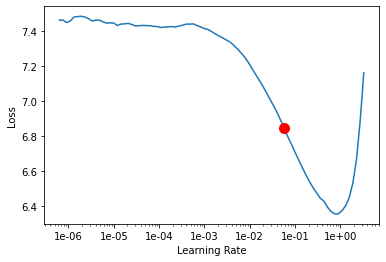

In [ ]:
learn.lr_find()
learn.recorder.plot(suggestion=True)
min_grad_lr = learn.recorder.min_grad_lr

The above plot shows the learning rate vs loss. 

In [ ]:
min_grad_lr

0.05754399373371566

In [ ]:
learn.fit_one_cycle(2, 1e-02)

epoch,train_loss,valid_loss,accuracy,time
0,5.883411,4.332268,0.278962,07:06
1,4.726963,3.920578,0.337377,06:55


We can now unfreeze all the layers and find the optimal learning rate

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 6.31E-07
Min loss divided by 10: 1.91E-03


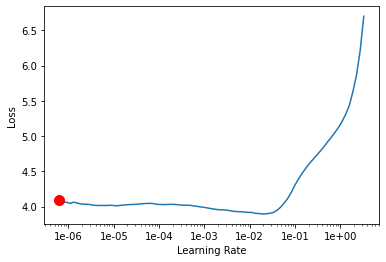

In [ ]:
learn.unfreeze()
learn.lr_find()
learn.recorder.plot(suggestion=True)
min_grad_lr = learn.recorder.min_grad_lr

In [ ]:
learn.fit_one_cycle(2, 1e-3)

epoch,train_loss,valid_loss,accuracy,time
0,3.768101,3.466571,0.397835,10:11
1,3.434204,3.348996,0.418091,10:10


## Encoder for Classification

For classificatoin use case we just need the Encoder part. Hence we are just saving the encoder alone

In [ ]:
learn.save_encoder('ft_enc')

## Classification Model

In [ ]:
learn = text_classifier_learner(data_clas, AWD_LSTM, drop_mult=0.3, metrics=[accuracy,Precision(average='weighted'),Recall(average='weighted')])
learn.load_encoder('ft_enc')

RNNLearner(data=TextClasDataBunch;

Train: LabelList (5915 items)
x: TextList
xxbos to can not be generated received from gjtyswkbdpvaymxrgmailcom dear it the to can not be generated for below dn would you pls help to check,xxbos password resetpassword reset,xxbos job xxmaj job failed in jobscheduler at received from monitoringtoolcompanycom job xxmaj job failed in jobscheduler at,xxbos windows account lockoutwindows account lockout,xxbos printer driver updateprinter driver update
y: CategoryList
10,0,48,0,0
Path: /content/drive/MyDrive/AIML/Projects/Capstone;

Valid: LabelList (2535 items)
x: TextList
xxbos xxmaj urgent xxmaj xxunk xxmaj delivery xxmaj letter xxmaj sales xxmaj order xxmaj xxunk xxunk from xxunk hello it please urgently for help because the xxunk is already available here for picking up the onsite tools and urgently need to create a delivery xxunk make a sound thank xxunk xxunk xxmaj best,xxbos unlock account email in cell phone the user xxunk xxunk xxunk team could yo

## Hyper Parameter Tuning (Learning Rate)

epoch,train_loss,valid_loss,accuracy,precision,recall,time


/usr/local/lib/python3.7/dist-packages/fastai/text/data.py:124: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  sort_idx = np.concatenate(np.random.permutation(ck_idx[1:])) if len(ck_idx) > 1 else np.array([],dtype=np.int)
<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 3.98E-02
Min loss divided by 10: 3.02E-02


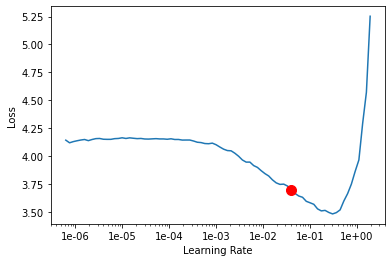

In [ ]:
learn.lr_find()
learn.recorder.plot(suggestion=True)
min_grad_lr = learn.recorder.min_grad_lr

In [ ]:
learn.fit_one_cycle(6, 1e-03)

epoch,train_loss,valid_loss,accuracy,precision,recall,time
0,3.271720,2.359348,0.525049,nan,0.525049,07:05
1,2.408945,1.927877,0.588166,nan,0.588166,06:47
2,1.927981,1.632386,0.614201,nan,0.614201,08:28
3,1.781229,1.559178,0.611045,nan,0.611045,08:01
4,1.615388,1.527994,0.619329,nan,0.619329,07:55
5,1.561696,1.532501,0.617751,nan,0.617751,07:43


/usr/local/lib/python3.7/dist-packages/fastai/text/data.py:124: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  sort_idx = np.concatenate(np.random.permutation(ck_idx[1:])) if len(ck_idx) > 1 else np.array([],dtype=np.int)
<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
/usr/local/lib/python3.7/dist-packages/fastai/text/data.py:124: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must

In [ ]:
learn.freeze_to(-2)
learn.fit_one_cycle(6, slice(1e-4/(2.6**4), 1e-4))

epoch,train_loss,valid_loss,accuracy,precision,recall,time
0,1.564545,1.517890,0.621696,nan,0.621696,09:27
1,1.599285,1.507940,0.621302,nan,0.621302,09:33
2,1.500718,1.507581,0.618146,nan,0.618146,08:43
3,1.503079,1.499736,0.622880,nan,0.622880,08:52
4,1.478281,1.500505,0.620907,nan,0.620907,08:18
5,1.467328,1.489945,0.618540,nan,0.618540,09:05


/usr/local/lib/python3.7/dist-packages/fastai/text/data.py:124: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  sort_idx = np.concatenate(np.random.permutation(ck_idx[1:])) if len(ck_idx) > 1 else np.array([],dtype=np.int)
<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
/usr/local/lib/python3.7/dist-packages/fastai/text/data.py:124: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must

In [ ]:
learn.export('/content/drive/MyDrive/AIML/Projects/Capstone/final_model.pkl')

## Train the Classification model with TOP 10 Classes

Since we have way too many classes, we could try the model performance with lesser number of classes.

Here we try to get the top 10 classes based on the row counts.

We will repeat the exact steps we tried in the first approach.

In [ ]:
df.head()

,Assignment group,Description
0,GRP_0,login issue-verified user details.(employee# &...
1,GRP_0,outlook received from: hmjdrvpb.komuaywn@gm...
2,GRP_0,cant log in to vpn received from: eylqgodm....
3,GRP_0,unable to access hr_tool pageunable to access ...
4,GRP_0,skype errorskype error


In [ ]:
df['Assignment group'].value_counts()

GRP_0        3976
GRP_8         661
GRP_24        289
GRP_12        257
GRP_9         252
GRP_2         241
GRP_19        215
GRP_3         200
GRP_6         184
GRP_13        145
GRP_10        140
GRP_5         129
GRP_14        118
GRP_25        116
GRP_33        107
GRP_4         100
GRP_29         97
GRP_18         88
GRP_Other      87
GRP_16         85
GRP_17         81
GRP_7          68
GRP_31         66
GRP_34         62
GRP_26         56
GRP_40         45
GRP_28         44
GRP_41         40
GRP_15         39
GRP_42         37
GRP_20         36
GRP_45         35
GRP_1          31
GRP_22         31
GRP_11         30
GRP_21         29
GRP_47         27
GRP_23         25
GRP_62         25
GRP_30         25
GRP_60         20
GRP_39         19
GRP_27         18
GRP_37         16
GRP_44         15
GRP_36         15
GRP_50         14
GRP_53         11
GRP_65         11
GRP_48          9
Name: Assignment group, dtype: int64

In [ ]:
need = df['Assignment group'].value_counts().index[:10]
df['Assignment group'] = np.where(df['Assignment group'].isin(need), df['Assignment group'], 'Misc')

## Top 10 classes based on Row Count

In [ ]:
df['Assignment group'].value_counts()

GRP_0     3976
Misc      2047
GRP_8      661
GRP_24     289
GRP_12     257
GRP_9      252
GRP_2      241
GRP_19     215
GRP_3      200
GRP_6      184
GRP_13     145
Name: Assignment group, dtype: int64

In [ ]:
df.head()

,Assignment group,Description
0,GRP_0,login issue-verified user details.(employee# &...
1,GRP_0,outlook received from: hmjdrvpb.komuaywn@gm...
2,GRP_0,cant log in to vpn received from: eylqgodm....
3,GRP_0,unable to access hr_tool pageunable to access ...
4,GRP_0,skype errorskype error


In [ ]:
df.dropna(inplace=True)

In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [ ]:
df['label'] = le.fit_transform(df['Assignment group'])

In [ ]:
df.drop('Assignment group', axis=1, inplace=True)

In [ ]:
df.head()

,Description,label
0,login issue-verified user details.(employee# &...,0
1,outlook received from: hmjdrvpb.komuaywn@gm...,0
2,cant log in to vpn received from: eylqgodm....,0
3,unable to access hr_tool pageunable to access ...,0
4,skype errorskype error,0


In [ ]:
import re
df['Description'] = df['Description'].apply(lambda x: re.sub('[^A-Za-z ]+', '',x))

In [ ]:
df = df.replace(r'\n',' ', regex=True). replace(r'_x000D_',' ', regex=True)

In [ ]:
from sklearn.model_selection import train_test_split
df_trn, df_val = train_test_split(df, stratify = df['label'], test_size = 0.2)
df_trn.shape, df_val.shape

((5915, 2), (2535, 2))

In [ ]:
from fastai.text import *
pd.set_option('display.max_colwidth', -1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  


In [ ]:
# Language model data
data_lm = TextLMDataBunch.from_df(train_df = df_trn, valid_df = df_val, path = "/content/drive/MyDrive/AIML/Projects/Capstone/", text_cols='Description', label_cols='label')
# Classifier model data
data_clas = TextClasDataBunch.from_df(train_df = df_trn, valid_df = df_val, path = "/content/drive/MyDrive/AIML/Projects/Capstone/", text_cols='Description', label_cols='label', vocab=data_lm.train_ds.vocab, bs=32)

/usr/local/lib/python3.7/dist-packages/fastai/core.py:302: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(a, dtype=dtype, **kwargs)


/usr/local/lib/python3.7/dist-packages/fastai/text/data.py:124: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  sort_idx = np.concatenate(np.random.permutation(ck_idx[1:])) if len(ck_idx) > 1 else np.array([],dtype=np.int)
<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


In [ ]:
data_clas.show_batch()

/usr/local/lib/python3.7/dist-packages/fastai/text/data.py:124: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  sort_idx = np.concatenate(np.random.permutation(ck_idx[1:])) if len(ck_idx) > 1 else np.array([],dtype=np.int)
<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


text,target
xxbos security incidents in possible malware infection traffic from sinkhole domain to androidfasource ip system name androidfaecee user xxunk location unknown sep sms status field sales user yes no dsw event log incident overview we are seeing your isensorcompanycom device generating vid server response with anubis sinkhole cookie set probable infected asset alerts for traffic not blocked from port tcp of to port tcp of your androidfaecee device indicating that,4
xxbos security incidents sw in magento sql xxunk ip system name xxunk xxunk user name na location xxunk sep sms status field sales user yes no dsw event log see below the ctoc has received at least occurrences of vid possible magento mageadminhtmlblockwidgetgridgetcsvfile sql injection attempt inbound cve alerts from your isensor device isensplantcompanycom for traffic not blocked sourcing from port tcp of dallas usa destined to port tcp of,4
xxbos symantec endpoint encryption see agent roll out europe region only sales pcs received from yqlvfkihfolbpugdgmailcom dear folks i would like to thank all the site administrators xxunk took part in this see agent xxunk uacyltoe hxgayczeing and helped us through giving the honest xxunk on the installation behavior time to time this overall helped us to complete the xxunk uacyltoe hxgayczeing and xxunk this package to the production rollout,0
xxbos it help received from notwkdgrzvmesjptgmailcom do you have any idea why i received this message xxunk xxunk consultant xxunk from microsoft outlook sent sunday september pm to notwkdgr zvmesjpt subject undeliverable fw company ec mfgtooltion in us image removed by sender your message to dhermosigmailcom could nt be delivered gmailcom could nt confirm that your message was sent from a trusted location xxunk office xxunk action required recipient spf,10
xxbos as per incsecurity incidents in suspicious msrpcmsdsnetbios activity hostnamenew from gzhapcld fdigznbk sent wednesday august am to xxunk xxunk xxunk xxunk thoyhts brthyrtiv tiyhum kuyiomar cc gdhyrts muggftyali qfrntose ivnhumzjalakrisyuhnyrtn nyrjkctu tbhkenlo ugyothfz ugrmkdhx kathght shfhyw suhtnhdyio psfshytd bhayhtrathramdnty mamilujli subject incsecurity incidents in suspicious msrpcmsdsnetbios activity hostnamenew hello amerirtcas pc support we have detected at least occurrences of your firewall attsingaporeasacompanycom dropping traffic sourcing from hostnamenew and destined,4


In [ ]:
learn = language_model_learner(data_lm, AWD_LSTM, drop_mult=0.3)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 4.79E-02
Min loss divided by 10: 1.10E-01


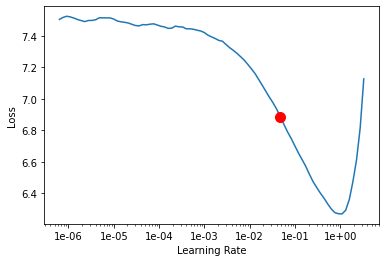

In [ ]:
learn.lr_find()
learn.recorder.plot(suggestion=True)
min_grad_lr = learn.recorder.min_grad_lr

In [ ]:
learn.fit_one_cycle(2, 2e-02)

epoch,train_loss,valid_loss,accuracy,time
0,5.480279,3.943371,0.324330,00:16
1,4.233203,3.670431,0.361473,00:16


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 1.74E-03
Min loss divided by 10: 1.32E-03


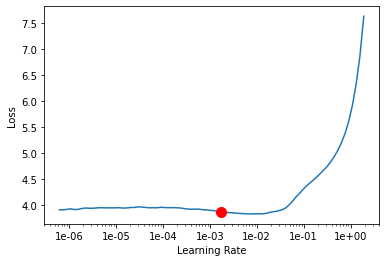

In [ ]:
learn.unfreeze()
learn.lr_find()
learn.recorder.plot(suggestion=True)
min_grad_lr = learn.recorder.min_grad_lr

In [ ]:
learn.fit_one_cycle(2, 2e-02)

epoch,train_loss,valid_loss,accuracy,time
0,3.682573,3.525747,0.383917,00:20
1,3.344060,3.424115,0.397656,00:20


In [ ]:
learn.save_encoder('ft_enc')

In [ ]:
learn = text_classifier_learner(data_clas, AWD_LSTM, drop_mult=0.3, metrics=[accuracy,Precision(average='weighted'),Recall(average='weighted')])
learn.load_encoder('ft_enc')

RNNLearner(data=TextClasDataBunch;

Train: LabelList (5915 items)
x: TextList
xxbos businessclient issue received from eqtofwbmmojfbwdsgmailcom hi it support one of our users have problem with running of businessclient client he is still getting error message that net framdntyework is not installed on your pc i tried to reinstall it but no success is it known issue please can you help us how to solve it,xxbos ticket upadate on inplantticket upadate on inplant,xxbos hostname status c is now utilizedhostname status c labelsyshostname ab is now utilized,xxbos printer issue xxunk language browsermicrosoft internet explorer emailmfeyoulindobtzpwgmailcom customer number telephone xxunk to connect a printer,xxbos i am still unable to salesperson and uacyltoe hxgaycze performed by in engineeringtoolcould you help xxunk language browsermicrosoft internet explorer xxunk customer number telephone summaryhello i am still unable to salesperson and uacyltoe hxgaycze performed by in engineeringtoolco

epoch,train_loss,valid_loss,accuracy,precision,recall,time


/usr/local/lib/python3.7/dist-packages/fastai/text/data.py:124: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  sort_idx = np.concatenate(np.random.permutation(ck_idx[1:])) if len(ck_idx) > 1 else np.array([],dtype=np.int)
<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 6.92E-02
Min loss divided by 10: 3.63E-02


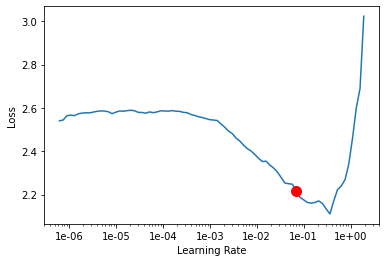

In [ ]:
learn.lr_find()
learn.recorder.plot(suggestion=True)
min_grad_lr = learn.recorder.min_grad_lr

In [ ]:
learn.fit_one_cycle(6, 2e-03)

epoch,train_loss,valid_loss,accuracy,precision,recall,time
0,1.893735,1.440078,0.626036,nan,0.626036,00:22
1,1.393126,1.108558,0.646548,nan,0.646548,00:21
2,1.208332,0.984645,0.656805,nan,0.656805,00:23
3,1.103282,0.947799,0.656016,nan,0.656016,00:25
4,1.031301,0.949001,0.661144,nan,0.661144,00:22
5,1.008917,0.943667,0.656410,nan,0.656410,00:22


/usr/local/lib/python3.7/dist-packages/fastai/text/data.py:124: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  sort_idx = np.concatenate(np.random.permutation(ck_idx[1:])) if len(ck_idx) > 1 else np.array([],dtype=np.int)
<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
/usr/local/lib/python3.7/dist-packages/fastai/text/data.py:124: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must

In [ ]:
learn.freeze_to(-1)
learn.fit_one_cycle(10, 2e-03)

epoch,train_loss,valid_loss,accuracy,precision,recall,time
0,0.984936,0.928119,0.665483,0.643592,0.665483,00:24
1,0.990064,0.922979,0.667061,0.624627,0.667061,00:24
2,1.055173,0.931912,0.659566,nan,0.659566,00:22
3,1.020249,0.919247,0.669823,0.647050,0.669822,00:24
4,0.955015,0.978035,0.639053,nan,0.639053,00:23
5,0.955559,0.923125,0.657594,nan,0.657594,00:23
6,0.930776,0.919426,0.661144,nan,0.661144,00:22
7,0.902628,0.910739,0.665483,nan,0.665483,00:24
8,0.865360,0.906683,0.666272,nan,0.666272,00:23
9,0.833697,0.901938,0.667850,nan,0.667850,00:20


/usr/local/lib/python3.7/dist-packages/fastai/text/data.py:124: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  sort_idx = np.concatenate(np.random.permutation(ck_idx[1:])) if len(ck_idx) > 1 else np.array([],dtype=np.int)
<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
/usr/local/lib/python3.7/dist-packages/fastai/text/data.py:124: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must

In [ ]:
learn.freeze_to(-2)
learn.fit_one_cycle(15, slice(1e-5,1e-2))

epoch,train_loss,valid_loss,accuracy,precision,recall,time
0,0.881145,0.911822,0.683629,nan,0.683629,00:26
1,0.981766,0.991171,0.643393,nan,0.643392,00:24
2,1.026934,1.038011,0.654043,nan,0.654043,00:25
3,0.977483,0.979054,0.660355,nan,0.660355,00:25
4,0.973743,0.980711,0.643787,nan,0.643787,00:27
5,0.927406,0.990534,0.660355,nan,0.660355,00:29
6,0.874521,1.011313,0.649704,0.653983,0.649704,00:27
7,0.763251,1.061728,0.667850,0.640649,0.667850,00:26
8,0.685445,1.071800,0.661933,0.640738,0.661933,00:26
9,0.587233,1.088318,0.674951,0.667585,0.674951,00:24


/usr/local/lib/python3.7/dist-packages/fastai/text/data.py:124: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  sort_idx = np.concatenate(np.random.permutation(ck_idx[1:])) if len(ck_idx) > 1 else np.array([],dtype=np.int)
<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
/usr/local/lib/python3.7/dist-packages/fastai/text/data.py:124: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must

## Observation

With Reduced number of classes (top 10), we see the performance improved from 61% to 68%

In [ ]:
learn.export('/content/drive/MyDrive/AIML/Projects/Capstone/final_model_v1.pkl')

## Predict Classes

In [ ]:
learn = load_learner('/content/drive/MyDrive/AIML/Projects/Capstone/', 'final_model_v1.pkl')

In [ ]:
learn.predict('Unable to Login')

(Category tensor(0),
 tensor(0),
 tensor([7.2793e-01, 1.5092e-02, 5.3060e-03, 1.2516e-03, 5.3208e-04, 3.6225e-02,
         3.3271e-04, 1.1963e-03, 9.8860e-04, 2.1579e-03, 2.0899e-01]))

As seen from the above result, the input Ticket have been classified to GRP - 0

In [ ]:
learn.predict('wifi not working in pennsylvania (wireless issue at waynesboro)wifi working pennsylvania access point working . work stoppage issue. tried calling christgry twice ..reached warehouse_tool mail. left brief message. dialed again. able reach christgry')

(Category tensor(10),
 tensor(10),
 tensor([1.0092e-02, 1.3807e-04, 4.5650e-05, 4.5614e-01, 1.9921e-04, 1.1472e-04,
         3.4917e-03, 5.1060e-04, 4.5077e-03, 5.7244e-04, 5.2419e-01]))

# <a name="Part5">5. Model Evaluation</a>

Since it is a multi-class classifier problem, Weighted F1 Score was used to select the best model. 

Evaluation Metrics is based on Classification Metrics.
1.	Precision: - What percent of Model predictions were correct - Accuracy of positive predictions. Precision = TP/ (TP + FP) 
2.	Recall: - What percent of the positive cases did Model predict; TP/(TP+FN) 
3.	f1-score gives you the harmonic mean of precision and recall. (2* Precision * Recall) / (Precision + Recall)
4.	Accuracy - Number of correct predictions to total number of predictions; TP+TN/ (TP +TN+ FP+FN)
5.	Support Support is the number of actual occurrences of the class in the specified dataset
●	True Positive (TP) — A true positive is an outcome where the model correctly predicts the positive class.
●	True Negative (TN) — A true negative is an outcome where the model correctly predicts the negative class.
●	False Positive (FP) — A false positive is an outcome where the model incorrectly predicts the positive class.
●	False Negative (FN) — A false negative is an outcome where the model incorrectly predicts the negative class

One drawback is that both precision and recall are given equal importance due to which according to our application we may need one higher than the other and F1 score may not be the exact metric for it. Therefore, either weighted-F1 score or PR or ROC curve can be used.

In weighted-average F1-score, or weighted-F1, we weight the F1-score of each class by the number of samples from that class

Similarly, we can compute weighted precision and weighted recall:
 

In [17]:
df_final_results = pd.read_excel('/content/drive/MyDrive/AIML/Projects/Capstone/Capstone NLP - Automatic Ticket Assignment Results(2).xlsx')
pd.set_option('display.max_colwidth', None)

In [18]:
df_final_results

,Model Name,Accuracy Weighted average,Precision Weighted average,Recall Weighted average,F1-Score Weighted average,Trials
0,SVM,0.62,0.69,0.62,0.57,Classification based on Description - Prior to Data Cleansing
1,SVM,0.67,0.68,0.67,0.61,Classification based on Description - Post Data Cleansing
2,SVM,0.68,0.66,0.62,0.62,Classification based on Short description
3,SVM,0.70,0.70,0.70,0.64,"Classification based on both Short description and Description [ Feature Engineering, created new field by combining these 2 features]"
4,SVM,0.68,0.67,0.68,0.65,"Embedding - TF-IDF Vectorizer\nHyper Parameter Tuning - Best Model {'clf_svm__estimator__C': 1000, 'clf_svm__estimator__gamma': 0.001, 'clf_svm__estimator__kernel': 'rbf', 'vectorizer__lowercase': True, 'vectorizer__ngram_range': (1, 1), 'vectorizer__strip_accents': 'unicode'}"
5,Logistic Regression,0.52,0.78,0.53,0.56,Classification based on Description - Post Data Cleansing
6,Logistic Regression,0.52,0.83,0.53,0.56,Classificatoin based on Short desc
7,Logistic Regression,0.55,0.82,0.57,0.60,Classification based on both Short description and Description
8,Logistic Regression,0.55,0.81,0.56,0.60,Classification based on both Short description and Description and caller
9,Logistic Regression,0.67,0.65,0.67,0.63,"Embedding : BOW Vectorizer\nHYPER PARAMETER Tuning - Best Model {'clf_LR__estimator__C': 10,\n 'clf_LR__estimator__max_iter': 250,\n 'clf_LR__estimator__penalty': 'l2',\n 'clf_LR__estimator__solver': 'liblinear',\n 'vectorizer__lowercase': True,\n 'vectorizer__ngram_range': (1, 1),\n 'vectorizer__strip_accents': 'unicode'}"


SVM Classifier after hyper parameter tuning turned out to be the best model. 

# <a name="Part5">6. Bench Mark Comparison</a>

We bench marked SVM model with Weighted F1 Score of 0.64.

Tried with hyper parameter tuning, Deep learning models, Transfer learning using ULMFit, table above shows score for these trials.
Hyper parameter and ULMFit models had marginal improvements in the weighted F1 Scores, but deep learning model & LSTM didn’t had improvement due to following reasons


    ●	Dataset volume
    ●	Class imbalance 
    ●	Too many classes 


# <a name="Part7">7. UI App Model deployment</a>

Followed below high-level steps for deploying best performing SVM model in Streamlit Cloud 

    Step 1: Create a new virtual environment using IDE like Spyder, Pycharm
    Step 2: Install necessary libraries.
    Step 3: Build the best machine learning model and save it. – In our project SVM classifier performed well and model is saved using pickle package 
    Step 4: Test the loaded model.
    Step 5: Create an App using Web application frameworks like Streamlit, Flask, Django.  We have chosen Streamlit for our model deployment
    Step 6: Create Main.py file which does following
        ●	Loads serialized pickle model (best model: SVM).
        ●	Create GUI which receives inputs from user
        ●	Performs Pre-processing and uses the trained model to make predictions and predicted results are displayed to the user.
    Step 7: Upload local project to GitHub
    Step 8: Create a New App in Streamlit, by providing GitHub URL 


App is hosted on Streamlit Cloud and can be accessed using below URL

https://share.streamlit.io/sureshap/nlp1aimlg4/main/WebApp/Main.py


GitHub URL for source code: 

https://github.com/sureshap/nlp1aimlg4/tree/main/WebApp


# <a name="Part8">8. Implications</a>

Using NLP based AIML we could build a classifier that can automatically classify tickets (ITSM) to right functional groups with an accuracy of 68%.

This model when placed in production using batch job or RPA BOT, in turn can automate classification process, done currently by L1/L2 team and in turn help organizations to reduce the resolving time of the issue and can focus on more productive tasks.


# <a name="Part9">9. Limitations</a>

1.	Translation works currently for Latin script languages, non-Latin scripts like Chinese, Japanese don't work. Need a translator that can handle non-Latin scripts. 
2.	For data imbalance, we can try data augmentation techniques like paraphrasing using Paraphrasing Tool like QuillBot and create sample data for lesser data in classes
3.	Grouping of appropriate assignment groups based on the domain knowledge would help to clean the Target variable and create multiple groups first at L1/L2 and L3 split and then subdivide into individual assignment group within the respective team
4.	Our model is trained on very limited dataset, build a mechanism to train the model on the future data on a periodic basis using MLOPs 
5.	Instead of using generic Glove embedding, could have used pre-trained word embeddings specific to ITSM tickets
6.	Implementation of model – currently deployed in Streamlit which can pick one ticket at a time to predict the assignment group. In real time, it could be batch job or RPA bot which can run at a predefined time which pick the tickets assigned to AIML queue and AIML model program runs to predict the ticket assignment to respective assignment group


# <a name="Part10">10. Closing Reflections</a>

1.	Class Imbalance

    50% of data falls into GRP_0 out of available 74 groups, there were many Classes with only 1 row indicating class imbalance in the dataset.
    
    For data imbalance, we can try data augmentation techniques like paraphrasing using Paraphrasing Tool like QuillBot and create sample data for lesser data in classes

2.	Feature parsing:

    Looked out for Accent characters; carriage return and new line characters as a part of data pre-processing.

    Data quality in the description field for some tickets were vague, more detailed description for tickets will help. 

    To avoid missing data, make description field mandatory on the source system

3.	Translation of multilingual characters

    We found translation is important step in the pre-processing as this could improve the model performance

    Tried multiple language translators to choose the most optimal translator

4.	Model Performance tracker 

    Tried to traditional machine learning approaches such as SVM, Naive Bayes, Random Forest.

    Tried the Deep Learning options including LSTM

    Tried the Transfer learning approach using ULMFit

    Model performance was tracked in excel sheet

    We can look at using MLOPs tool like MLflow, Wandb

5.	Model Performance confidence  

    Currently evaluation metrics were used to show confidence of how model works

    Explain NLP Models by using feature engineering tools like LIME & SHAP to help users understand and interact meaningfully with machine learning


# <a name="Part11">11. References</a>

ULMFIT

1.	https://www.fast.ai/

2.	https://medium.com/technonerds/using-fastais-ulmfit-to-make-a-state-of-the-art-multi-label-text-classifier-bf54e2943e83#:~:text=Overview,of%20the%20WikiText%20103%20corpus.

3.	https://www.kaggle.com/neoyipeng2018/tweet-classification-using-awd-lstm

Language Translators

4.	https://pypi.org/project/googletrans/

Removing Accented Characters

5.	https://stackoverflow.com/questions/517923/what-is-the-best-way-to-remove-accents-normalize-in-a-python-unicode-string

Streamlit Application

6.	https://docs.streamlit.io/library/get-started/create-an-app
7.	https://towardsdatascience.com/building-web-applications-with-streamlit-for-nlp-projects-cdc1cf0b38db


EDA for NLP

8.	https://towardsdatascience.com/nlp-text-data-visualization-5d5c64c86019
9.	https://neptune.ai/blog/exploratory-data-analysis-natural-language-processing-tools

t-SNE

10.	https://www.scikit-yb.org/en/latest/api/text/tsne.html
11.	https://methodmatters.github.io/using-word2vec-to-analyze-word/

WordCloud

12.	https://www.analyticsvidhya.com/blog/2020/10/word-cloud-or-tag-cloud-in-python/


Data Augmentation

13.	https://www.kdnuggets.com/2019/04/text-preprocessing-nlp-machine-learning.html#:~:text=Text%20normalization%20is%20the%20process,%E2%80%9D%20to%20just%20%E2%80%9Cstopwords%E2%80%9D.
14.	https://quillbot.com/?utm_source=Google&utm_medium=Search&utm_campaign=Paraphrase_Developing&gclid=Cj0KCQjw0PWRBhDKARIsAPKHFGiuwp4OB_45GmP7MJyufagl6MU58on6zPuvsAcFNOaf1YEY9sTkpAcaAgUaEALw_wcB

Model working demonstration

15.	https://towardsdatascience.com/explain-nlp-models-with-lime-shap-5c5a9f84d59b

Hyper Parameter Tuning

16.	https://analyticsindiamag.com/guide-to-hyperparameters-tuning-using-gridsearchcv-and-randomizedsearchcv/

Modelling Pipeline

17.	https://machinelearningmastery.com/modeling-pipeline-optimization-with-scikit-learn/
